#### Bank Loan Case Study EDA

#### Introduction:

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
ugh.folio and risk assessment.



#### Business Understanding:

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

#### Business Objective:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

#### Importing important libraries

In [6]:
#to ignore the clustering of error mesages!
import warnings
warnings.filterwarnings("ignore")

In [7]:
#importing libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
import itertools
%matplotlib inline

In [8]:
#To show full outputs 
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full width of columns

#### Reading the application_data.csv dataset

In [10]:
#read the data set of application_data.csv
app_inp0df = pd.read_csv("application_data(EDA ASSIGNMENT).csv")
app_inp0df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Reading the previous_application.csv dataset

In [12]:
#read the data set of previous_application.csv
prev_app_inp1df = pd.read_csv("previous_application(EDA ASSIGNMENT).csv")
prev_app_inp1df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [13]:
app_inp0df.shape

(307511, 122)

#### Insights:
- This raw dataset application_data has 307511 rows and 122 columns

In [15]:
#Information of all the columns like data types
app_inp0df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [16]:
#numeric variables of the dataframes
app_inp0df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### Insights:
- Some columns having negative, postive values which includes days. It needs to be fixed.

- Some columns with very hight values, columns related to Amount.


- Standardising is needed.

#### Data Cleaning & Manipulation


In [19]:
round(app_inp0df.isnull().sum() / app_inp0df.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### Making a function to find all Null-values for the data sets

In [21]:
def null_values(app_inp0df):
    return app_inp0df.apply(lambda x: 100 * x.isnull().mean()).sort_values(ascending=False)

In [22]:
#Checking the missing value columns in percentage
null_columns = null_values(app_inp0df)
null_columns

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [23]:
app_inp0df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

#### Inights:
- There are lots of column that have missing values more than 40%.

Creating a new variable called missing_val_columns for storing columns having missing values more than 40% threshold

In [26]:
missing_val_columns_40 = null_columns[null_columns > 40]
missing_val_columns_40

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Analysing the columns to check if we need to remove columns that have more than 40% missing values

#### Analysing & Deleting Unnecessary Columns in app_inp0df

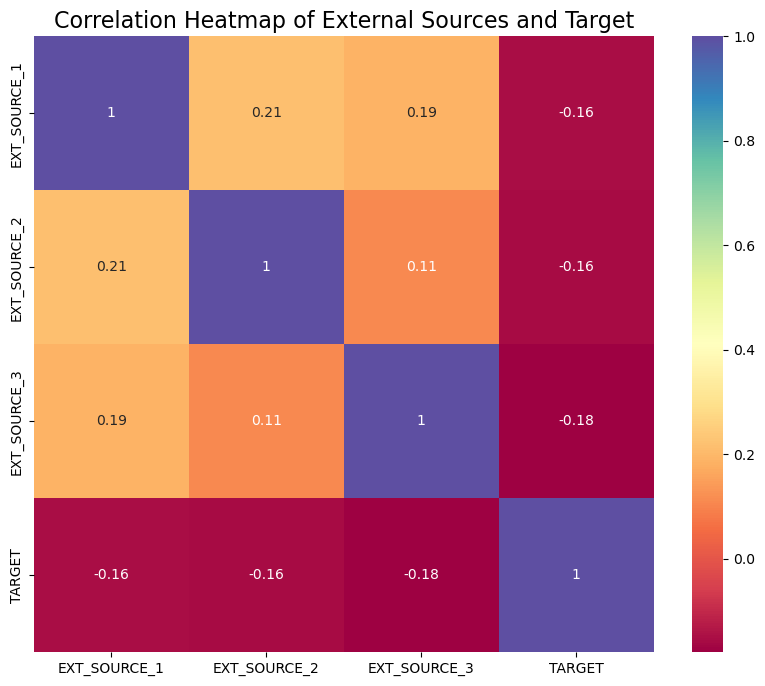

In [29]:
Source = app_inp0df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(source_corr,
                 xticklabels=source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot=True,
                 cmap="Spectral")
ax.set_title('Correlation Heatmap of External Sources and Target', fontsize=16)

plt.show()

#### Insights:
- The heatmap shows that there is almost no correlation between EXT_SOURCE columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

I will drop all these columns with missing values over 40% Threshold

In [32]:
#the columns we are dropping are:
missing_val_columns_40.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [33]:
#to check the numbers of columns with missing values over 40% threshold
len(missing_val_columns_40)


49

#### Insights:
- There is quite a bit of columns with missing value over 40% threshold, there is 49 missing value columns that are related to different area sizes on apartment owned/rented by the loan applicants.

In [35]:
#Dropping the columns that have missing values more than 40%:
app_inp0df.drop(columns=missing_val_columns_40.index, inplace = True)

In [36]:
app_inp0df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [37]:
#Now, checking how many columns are left to analys more:

app_inp0df.shape

(307511, 73)

#### Insights:
- After dropping the columns with over 40% missing values, there are 73 columns left for analysis

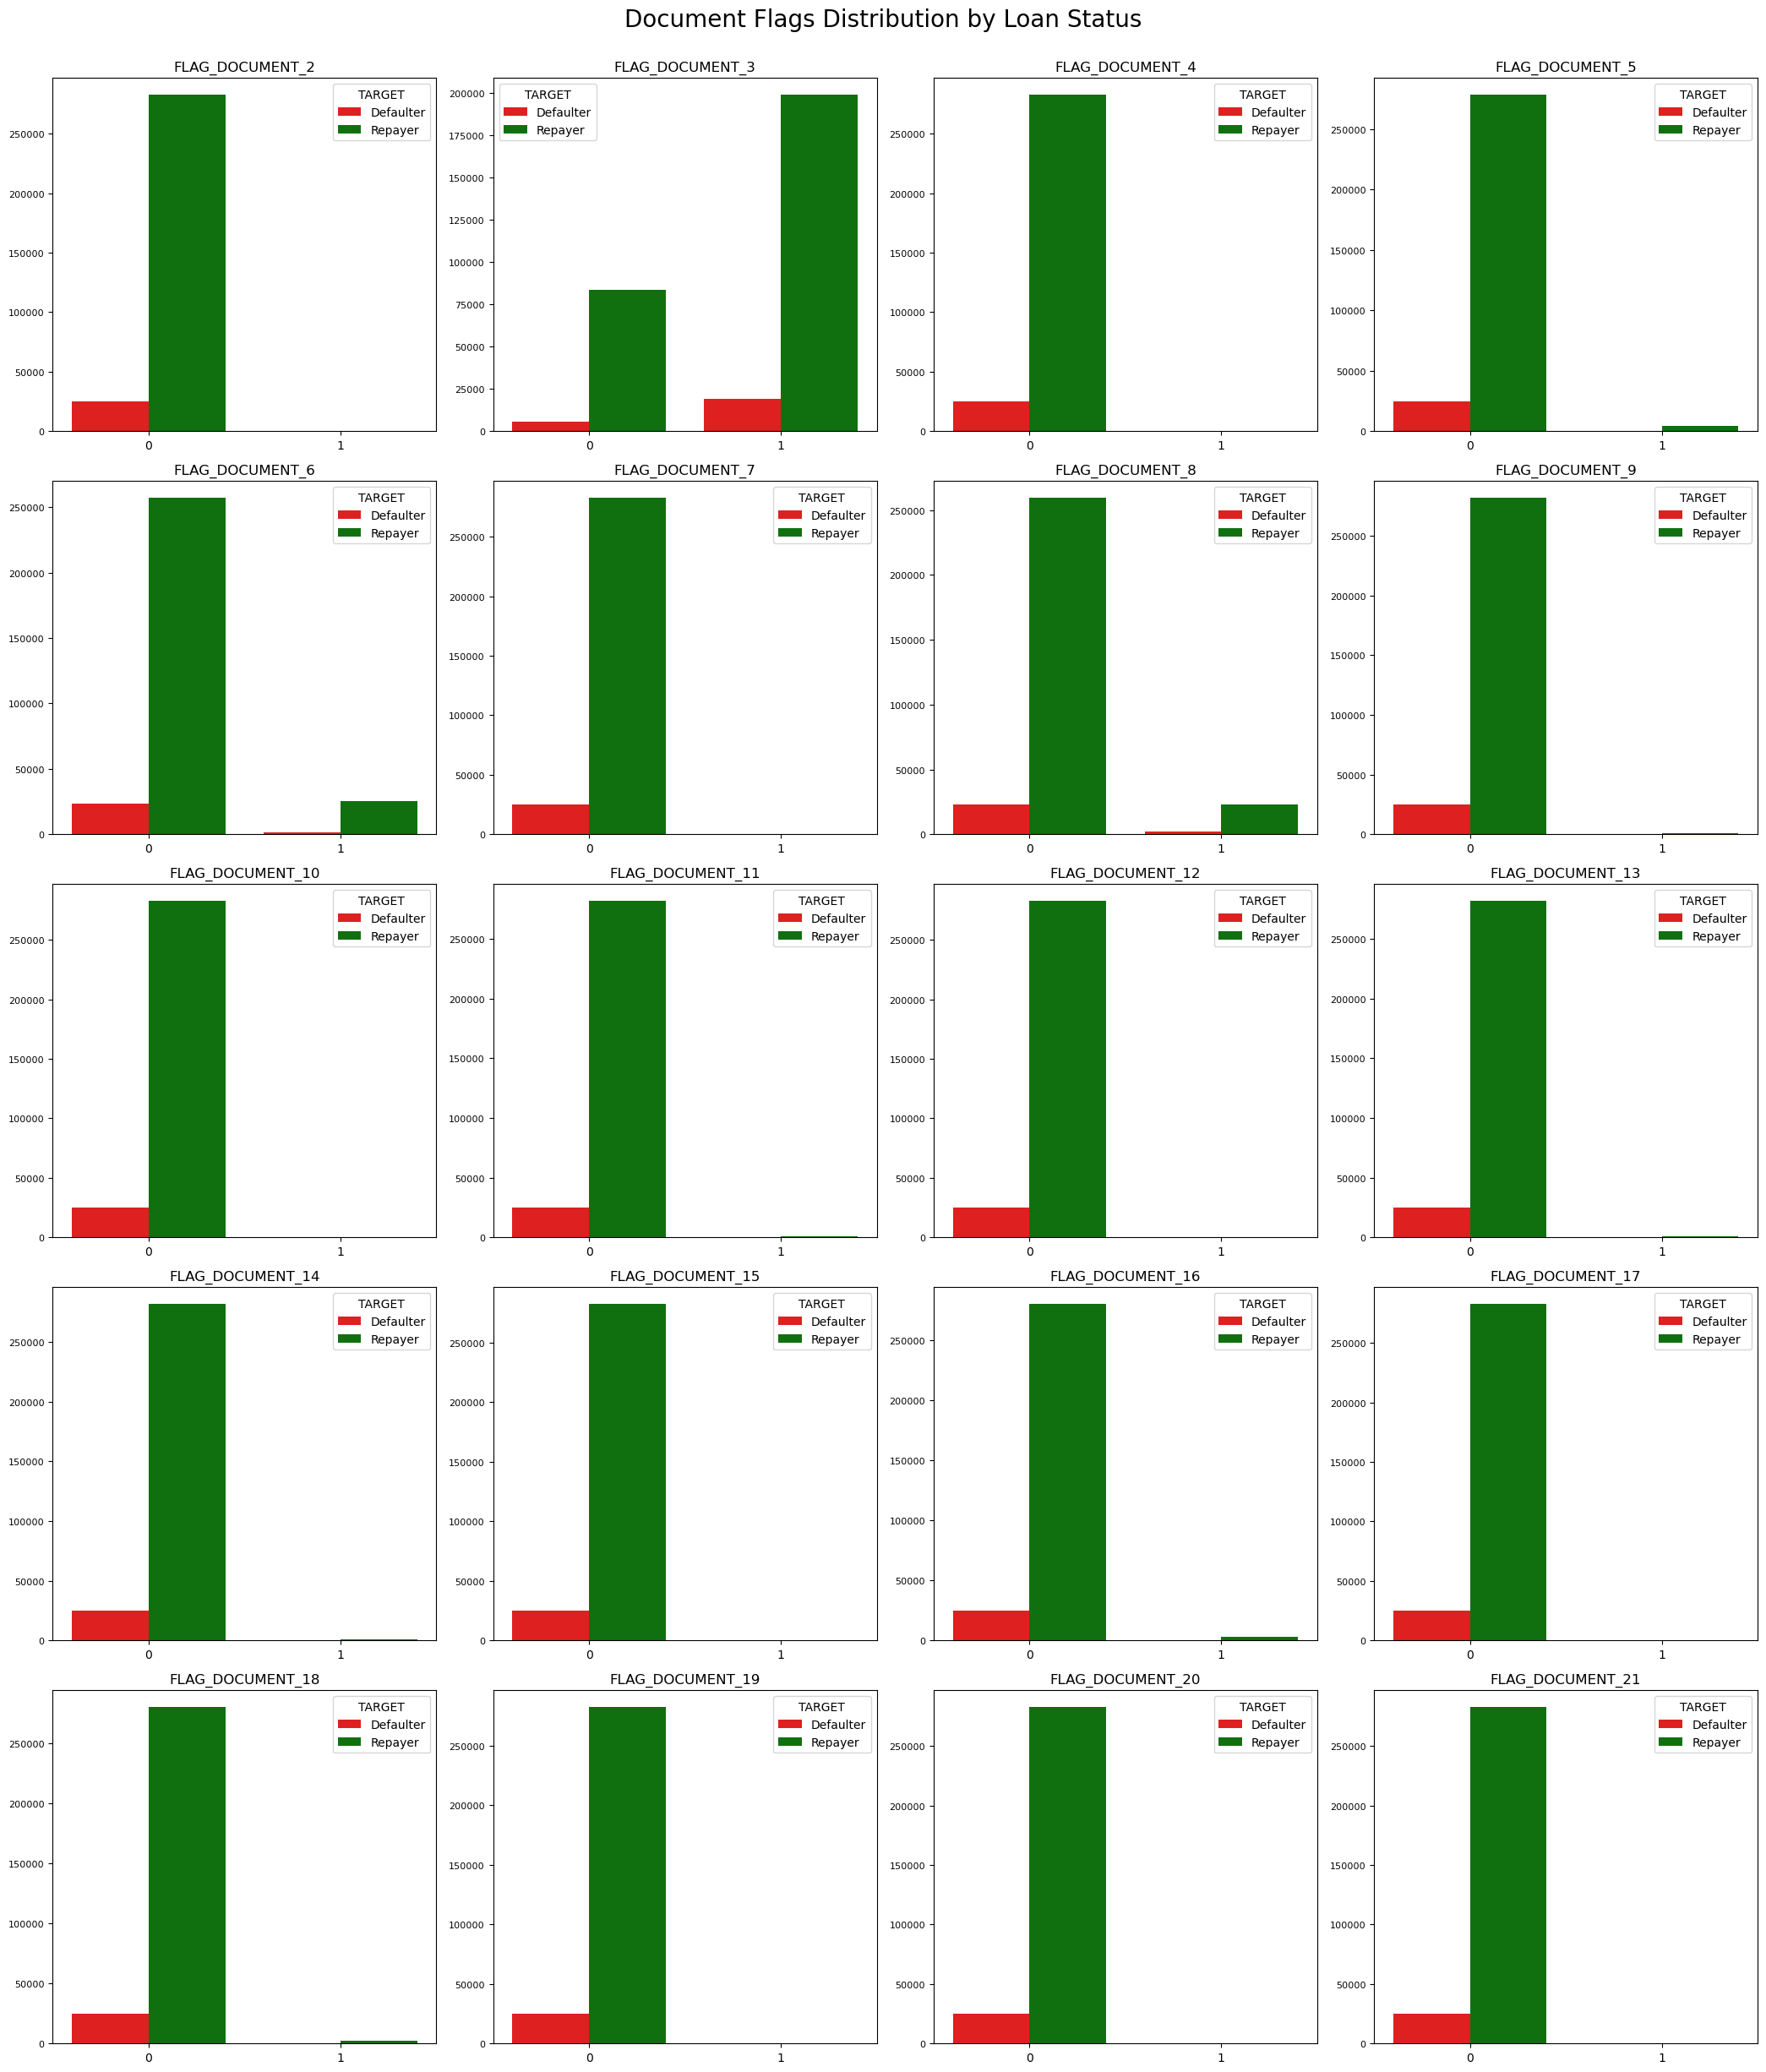

In [39]:
#here looking at documents needed for loan application:
#storing them in a new varibale called col_doc


col_Doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = app_inp0df[col_Doc + ["TARGET"]].copy()

df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

length = len(col_Doc)
fig = plt.figure(figsize=(21, 24))

for i, j in itertools.zip_longest(col_Doc, range(length)):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(x=df_flag[i], hue=df_flag["TARGET"], palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.tight_layout()
fig.suptitle('Document Flags Distribution by Loan Status', fontsize=20, y=1.02)  

plt.show()

#### Insights:
- The data shows most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. For that, Except for FLAG_DOCUMENT_3, deleting rest of the columns.
- Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

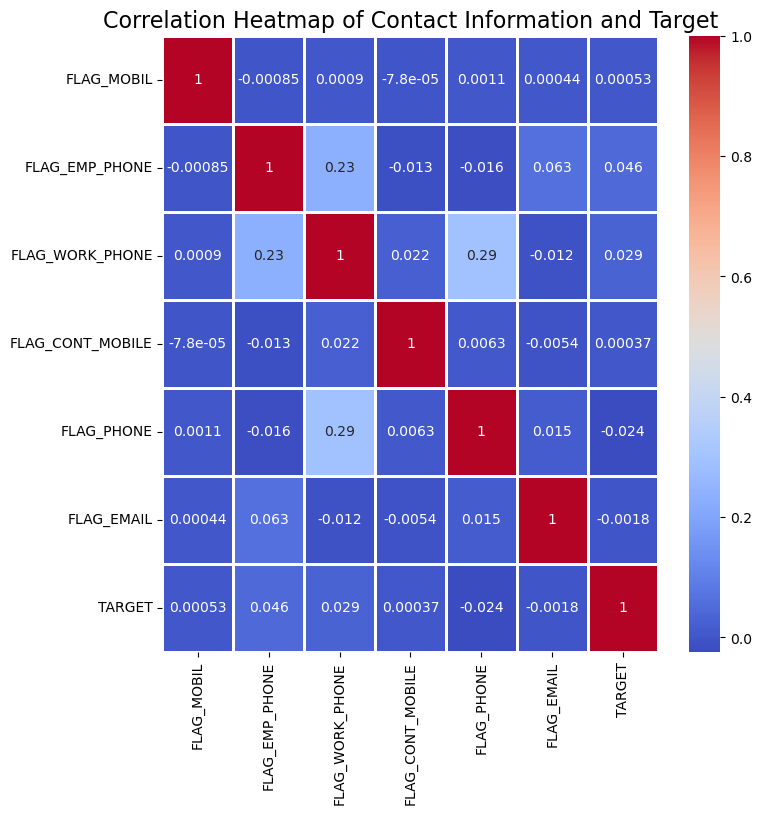

In [41]:
# here I am checking if there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_column = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                  'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

Contact_corr = app_inp0df[contact_column].corr()

fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(Contact_corr,
                 xticklabels=Contact_corr.columns,
                 yticklabels=Contact_corr.columns,
                 annot=True,
                 cmap="coolwarm",
                 linewidth=1)
ax.set_title('Correlation Heatmap of Contact Information and Target', fontsize=16)

plt.show()

#### Insights: 
- Heat map shows that There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted.

So I am going to remove the unwanted columns from data set app_inp0df
Creating a new variable called unwanted_col to store all the unwanted columns.

In [44]:
#un-wanted and un-used columns in data set
unwanted_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3']

In [45]:
len(unwanted_col)

33

In [46]:
#Dropping the un-wanted columns:
app_inp0df.drop(labels = unwanted_col, axis=1, inplace = True)

In [47]:
app_inp0df.shape

(307511, 43)

#### Insights:
- After dropping the missing value and un-wanted columns there are 307511 rows, and 43 columns left for analyzing farther.

In [49]:
app_inp0df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

In [50]:
app_inp0df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2              Government

In [51]:
app_inp0df.shape

(307511, 43)

#### Imputing values:

Imputing values  for "OCCUPATION_TYPE" column

In [54]:
app_inp0df.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [55]:
#Percentage of each category present in "OCCUPATION_TYPE" column
app_inp0df["OCCUPATION_TYPE"].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [56]:
#checking if OCCUPATION_TYPE has null values
app_inp0df.OCCUPATION_TYPE.isnull().sum()

96391

#### Insights:
- So, 'OCCUPATION_TYPE' has 96391 nul values
- To fix this, I have to impute "Unknown" for the missing values

In [58]:
#imputing null values with "Unknown"
app_inp0df.OCCUPATION_TYPE =  app_inp0df.OCCUPATION_TYPE.fillna("Unknown")

#checking the null values of OCCUPATION_TYPE again:
app_inp0df.OCCUPATION_TYPE.isnull().sum()


0

In [59]:
app_inp0df.OCCUPATION_TYPE.describe()

count      307511
unique         19
top       Unknown
freq        96391
Name: OCCUPATION_TYPE, dtype: object

Now, there is 0 null values in "OCCPATION_TYPE"

Now I am going to plot a barplot of "OCCUPATION_TYPE" with each category in percentage

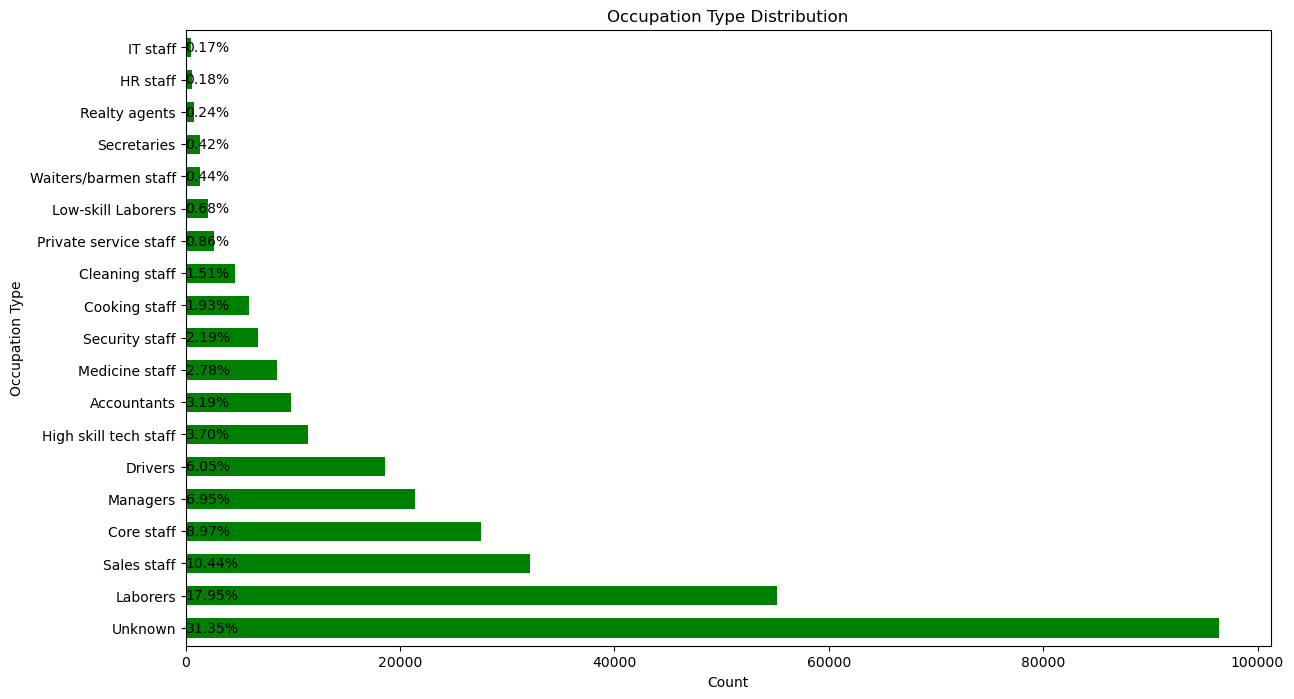

In [62]:
#plotting barh
#adjusting figzsize
occupation_counts = app_inp0df.OCCUPATION_TYPE.value_counts()
occupation_percentages = (occupation_counts / occupation_counts.sum()) * 100


plt.figure(figsize=[14,8])
ax = occupation_counts.plot.barh(color="Green", width=0.6)

# Adding percentage labels to the bars
for i, v in enumerate(occupation_percentages):
    ax.text(v, i, f'{v:.2f}%', ha='left', va='center', color='black')

plt.title("Occupation Type Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation Type")
plt.show()

#### Insights:
- The largest category is "Unknown" with 31.35% of the data, indicating a significant portion of the dataset lacks occupation information.
- Prevalence of Laborers: The "Laborers" category is the second largest, comprising 17.95% of the total, suggesting a substantial number of individuals in this dataset are engaged in manual labor.
- Sales Staff: "Sales staff" accounts for 10.44%, indicating a notable representation of individuals working in sales-related roles.
- Core Staff: "Core staff" makes up 8.97%, highlighting their importance within the dataset.
- Managers: Managers constitute 6.95%, reflecting a considerable portion of individuals in managerial positions.
- Drivers: With 6.05%, drivers form a significant occupational group, possibly indicating a large number of individuals involved in transportation-related jobs.
- High Skill Tech Staff: Representing 3.70%, this group includes individuals in high-tech and specialized roles.
- Accountants and Medicine Staff: Accountants and medicine staff constitute 3.19% and 2.78%, respectively, showing the presence of professional and healthcare occupations.
- Security and Cooking Staff: Security staff and cooking staff make up 2.19% and 1.93%, respectively, indicating roles related to safety and food services.
- IT and HR Staff: IT staff and HR staff are the least represented with 0.17% and 0.18%, respectively, indicating fewer individuals in these technical and administrative roles within the dataset.
- Data Gaps: The high percentage of "Unknown" occupation types highlights a potential data quality issue, which could affect analysis and insights.
- Sector Representation: The dataset has a significant representation of manual labor, sales, and core staff roles, indicating the economic sectors predominantly covered.
- Professional Diversity: Despite some categories having lower counts, there's a diversity of professional roles represented, including technical, managerial, and service-oriented jobs.







#### Imputing values for CODE_GENDER:

XNA values are very low and Female is the majority. So lets replace XNA with gender 'F'

In [66]:
app_inp0df.CODE_GENDER.describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [67]:
app_inp0df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [68]:
#Imputing the value'XNA' that means not available for the column 'CODE_GENDER'.Then replacing "XNA" to "F" for "CODE_GENDER"
app_inp0df.loc[app_inp0df.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [69]:
#Checking the value_counts again:
app_inp0df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

#### Insights:
Female category has: 202452

Male category has: 105059

In [71]:
#checking if "CODE_GENDER" has any null values
app_inp0df.CODE_GENDER.isnull().sum()

0

#### Inights:
- "CODE_GENDER" has 0 null values.

Lets analyse farther:


In [74]:
app_inp0df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

#### Insights:
- These above mentioned columns represent number of enquries made for the customer(which should be discrete).

- From above describe results I see that all values are numerical, for imputing missing values mean should not be used as it is in decimal form, Then for imputing missing values median is best suited for all these columns.

Now I am going to make a new variable called "amount_req_credit" for  merging "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR" 


In [77]:
amount_req_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]

In [78]:
#now I am going to fill missing values with median values
app_inp0df.fillna(app_inp0df[amount_req_credit].median(), inplace=True)

In [79]:
null_values(app_inp0df).head(20)

NAME_TYPE_SUITE                0.420148
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
DAYS_LAST_PHONE_CHANGE         0.000325
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
SK_ID_CURR                     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_DOCUMENT_3                0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
dtype: float64

#### Insights:
- still there are few missing value columns ,But I am going to ignore them because the missing value count is very low.

In [81]:
# Casting variable into numeric in the dataset

numerical_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

In [82]:
app_inp0df[numerical_columns] = app_inp0df[numerical_columns].apply(pd.to_numeric)
app_inp0df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [83]:
app_inp0df.shape

(307511, 43)

#### Standardising values for app_inp0d

In [85]:
app_inp0df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
count      307511.000000    307511.000000            307511.000000   
mean        -4986.120328     -2994.202373                12.063419   
std          3522.886321      1509.450419                 3.265832   
min        -24672.000000     -7197.000000                 0.000000   
25%         -7479.500000     -4299.000000                10.000000   
50%         -4504.000000     -3254.000000                12.000000   
75%         -2010.000000     -1720.000000                14.000000   
max             0.000000         0.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                307511.000000           307511.000000   
mean                      0.040659                0.078173   
std                       0.197499                0.268444   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
count           307511.000000            307511.000000   
mean                 0.230454                 0.179555   
std                  0.421124                 0.383817   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max                  

#### Insights:
- Columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days, have negative values and for that there is a need to correct those values.
- Columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE has very high values,will make these numerical columns into categorical columns for better understanding.
- Then I will convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED.

Now I am going to create a new variable called 'days_column', and put all days columnn together

In [88]:
days_column= ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

app_inp0df[days_column].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

Data shows there  is negative values in columns, I will correct the negative values with abs() function. Beacause, Days value can not be in negative.

In [90]:
#using abs() function here:
app_inp0df[days_column] = abs(app_inp0df[days_column])

In [91]:
#checking the correct data
app_inp0df[days_column].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

#### Insights:
- There is no negative values in days_column anymore.

Creating a new column named 'Employment_years' from 'Days Employed'

In [94]:
app_inp0df['YEARS_EMPLOYED'] = app_inp0df['DAYS_EMPLOYED']/365
#Bins
bins = [0,5,10,15,20,25,30,50] #using 50 because we need a higher value that is not in data
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

app_inp0df["Employment_years"] = pd.cut(app_inp0df["YEARS_EMPLOYED"],bins = bins, labels = slots)

Employment_years
0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: proportion, dtype: float64



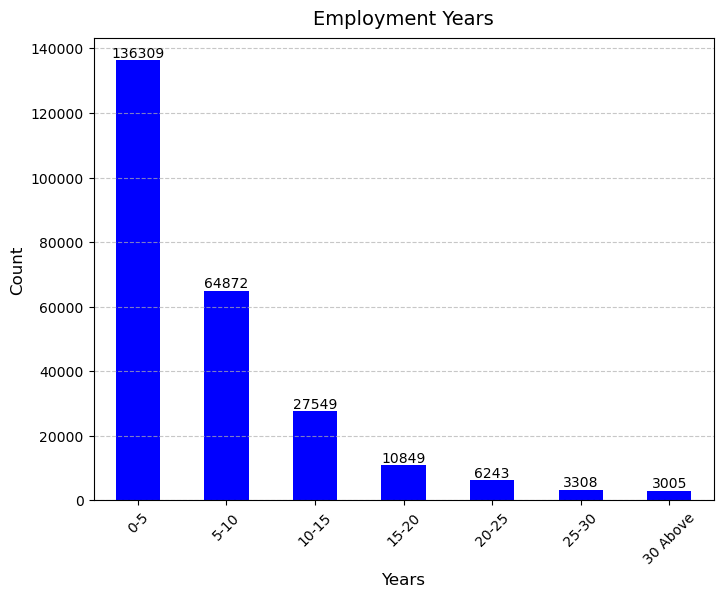

In [95]:
#plotting bar plot for employment years
print(app_inp0df["Employment_years"].value_counts(normalize=True) * 100)
print()

# Plotting
plt.figure(figsize=[8, 6])
ax = (app_inp0df["Employment_years"].value_counts()).plot.bar(color="blue", width=0.5)

# Adding labels to the bars
for i, v in enumerate(app_inp0df["Employment_years"].value_counts()):
    ax.text(i, v + 1, f'{v}', ha='center', va='bottom')

plt.title("Employment Years", fontsize=14, pad=10)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights:
- A significant majority of employees have a short tenure, with about 136,309 individuals having 0-5 years of employment.

- Very few employees stay beyond 25 years, with only 3,308 in the 25-30 range and 3,005 in 30+.

Converting DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding.

In [98]:
app_inp0df["AGE"] = app_inp0df["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

app_inp0df["AGE_GROUP"] = pd.cut(app_inp0df["AGE"], bins=bins, labels=slots)
print(app_inp0df["AGE_GROUP"].value_counts(normalize= True)*100)
print()


AGE_GROUP
35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: proportion, dtype: float64



#### Identifying Outliers for app_inp0df

In [100]:
# I will use describe again to identify columns with outliers:
app_inp0df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
count      307511.000000    307511.000000            307511.000000   
mean         4986.120328      2994.202373                12.063419   
std          3522.886321      1509.450419                 3.265832   
min             0.000000         0.000000                 0.000000   
25%          2010.000000      1720.000000                10.000000   
50%          4504.000000      3254.000000                12.000000   
75%          7479.500000      4299.000000                14.000000   
max         24672.000000      7197.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                307511.000000           307511.000000   
mean                      0.040659                0.078173   
std                       0.197499                0.268444   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
count           307511.000000            307511.000000   
mean                 0.230454                 0.179555   
std                  0.421124                 0.383817   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max                  

#### Insights:
- Data shows all those columns who have high difference between max and 75th percentile.
  
- The ones which have high difference between max and 75th percentile, I will check if the column has outliers.

In [102]:
out_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

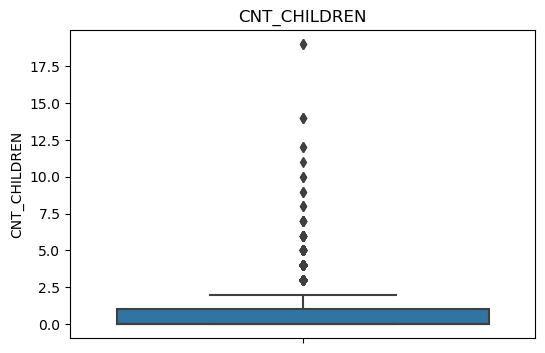

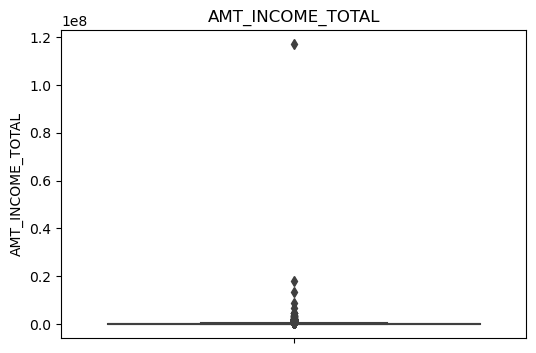

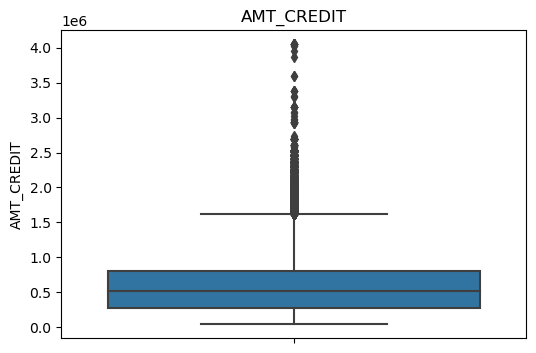

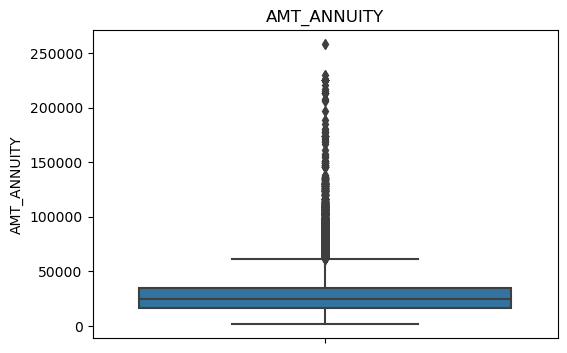

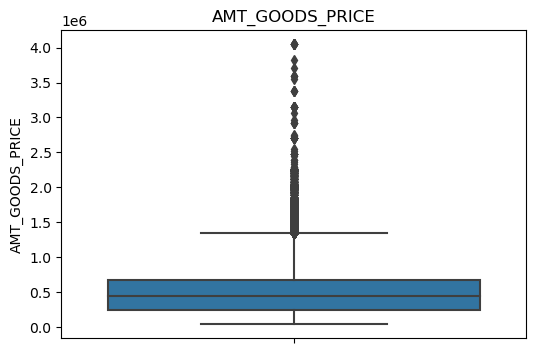

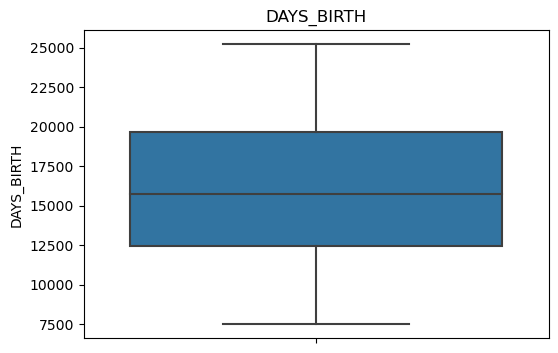

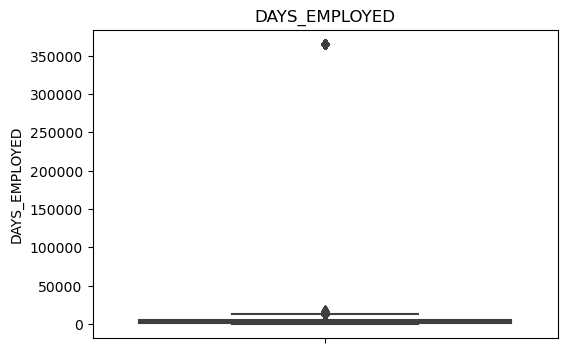

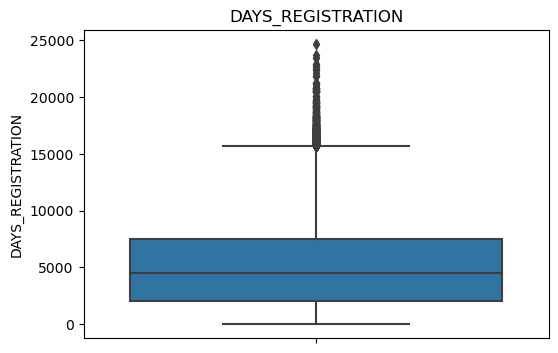

In [103]:
#I will use for loop to check outliers in 'out_col' 
for columns in out_col:
  plt.figure(figsize = [6,4])
  plt.title(columns)
  sns.boxplot(y = app_inp0df[columns])
  plt.show()

#### Insights:
- CNT_CHILDREN, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, have some number of outliers in them.

- DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and so it has to be an incorrect entry.

- 
AMT_INCOME_TOTAL has good numbers of outliers which indicate that a few of the loan applicants have very high income when compared to the others

- 
DAYS_BIRTH has no outliers which means the data is relibleb and can analyse without getting any significant errors..

In [105]:
#Checking the number of unique values each column possess

app_inp0df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

#### Converting from object to categorical columns:

In [107]:
#Checking the number of unique values each column in app_inp0df possess to identify categorical columns
app_inp0df.nunique().sort_values(ascending=False)

#to check all the names of the columns
pd.set_option('display.max_rows', None)
print(app_inp0df.nunique().sort_values(ascending=False))

SK_ID_CURR                     307511
AGE                             17460
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
YEARS_EMPLOYED                  12574
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    19
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AGE_GROUP                           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_S

In [108]:
#getting all the columns app_inp0df have available:
app_inp0df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUR

Now from this columns list converting Categorical columns from Object to categorical 

In [110]:
cat_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','WEEKDAY_APPR_PROCESS_START',
                       'CNT_CHILDREN']
for col in cat_col:
    app_inp0df[col] = pd.Categorical(app_inp0df[col])                     

In [111]:
#checking len
len(cat_col)

18

In [112]:
app_inp0df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  category
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#### Insights:
- After imputing and converting there are 43 columns left for analysis.

- cat_columns have 18 columns.

#### ****Reading previous_application.csv dataset for understanding****

In [115]:
prev_app_inp1df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [116]:
prev_app_inp1df.shape

(1670214, 37)

#### Insights:
- There are columns having negative, postive values which includes days, will fix it

In [118]:
prev_app_inp1df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [119]:
#using describe()
prev_app_inp1df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### Insights:
- There are columns having negative, postive values which includes days,so I will fix those after checking the missing values.

#### Analysing & Deleting Unnecessary Columns in prev_app_inp1df

In [122]:
null_values(prev_app_inp1df)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

#### Insights:
- There are 4 columns here that have missing values more than 50% thresold.

- There are 11 columns here that have missing values more than 40% thresold.

Creating a new variable called 'prev_app_missing_val_column_50' for storing columns that have missing values over 50% threshold.

Then, I will drop the column having missing values more than 50% thresold.

In [125]:
prev_app_missing_val_column_50 = null_values(prev_app_inp1df)[null_values(prev_app_inp1df)>50]
prev_app_missing_val_column_50

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
dtype: float64

In [126]:
#dropping the over 50% missing value columns:
prev_app_inp1df.drop(columns = prev_app_missing_val_column_50.index, inplace = True)

In [127]:
#checking all the column names of prev_app_inp1df
prev_app_inp1df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [128]:
#Now we are going to store all unwanted and unused coumns into new variable called 'prev_data_unused_col'
prev_data_unused_col =  ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [129]:
#dropping the unwanted and un-used columns
prev_app_inp1df.drop(prev_data_unused_col,axis = 1, inplace = True)

In [130]:
prev_app_inp1df.shape

(1670214, 29)

#### Insights:
- After removing the high value missing columns and unwanted columns, we have 1670214 rows and 22 columns to analyz.
- prev_app_inp1df data set has few columns related to date that needs to be corrected with abs() function.

In [132]:
prev_app_inp1df.isnull().sum() 

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                  372235
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE              385515
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE              820405
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                  372230
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION            

#### Imputing values "Unknown" to the missing values


In [134]:
#here I am imputing values "Unknown" as this a categorical column
prev_app_inp1df["NAME_TYPE_SUITE"] = prev_app_inp1df['NAME_TYPE_SUITE'].fillna("Unknown")

In [135]:
null_values(prev_app_inp1df)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
SK_ID_PREV                    0.000000
NAME_PORTFOLIO                0.000000
SK_ID_CURR                    0.000000
NAME_CLIENT_TYPE              0.000000
NAME_TYPE_SUITE               0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE   

#### Insights:
- We can see 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' have missing values in their columns.As they count days , we will keep the null values as they are.


- I need to impute null values into this two continuous variables called "AMT_ANNUITY" & "AMT_GOODS_PRICE"

- I will use median if these two have any outliers in them.

- I will use mode if the distribution pattern if preserved.

- Imputing CNT_PAYMENT with 0 as the 'NAME_CONTRACT_STATUS' for these indicate that most of these loans were not started.

In [138]:
#I will be actively taking out values count for NAME_CONTRACT_STATUS where CNT_PAYMENT have null values.
prev_app_inp1df.loc[prev_app_inp1df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [139]:
#imputing the null values as 0
prev_app_inp1df['CNT_PAYMENT'].fillna(0,inplace = True)

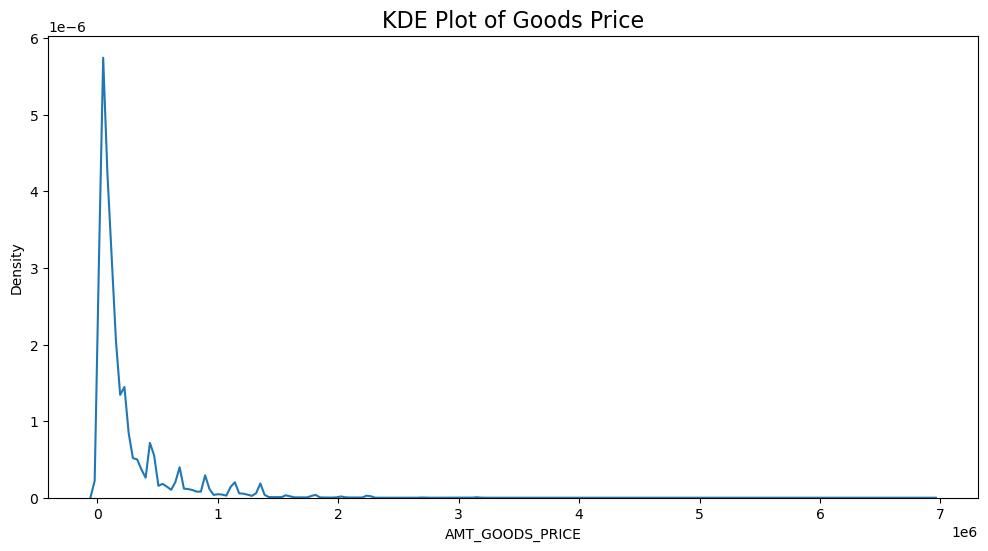

In [140]:
# I will be plotting a kde plot for "AMT_GOODS_PRICE" to understand the distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(prev_app_inp1df['AMT_GOODS_PRICE'])
plt.title('KDE Plot of Goods Price', fontsize=16)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Density')
plt.show()

#### Insights:
- Graphshows that there are several peaks along the distribution.

- I will be imputing with mode, mean and median , and see if the distribution is same.

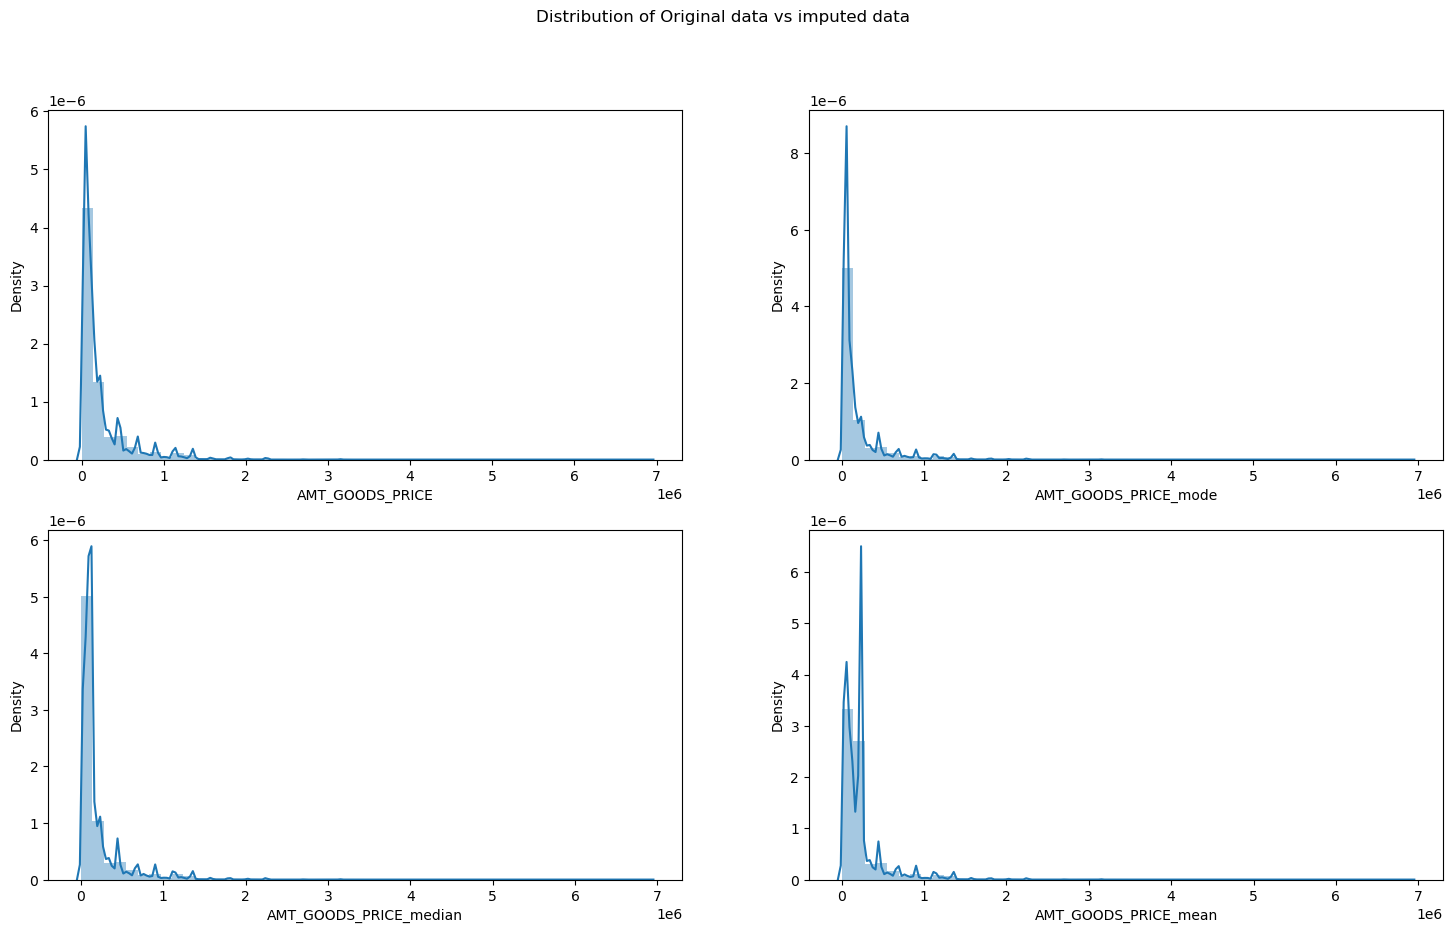

In [142]:
# I will be creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean
stats_DF = pd.DataFrame()
stats_DF['AMT_GOODS_PRICE_mode'] = prev_app_inp1df['AMT_GOODS_PRICE'].fillna(prev_app_inp1df['AMT_GOODS_PRICE'].mode()[0])
stats_DF['AMT_GOODS_PRICE_median'] = prev_app_inp1df['AMT_GOODS_PRICE'].fillna(prev_app_inp1df['AMT_GOODS_PRICE'].median())
stats_DF['AMT_GOODS_PRICE_mean'] = prev_app_inp1df['AMT_GOODS_PRICE'].fillna(prev_app_inp1df['AMT_GOODS_PRICE'].mean())

#Plot the distributions
cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median', 'AMT_GOODS_PRICE_mean']


plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_app_inp1df['AMT_GOODS_PRICE'][pd.notnull(prev_app_inp1df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(stats_DF[i[1]])

#### Insights:
- The original distribution is very close to the distribution of data imputed with mode in this case,So I will impute, mode for missing values.

In [144]:
#I will impute null values with mode
prev_app_inp1df['AMT_GOODS_PRICE'].fillna(prev_app_inp1df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

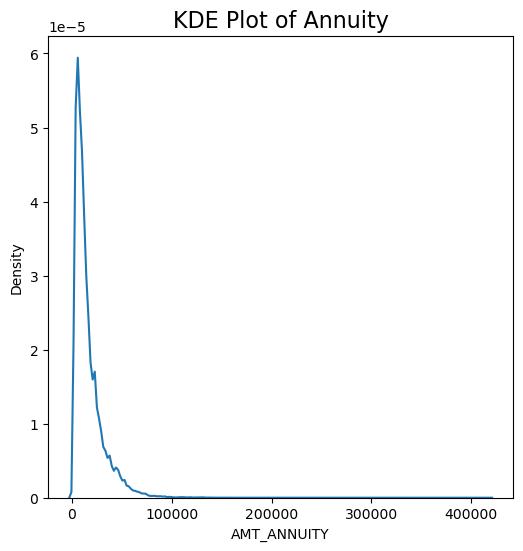

In [145]:
#Now I will plot a kdeplot for "AMT_ANNUITY" to understand the distribution
plt.figure(figsize=(6, 6))
sns.kdeplot(prev_app_inp1df['AMT_ANNUITY'])
plt.title('KDE Plot of Annuity', fontsize=16)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Density')
plt.show()
     

#### Insights:
- Graph shows that there is a single peak at the left side of the distribution.

- This peak indicates the presence of outliers in 'AMT_ANNUITY'.

- So I will be imputing with median. Presence of outliers doesn't go well with mean().

#### Standardize Values for prev_app_inp1df

In [148]:
#imputing the missing values with median

prev_app_inp1df['AMT_ANNUITY'].fillna(prev_app_inp1df['AMT_ANNUITY'].median(),inplace = True)

Now I am  going to convert the negative values of days related columns to positive value using abs()func,For that creating a new variable called "prev_data_days_col".

In [150]:
prev_data_days_col =  ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
prev_app_inp1df[prev_data_days_col].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count   1.670214e+06       997149.000000   997149.000000   
mean   -8.806797e+02       342209.855039    13826.269337   
std     7.790997e+02        88916.115834    72444.869708   
min    -2.922000e+03        -2922.000000    -2892.000000   
25%    -1.300000e+03       365243.000000    -1628.000000   
50%    -5.810000e+02       365243.000000     -831.000000   
75%    -2.800000e+02       365243.000000     -411.000000   
max    -1.000000e+00       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                33767.774054   76582.403064      81992.343838  
std                106857.034789  149647.415123     153303.516729  
min                 -2801.000000   -2889.000000      -2874.000000  
25%                 -1242.000000   -1314.000000      -1270.000000  
50%                  -361.000000    -537.000000       -499.000000  
75%                   129.000000     -74.000000        -44.000000  
max                365243.000000  365243.000000     365243.000000

In [151]:
#converting the negative values
prev_app_inp1df[prev_data_days_col] = abs(prev_app_inp1df[prev_data_days_col])

prev_app_inp1df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342340.056543    15949.224065   
std    1.447588e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    0.000000e+00       365243.000000      475.000000   
50%    1.000000e+01       365243.000000      921.000000   
75%    1.600000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

#### Obervation:
- No negative value in days columns anymore.

In [153]:
#Days group
bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_app_inp1df['YEARLY_DECISION'] = pd.cut(prev_app_inp1df['DAYS_DECISION'],bins,labels=slots)

In [154]:
prev_app_inp1df['YEARLY_DECISION'].value_counts(normalize=True)*100

YEARLY_DECISION
1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: proportion, dtype: float64

#### Insights:
- About 35% of Loan Applicants have applied for a new loan within 1st year of previous loan decision.

- About 23% of Loan Applicants have applied for a new loan within 2nd year of previous loan decision.

- About 13% of Loan Applicants have applied for a new loan within 3rd year of previous loan decision.

In [156]:
null_values(prev_app_inp1df)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
SK_ID_PREV                    0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
CNT_PAYMENT                   0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
NAME_PORTFOLIO                0.000000
SK_ID_CURR                    0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_CLIENT_TYPE              0.000000
NAME_TYPE_SUITE               0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE        0.000000
AMT_GOODS_PRICE          

In [157]:
#We will be cheking the columns of this prev_data set called prev_app_inp1df
prev_app_inp1df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'],
      dtype='object')

We will be converting required columns from Object to categorical


In [159]:
#We will create a new column called 'prev_cat_col'
prev_cat_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']
for col in prev_cat_col:
    prev_app_inp1df[col] =pd.Categorical(prev_app_inp1df[col])

#### Checking Outliers:

In [161]:
#using describe()
prev_app_inp1df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342340.056543    15949.224065   
std    1.447588e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    0.000000e+00       365243.000000      475.000000   
50%    1.000000e+01       365243.000000      921.000000   
75%    1.600000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

#### Insights:
- data shows if any columns has high difference between their 75th percentile and max values.

- The columns that had high difference between 75th percentile and max values, I will check if outliers are present in those columns.

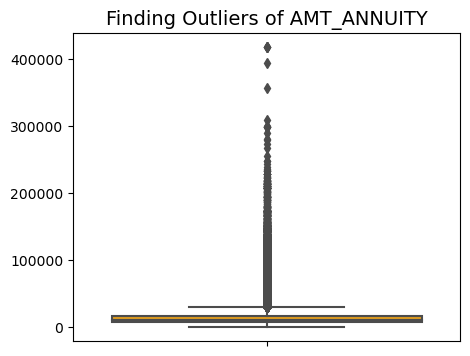

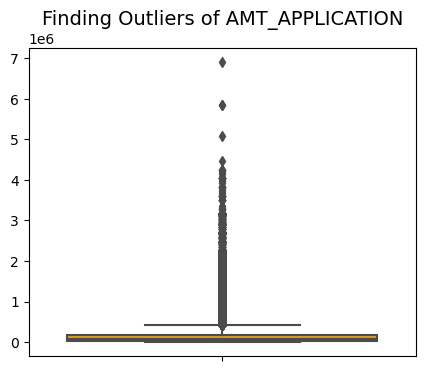

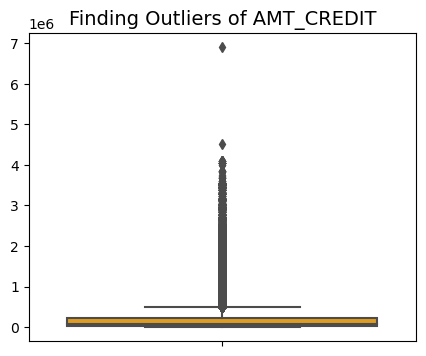

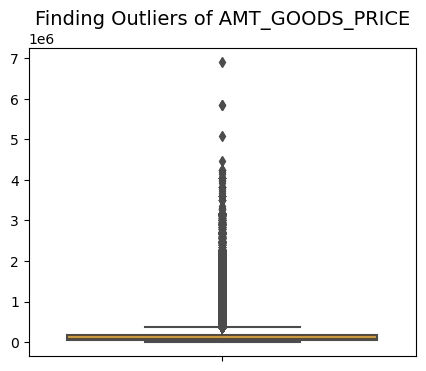

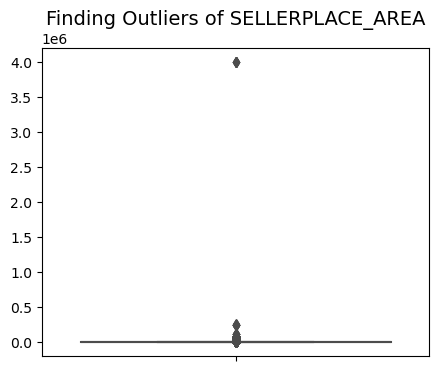

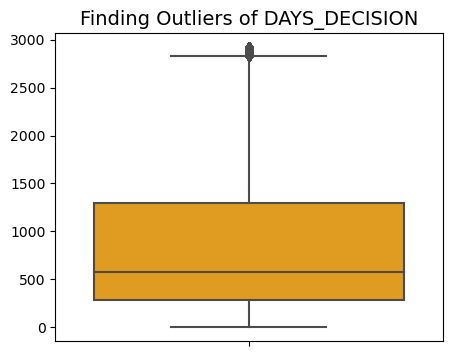

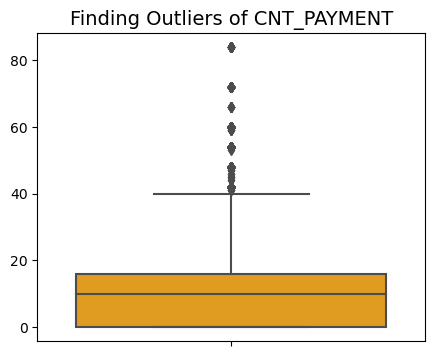

In [163]:
#Creating a new variable called prev_data_out_col for columns that needs to be checked for outliers
prev_data_out_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                     'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

for i in prev_data_out_col:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=prev_app_inp1df[i], orient="h", color="orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(f'Finding Outliers of {i}', fontsize=14)
    plt.show()
     

#### Insights:
- Here we can see ,AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
- The 
CNT_PAYMENTcolumn  has few outlier values
.
- The column 
DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

****Data Analysis****

Next we will do data analysis of the data sets:-

- We will check for imbalance in Data.
- We will do Categorical Data Analysis.
- We will do Categorical segmented Univariate Analysis.
- Then we will do Categorical Bi/Multivariate analysis.
- Then we will excute Numeric Data Analysis.
- We will do Bi-furcation of databased based on TARGET data after that.
- Then we will try to find correlation with Correlation Matrix.
- Then again we will do Numerical segmented Univariate Analysis.
- After that we will do Numerical Bi/Multivariate analysis.

#### We will start with checking Imbalance of data:

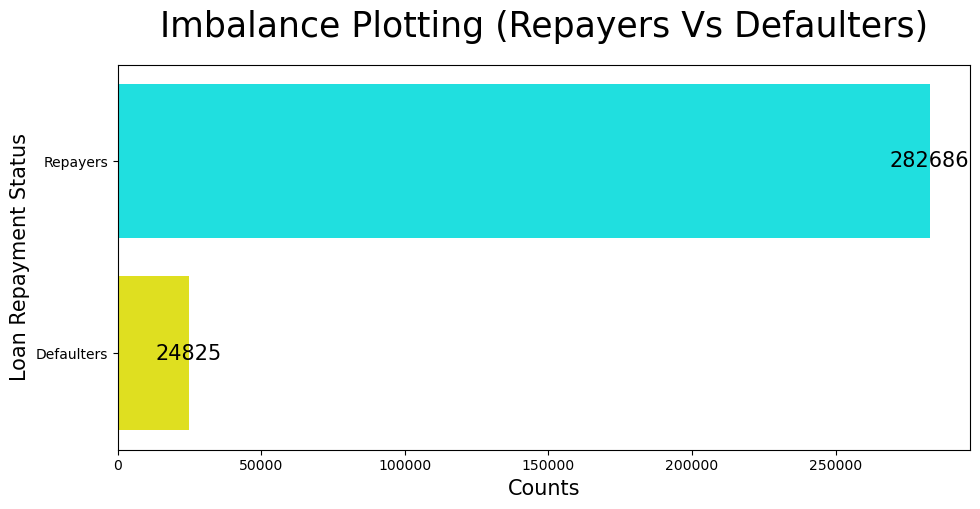

In [168]:
plt.figure(figsize= [11,5])
sns.barplot(y=["Repayers","Defaulters"], x = app_inp0df["TARGET"].value_counts(), palette = ["Cyan","Yellow"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Counts",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayers Vs Defaulters)", fontdict = {"fontsize":25}, pad = 20)
counts = app_inp0df["TARGET"].value_counts()
for index, value in enumerate(counts):
    plt.text(value, index, str(value), color='black',ha="center", va="center", fontsize=15)
plt.show()
     

#### Insights:
- Here graph shows that Repayers numbers count is much higher than defaulters numbers count.

- Repayers with 282686.

- Defaulters with  24825.

Now I am going to check the ratio of imbalance percentage with respect to defaulters and repayers:

In [171]:
# Calculate the percentage of repayers
repayer = round((app_inp0df["TARGET"].value_counts()[0] / len(app_inp0df) * 100), 2)
print("Repayer Percentage is {}%".format(repayer))

# Calculate the percentage of defaulters
defaulter = round((app_inp0df["TARGET"].value_counts()[1] / len(app_inp0df) * 100), 2)
print("Defaulter Percentage is {}%".format(defaulter))

# Calculate and print the imbalance ratio
# The imbalance ratio compares the percentage of repayers to defaulters
print("Imbalance Ratio with respect to Repayers and Defaulters is given: {0:.2f}/1 (approx)".format(repayer / defaulter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayers and Defaulters is given: 11.39/1 (approx)


#### Plotting Functions for Univariate


I will be creating a function for plotting variables for univariate analysis.
- This function will create two plots here.
- One is Count plot of given column w.r.t TARGET column.
- Second is Percentage of defaulters within that column

The function will be taking 6 arguments:

- first one is dataset : to put the dataset we want to use
- second one is col : column name for which we need to the analysis
- third one is target_col : column name for with which we will be comparing
- forth one is ylog : to have y-axis in log10 terms, in case the plot is not readable
- fifth one is x_label_angle : to maintain the orientation of x-axis labels
- sixth one and the last one is h_layout : to give horizontal layout of the subplots

In [175]:
# Function to determine the data type of a column:numerical or categorical


def data_type(dataset, col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category" or dataset[col].dtype == "object":
        return "categorical"

# Function for univariate analysis

def univariate_data(dataset, col, target_col, ylog=False, x_label_angle=0, bar_label_angle=0, h_layout=True, 
                    plot_title=None, legend_labels=None, subplot1_title=None, subplot2_title=None, figsize=(26, 18)):
    if data_type(dataset, col) == "numerical":
        sns.histplot(dataset[col], kde=True)
        plt.title(plot_title if plot_title else col, fontsize=20)
        plt.xlabel(col, fontsize=15)
        plt.ylabel('Density', fontsize=15)
        plt.show()

    elif data_type(dataset, col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index, 'count': val_count.values})

        target_1_percentage = dataset[[col, target_col]].groupby([col], as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col] * 100
        target_1_percentage.sort_values(by=target_col, inplace=True)

        if h_layout:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize)
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=figsize)

        # 1. Subplot 1: Count plot of the column
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col, order=df1[col])
        ax1.set_title(subplot1_title if subplot1_title else col, fontsize=20)
        if legend_labels is not None:
            ax1.legend(legend_labels)
        else:
            ax1.legend(['Repayer', 'Defaulter'])
        ax1.set_xlabel(col, fontdict={'fontsize': 15, 'fontweight': 3})

        # Adding labels to bars
        for p in ax1.patches:
            ax1.annotate(format(p.get_height(), '.1f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points', 
                         rotation=bar_label_angle)

        if x_label_angle:
            s.set_xticklabels(s.get_xticklabels(), rotation=x_label_angle)

        # 2. Subplot 2: Percentage of defaulters within the column
        s = sns.barplot(ax=ax2, x=col, y=target_col, data=target_1_percentage, order=df1[col])
        ax2.set_title(subplot2_title if subplot2_title else "Defaulters percentage in " + col, fontsize=20)
        ax2.set_xlabel(col, fontdict={'fontsize': 15, 'fontweight': 3})
        ax2.set_ylabel('Defaulter %', fontdict={'fontsize': 15, 'fontweight': 3})

        # Adding labels to bars
        for p in ax2.patches:
            ax2.annotate(format(p.get_height(), '.1f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points', 
                         rotation=bar_label_angle)

        if x_label_angle:
            s.set_xticklabels(s.get_xticklabels(), rotation=x_label_angle)

        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)", fontdict={'fontsize': 15, 'fontweight': 3})
        else:
            ax1.set_ylabel("Count", fontdict={'fontsize': 15, 'fontweight': 3})

        plt.suptitle(plot_title if plot_title else col, fontsize=24)
        plt.show()




In [176]:
#Now I am going to store numnercial and categorical columns as list:
cat_column = list(app_inp0df.select_dtypes(["category"]).columns)   # Categorical columns list
num_coulmn = list(app_inp0df.select_dtypes(["int","float"]).columns)  #N Numerical Column list

#### Segmented Univariate Analysis:

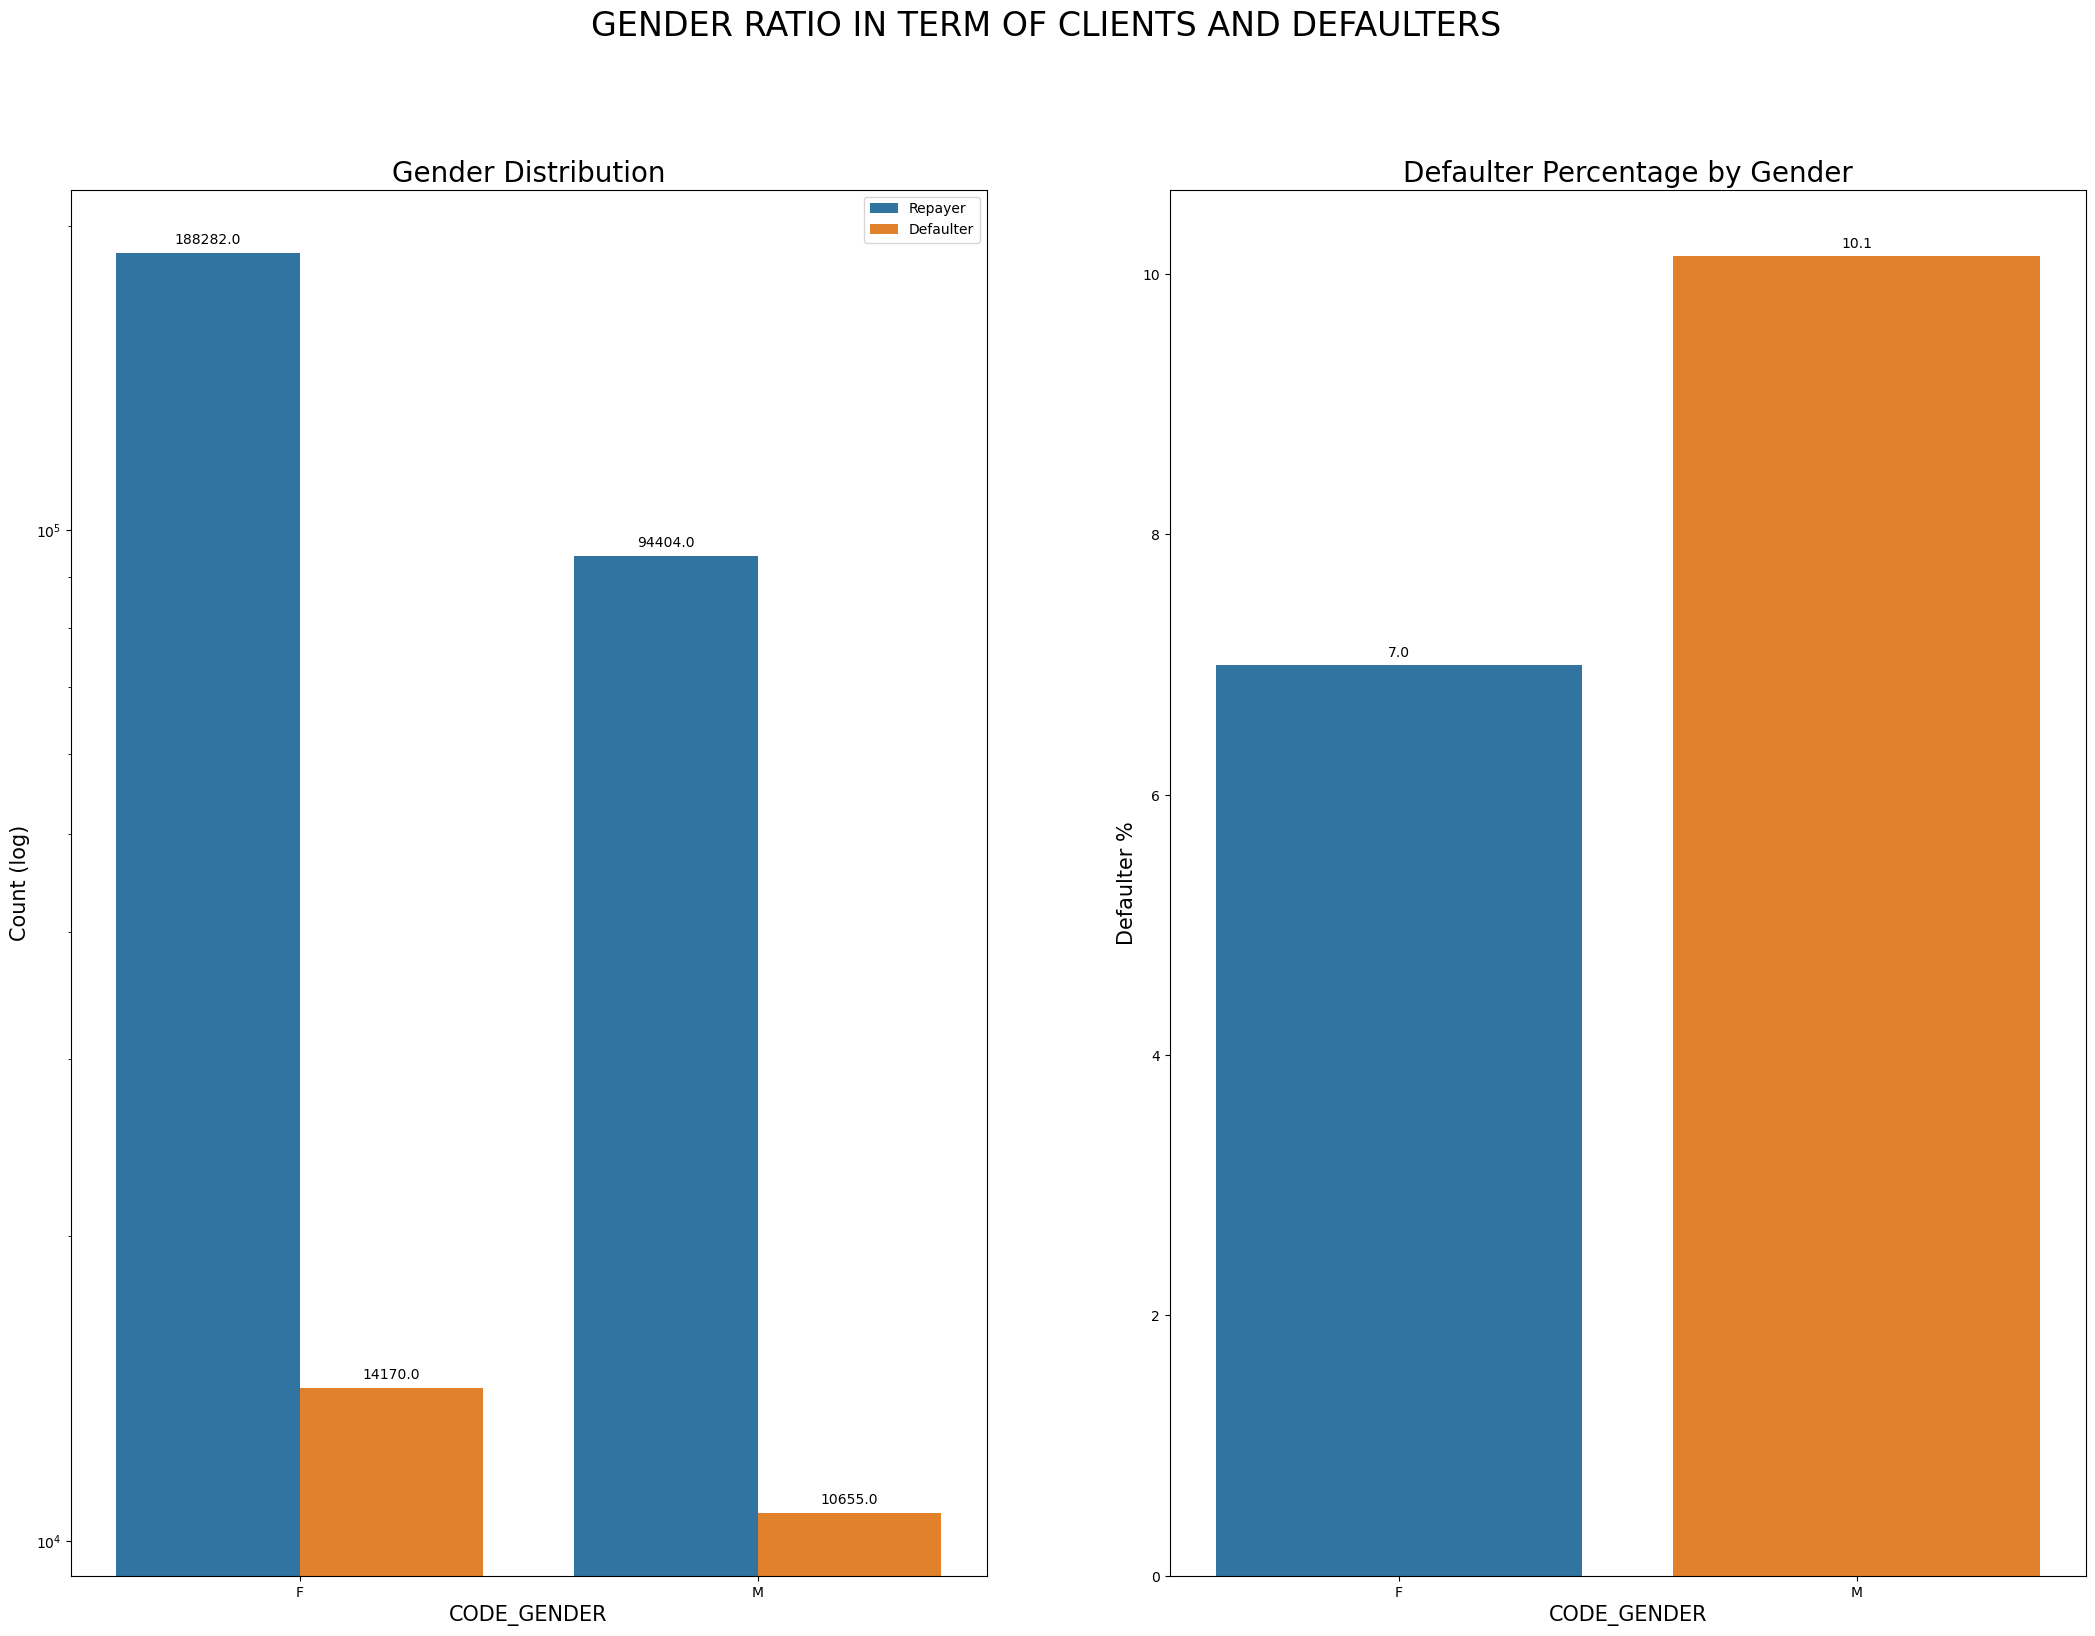

In [178]:
#Checking here the gender ratio in terms of clients and defaulters:
#I checked the gender ratio in terms of clients and defaulters.
#This could provid an initial overview of any potential differences in loan repayment patterns between genders.


univariate_data(
    app_inp0df,
    col="CODE_GENDER",
    target_col="TARGET",
    ylog=True,
    plot_title="GENDER RATIO IN TERM OF CLIENTS AND DEFAULTERS",
    subplot1_title="Gender Distribution",
    subplot2_title="Defaulter Percentage by Gender"
)

#### Insights:
- The number of female clients is very high.

- Based on the deafulters data , males have higher chance than female of not returning their loans.

- Where percentage of male deafaulters are about 10%, and female deafulters are 7%.

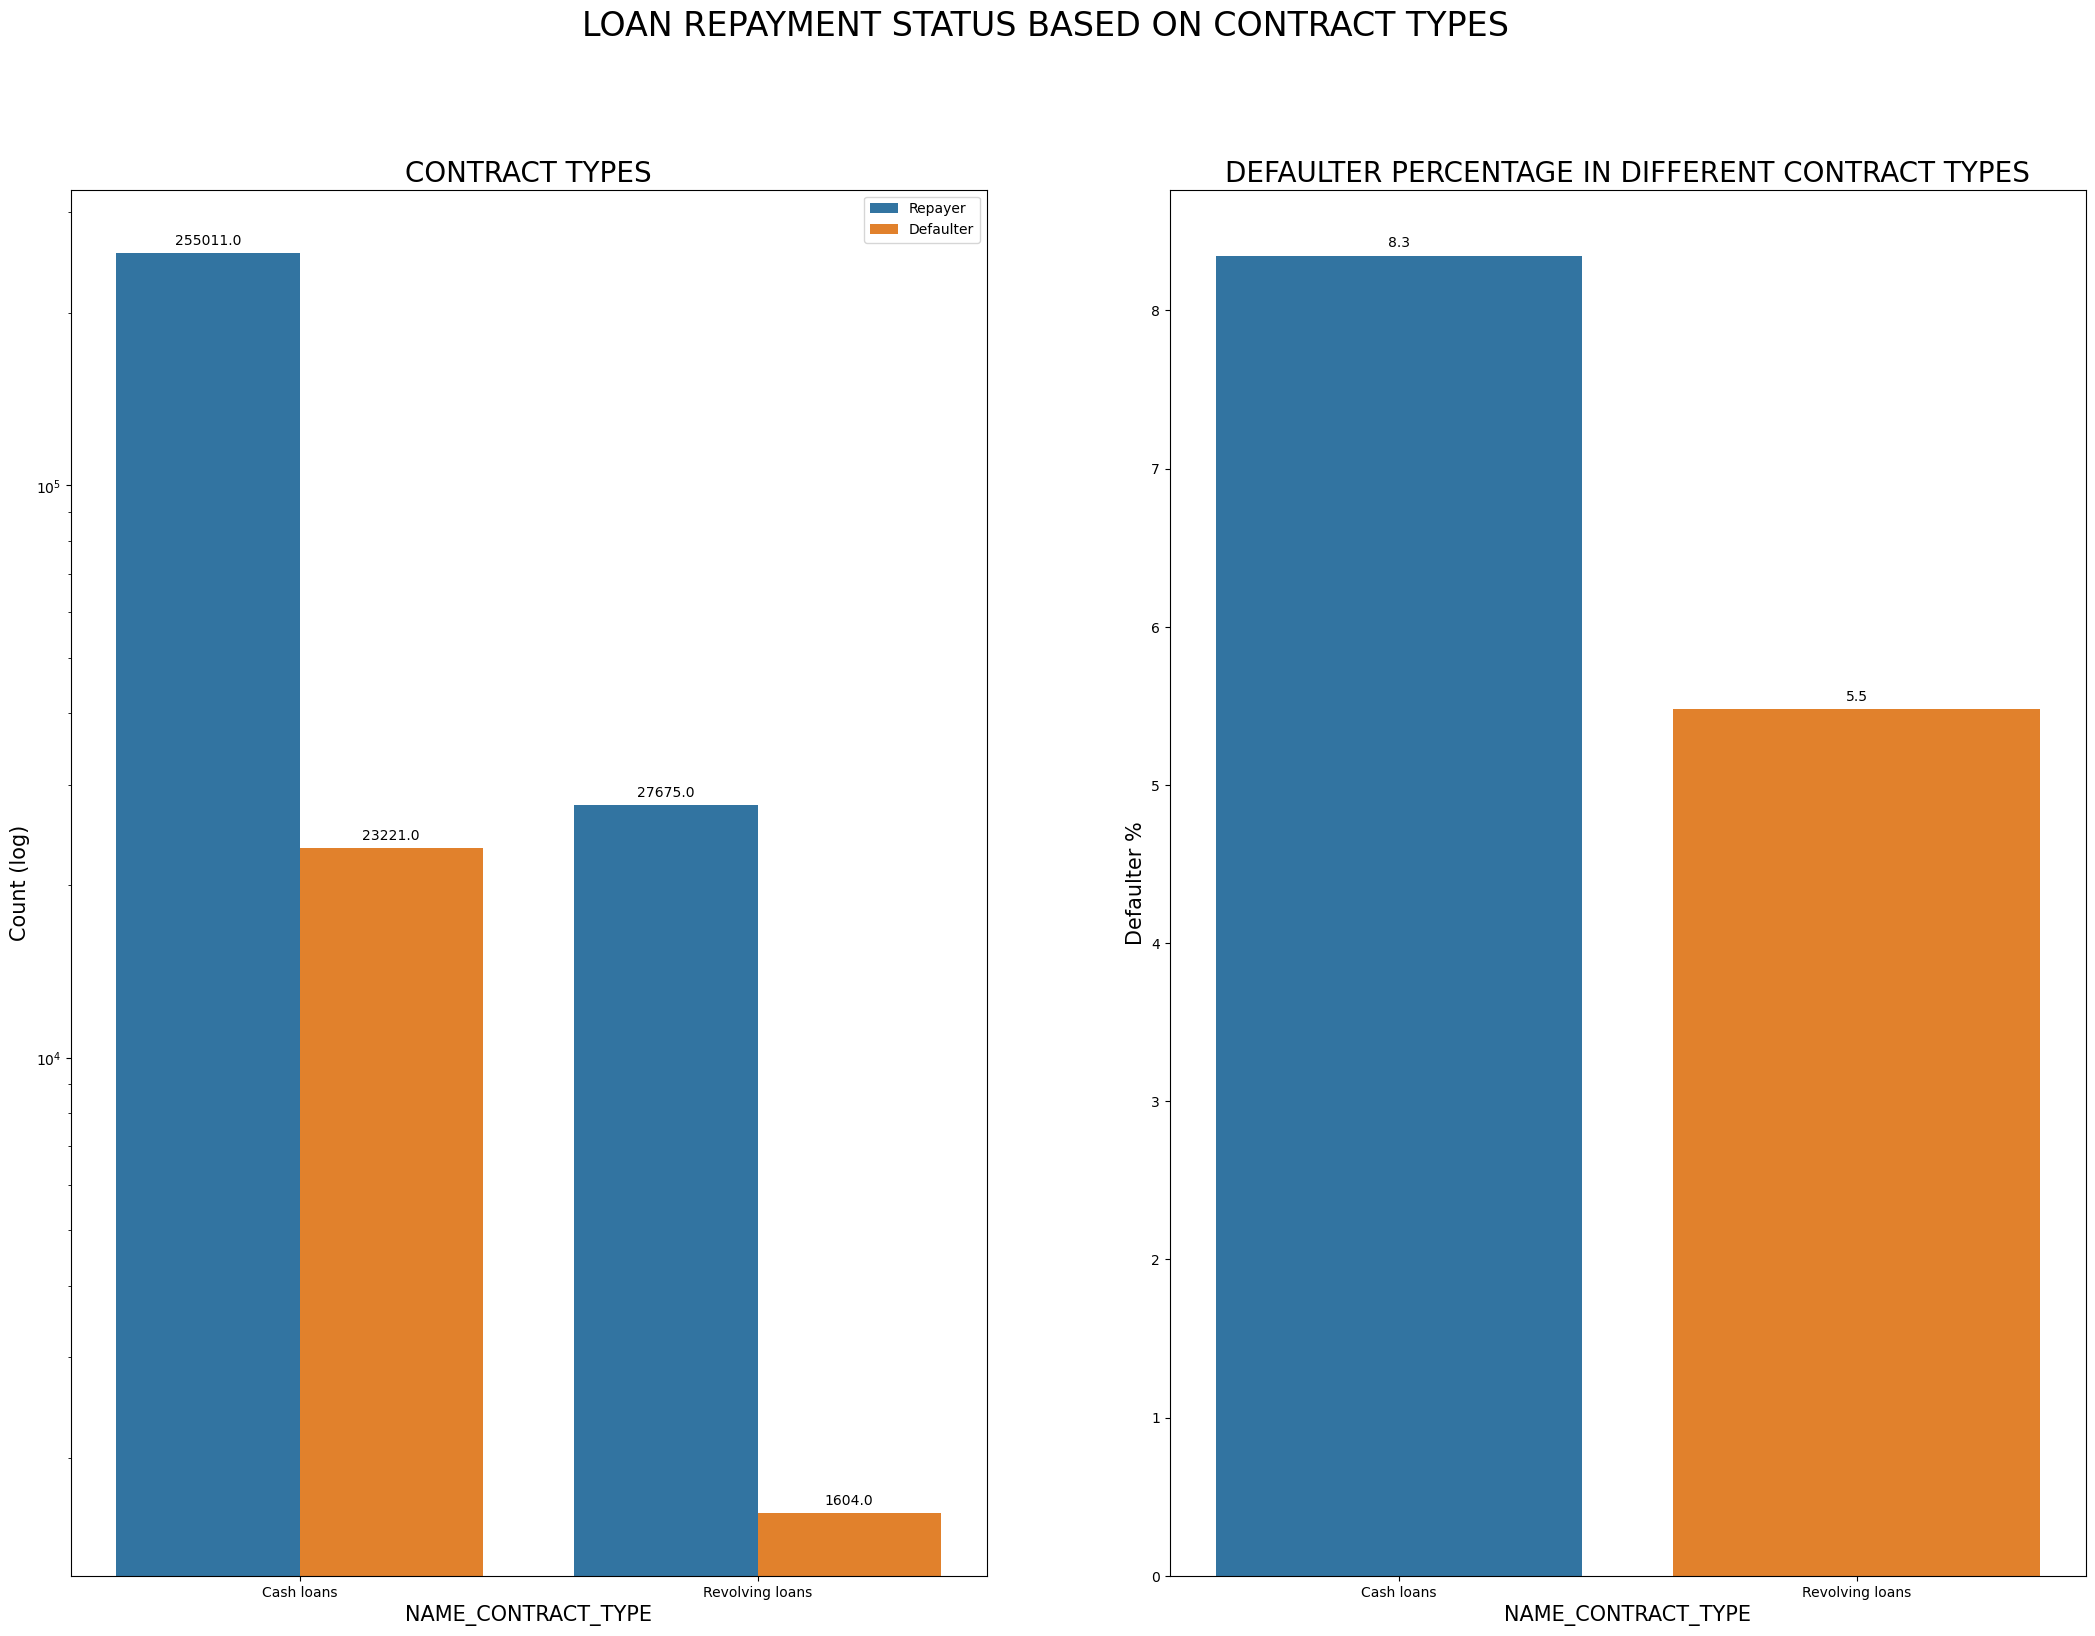

In [180]:
#checking here the loan repayment status based on contract types:
#After analyzing the previous datasets, I want to dive deeper into the relationship between contract type and loan repayment status.
#This could provide valuable insights into how the structure of the loan contract impacts a client's ability to repay.
univariate_data(app_inp0df,
                col="NAME_CONTRACT_TYPE",
                target_col="TARGET",
                ylog=True,
    plot_title="LOAN REPAYMENT STATUS BASED ON CONTRACT TYPES",
    subplot1_title="CONTRACT TYPES",
    subplot2_title="DEFAULTER PERCENTAGE IN DIFFERENT CONTRACT TYPES"
)


#### Insights:
- Revolving loans are just a small fraction in terms of loans been taken.
- In terms of loan defaulters about 8% Cash loan applicants and about 5.5% Revolving loan applicant are in defaulters.

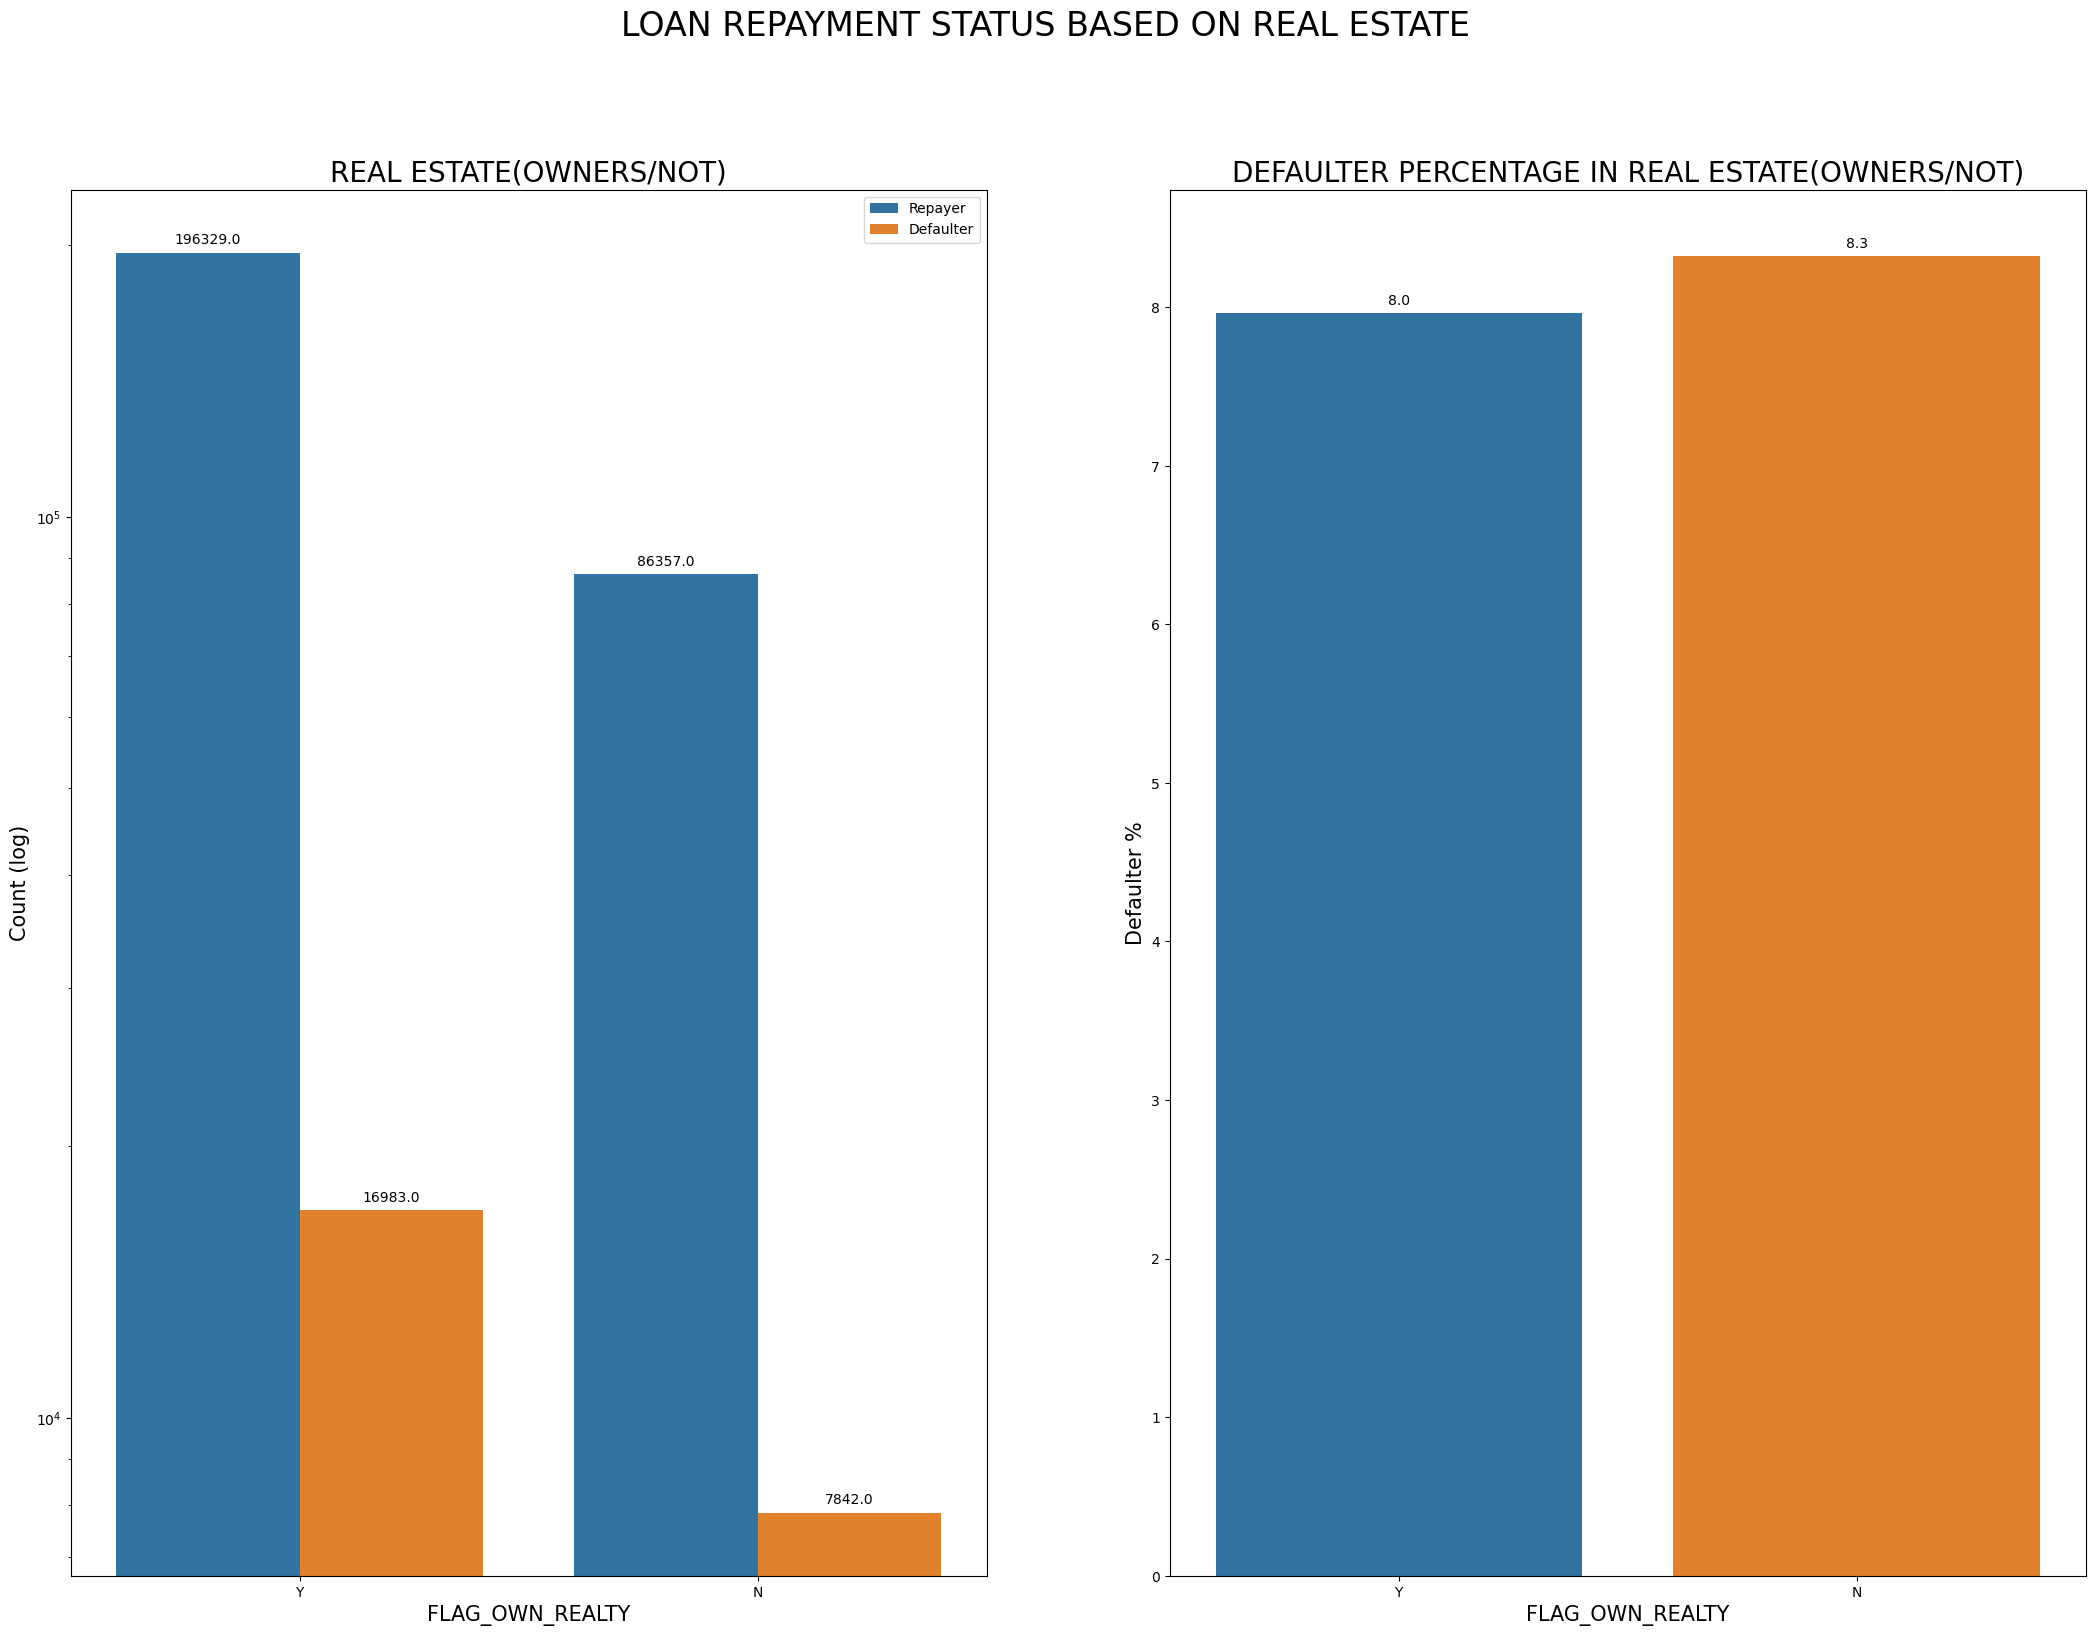

In [182]:
#checking here if owning a real estate is related to loan repayment status:
#After analyzing the input datasets, I wanted to check if owning real estate is related to loan repayment status. 
#This could provide valuable insights into how property ownership impacts loan performance.
univariate_data(app_inp0df,
                col= "FLAG_OWN_REALTY",
                target_col= "TARGET",
                ylog=True,
    plot_title="LOAN REPAYMENT STATUS BASED ON REAL ESTATE",
    subplot1_title="REAL ESTATE(OWNERS/NOT)",
    subplot2_title="DEFAULTER PERCENTAGE IN REAL ESTATE(OWNERS/NOT)"
)

     

#### Insights:
- The clients who own real estate are more inclined to take loans than the ones that don't own real estate.- 
The defaulting rate of both groups are around the same,where real estate owners being 8% and 8.3% for the people who don't own real estates.

- So I can conclude that there is no correlation between owning a real estate and defaulting the loan..

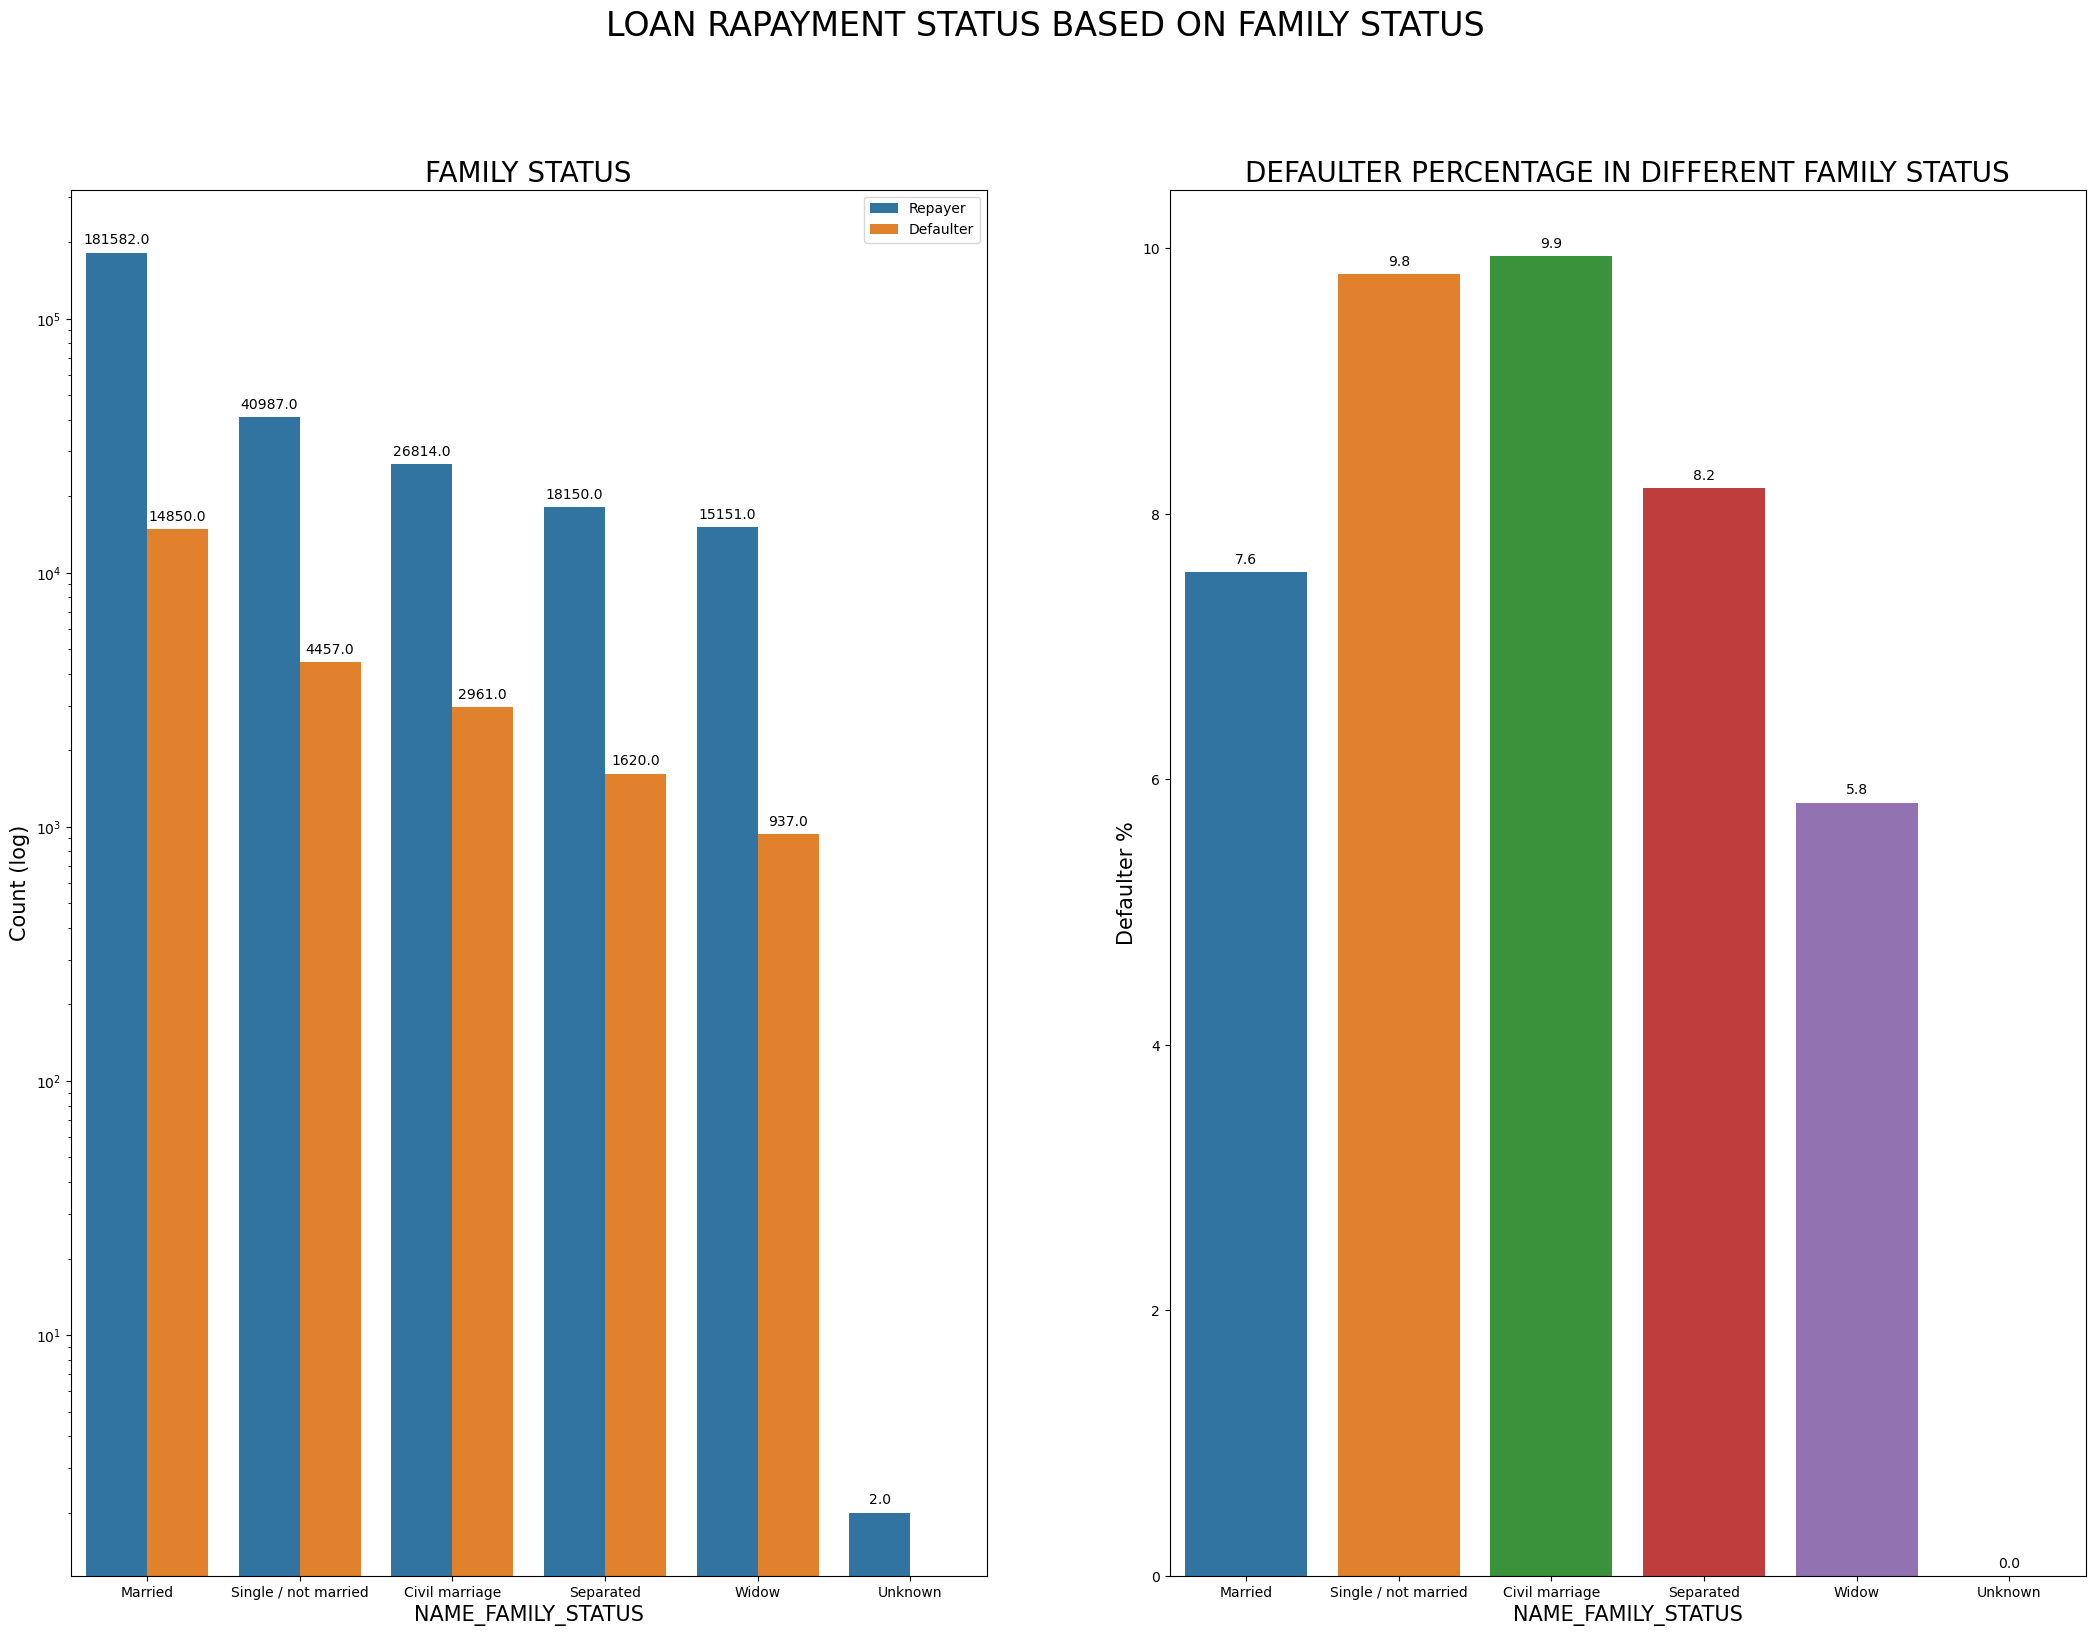

In [184]:
#I am analyzing loan repayment status based on family status: 
#Analyzing the relationship between family status and loan repayment status could provide important insights.
#By understanding how an individual's family situation may impact their ability to repay a loan,
#we can make more informed underwriting decisions and better manage risk.
univariate_data(dataset= app_inp0df, col = "NAME_FAMILY_STATUS",
                target_col = "TARGET",
                ylog=True,
                plot_title= 'LOAN RAPAYMENT STATUS BASED ON FAMILY STATUS',
                subplot1_title= 'FAMILY STATUS',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT FAMILY STATUS')



#### Insights:
- The highest numbers of people who have taken loans are married. Followed by Single/not, Civil marriage, Separated and Widow and Unknown being the last.
- In case of  percentage of defaulters, Civil marriage has the highest percentage: 9.9 and widow has the lowest percentage: 5.8.(exception being Unknown)..

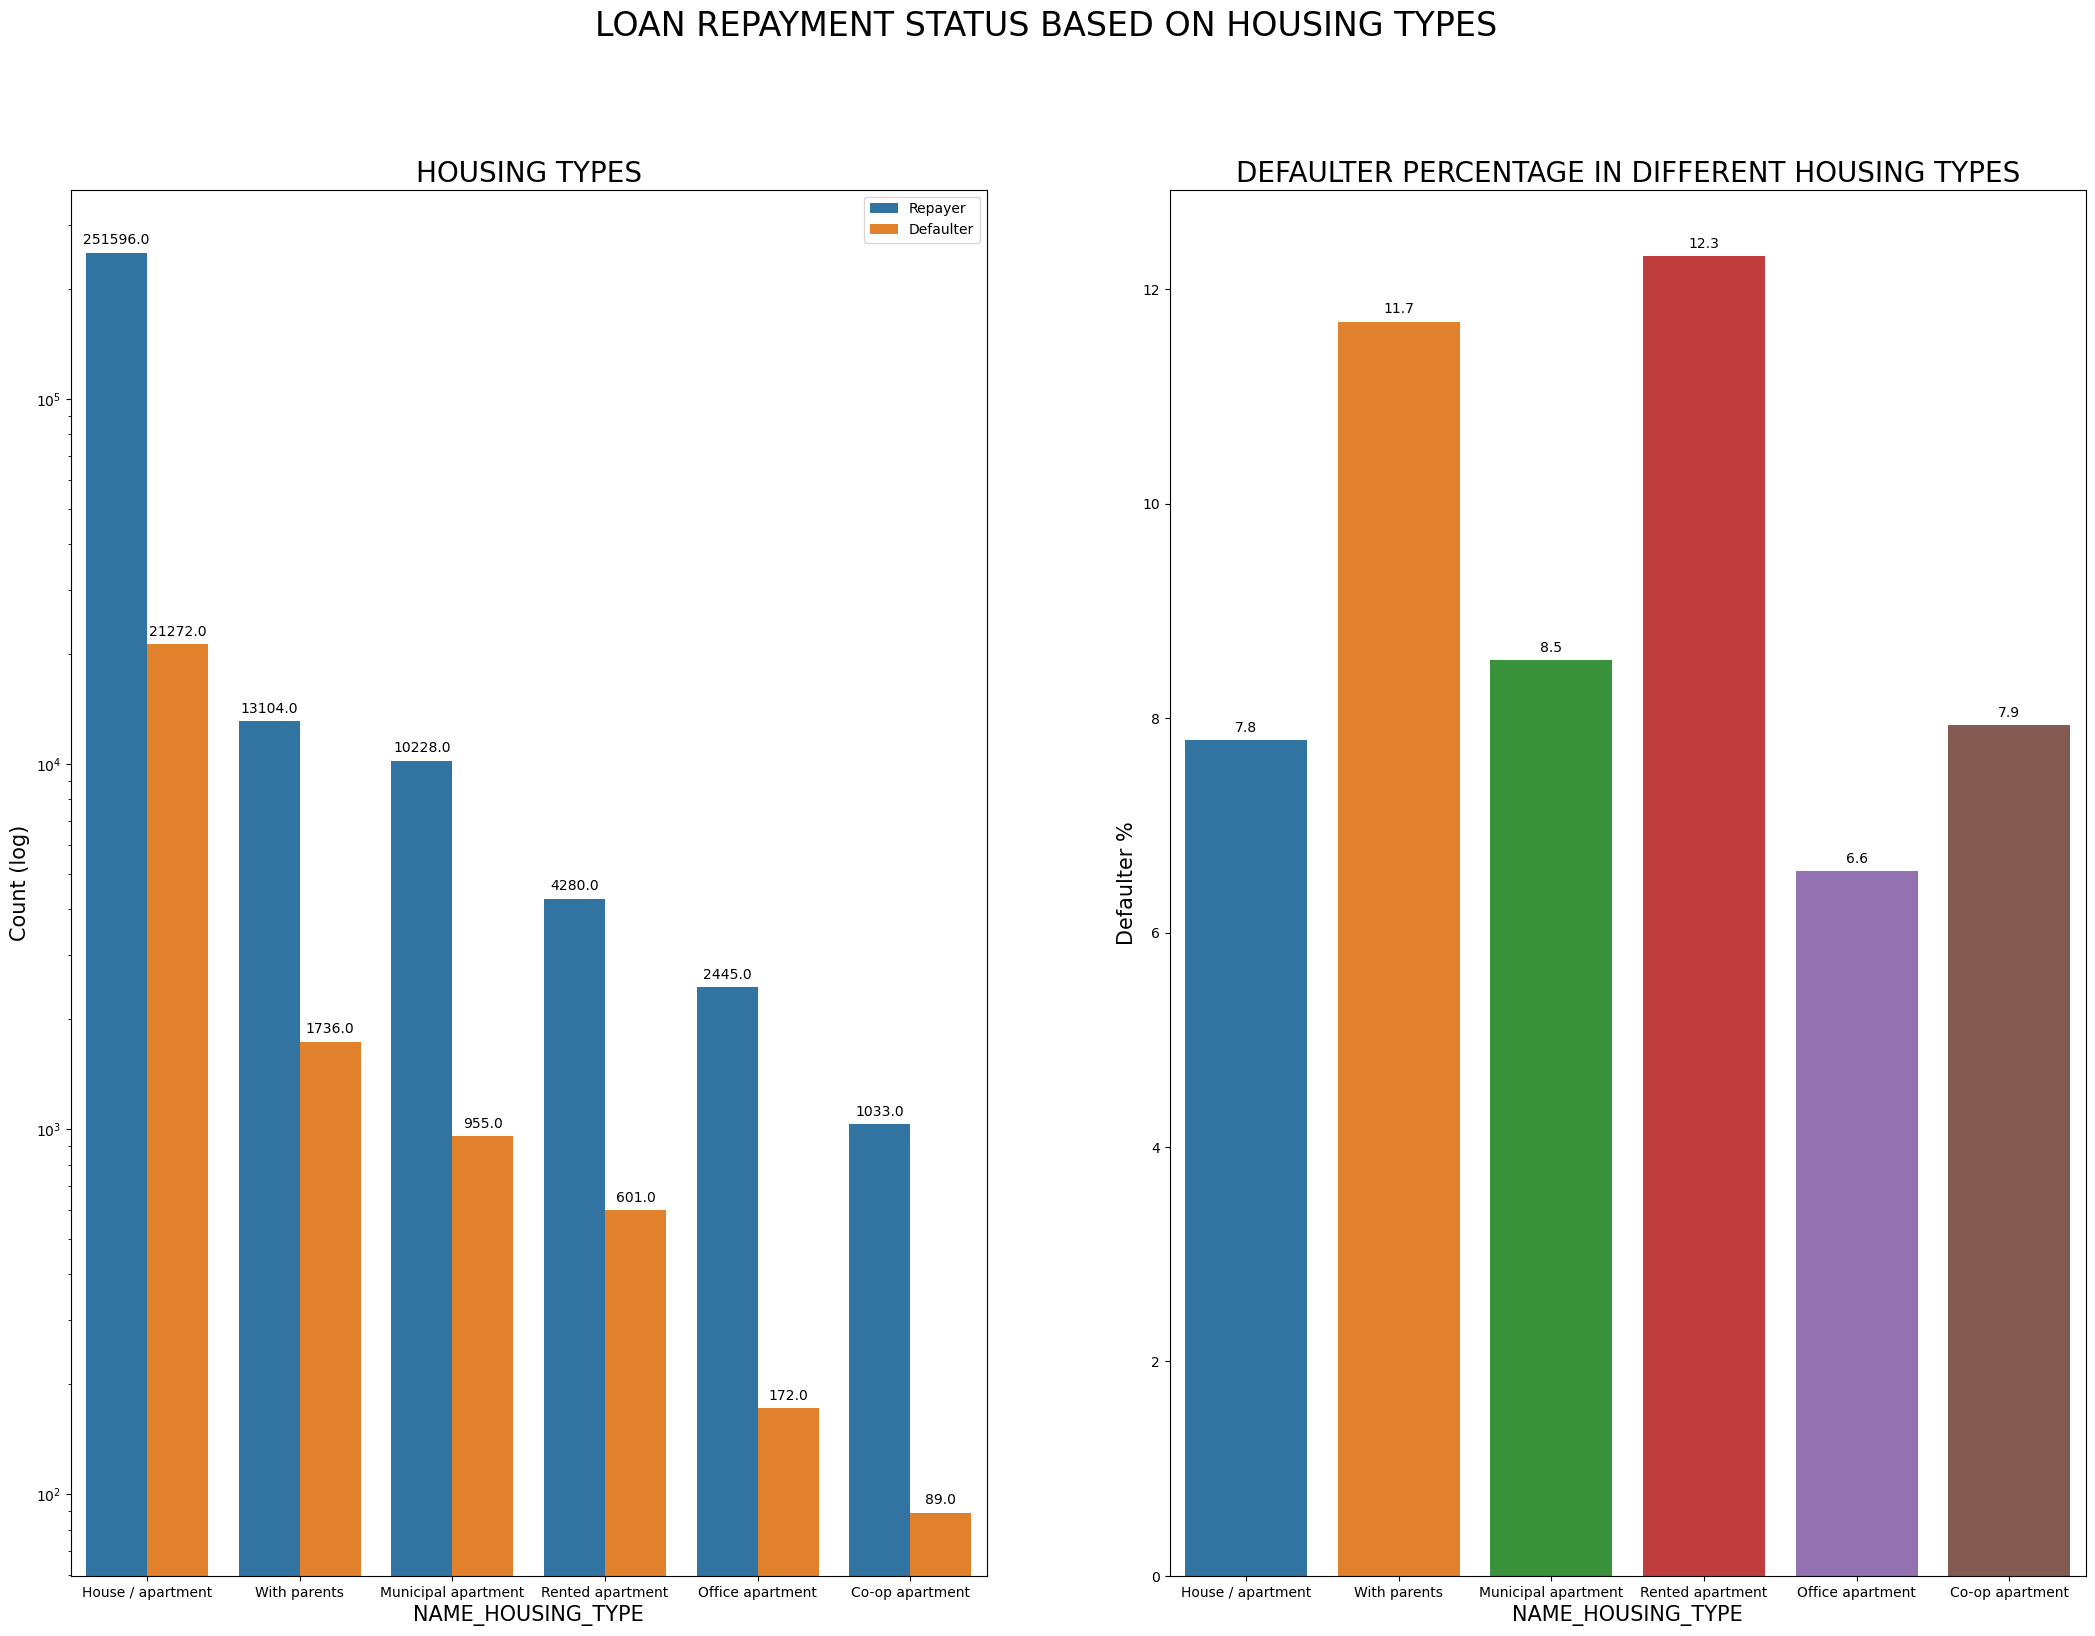

In [186]:
#Now I am going to analys loan repayment status based on housing types:
#I decided to take a closer look at the relationship between housing type and loan repayment status.
#This analysis could provide valuable insights into how different living situations may impact an individual's ability to manage their finances and meet their loan obligations.
univariate_data(dataset= app_inp0df, col = "NAME_HOUSING_TYPE",
                target_col = "TARGET",
                ylog=True,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON HOUSING TYPES',
                subplot1_title= 'HOUSING TYPES',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT HOUSING TYPES')


#### Insights:
- Majority of people who took loans live in House/apartment.Followed by With parents, Municipal apartment, Rented apartment, office apartment and lastly in Co-op apartment.


- People living in office apartments have lowest default rate being 6.6%.

  
- People who are living in Rented apartment have higher percentage of being defaulters, the percentage being 12.3 approximately. Folloed by living with parents, percentage being 11.7.

- People who are living in Rented apartment being the riskiest people to give laons to.

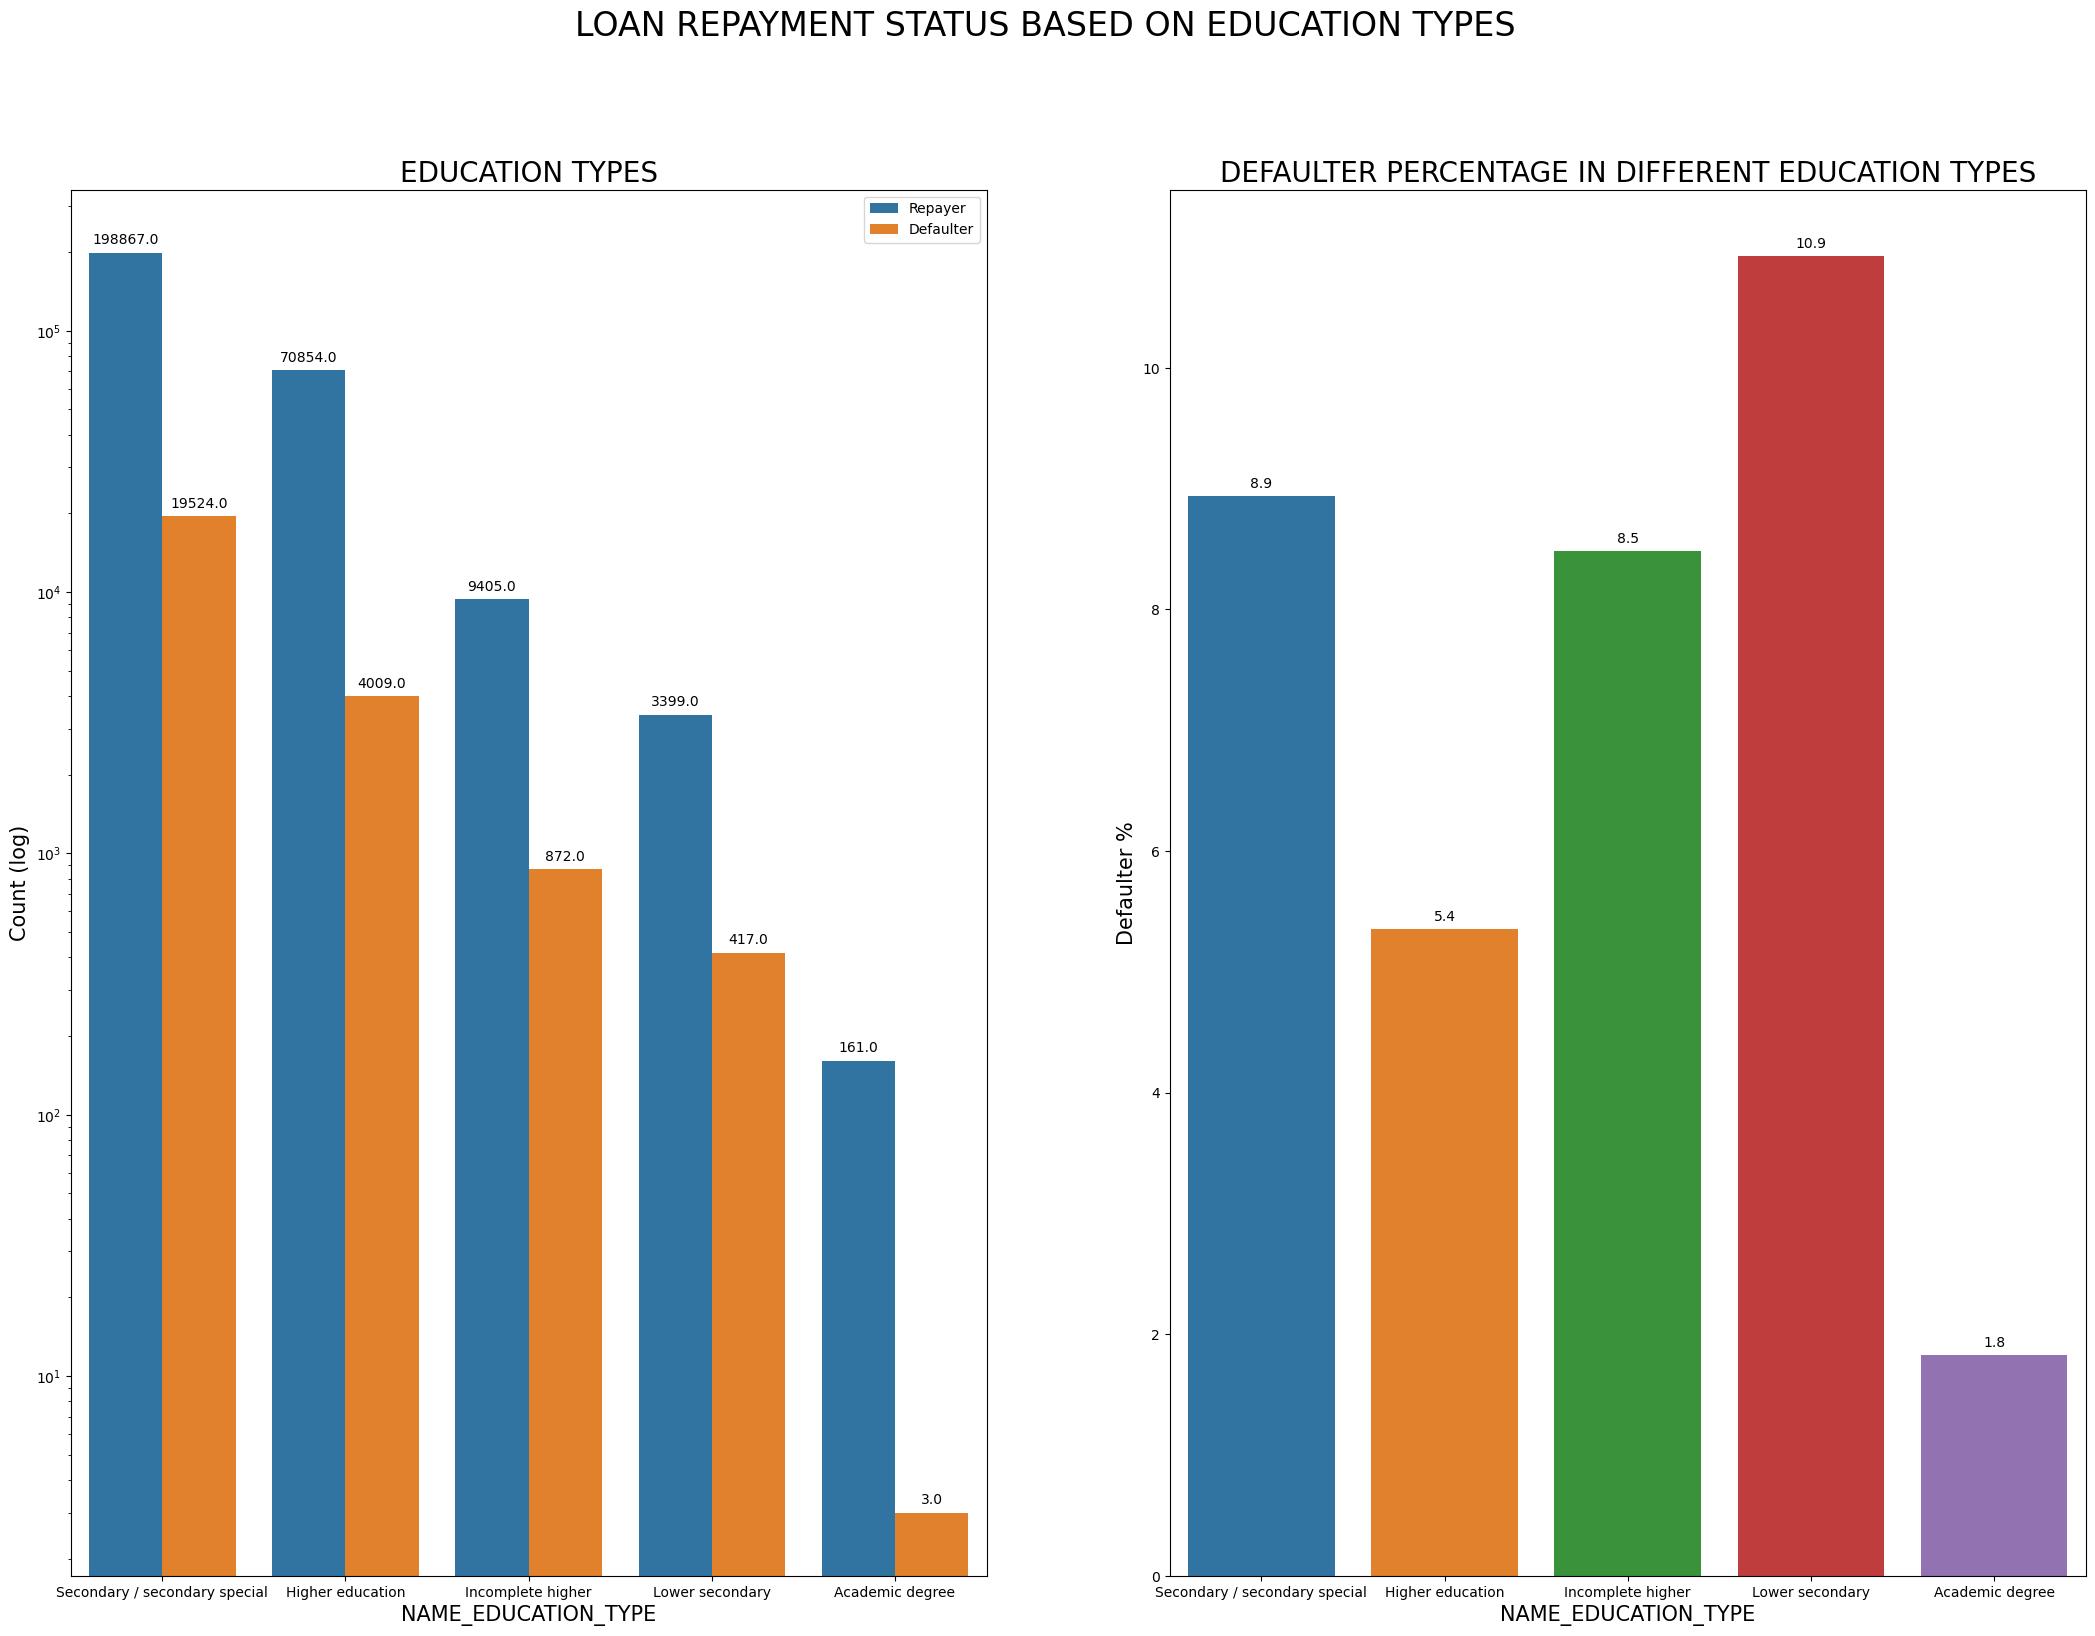

In [188]:
#Now we are going tp analyz loan repayment status based on education types:
#Education Type based on loan repayment status the data on loan repayment status provides an interesting window into how an individual's living situation can impact their financial well-being.
#After analyzing the numbers, I can check the relationship between housing type and loan repayment rates.
univariate_data(dataset= app_inp0df, col = "NAME_EDUCATION_TYPE",
                target_col = "TARGET",
                ylog=True,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON EDUCATION TYPES',
                subplot1_title= 'EDUCATION TYPES',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT EDUCATION TYPES')


#### Insights:
- Majority of clients who has taken loans have Secondary/secondary special education. Followed by Higher education and Academic degree being the last.

- Majority of defaulters has Lower secondary education, percentage being 10.9

- People with Academic degree education are least likely to deafult, default rate being only 1.8% compared to Lower Secondary education where default rate is 10.9%.Big difference.

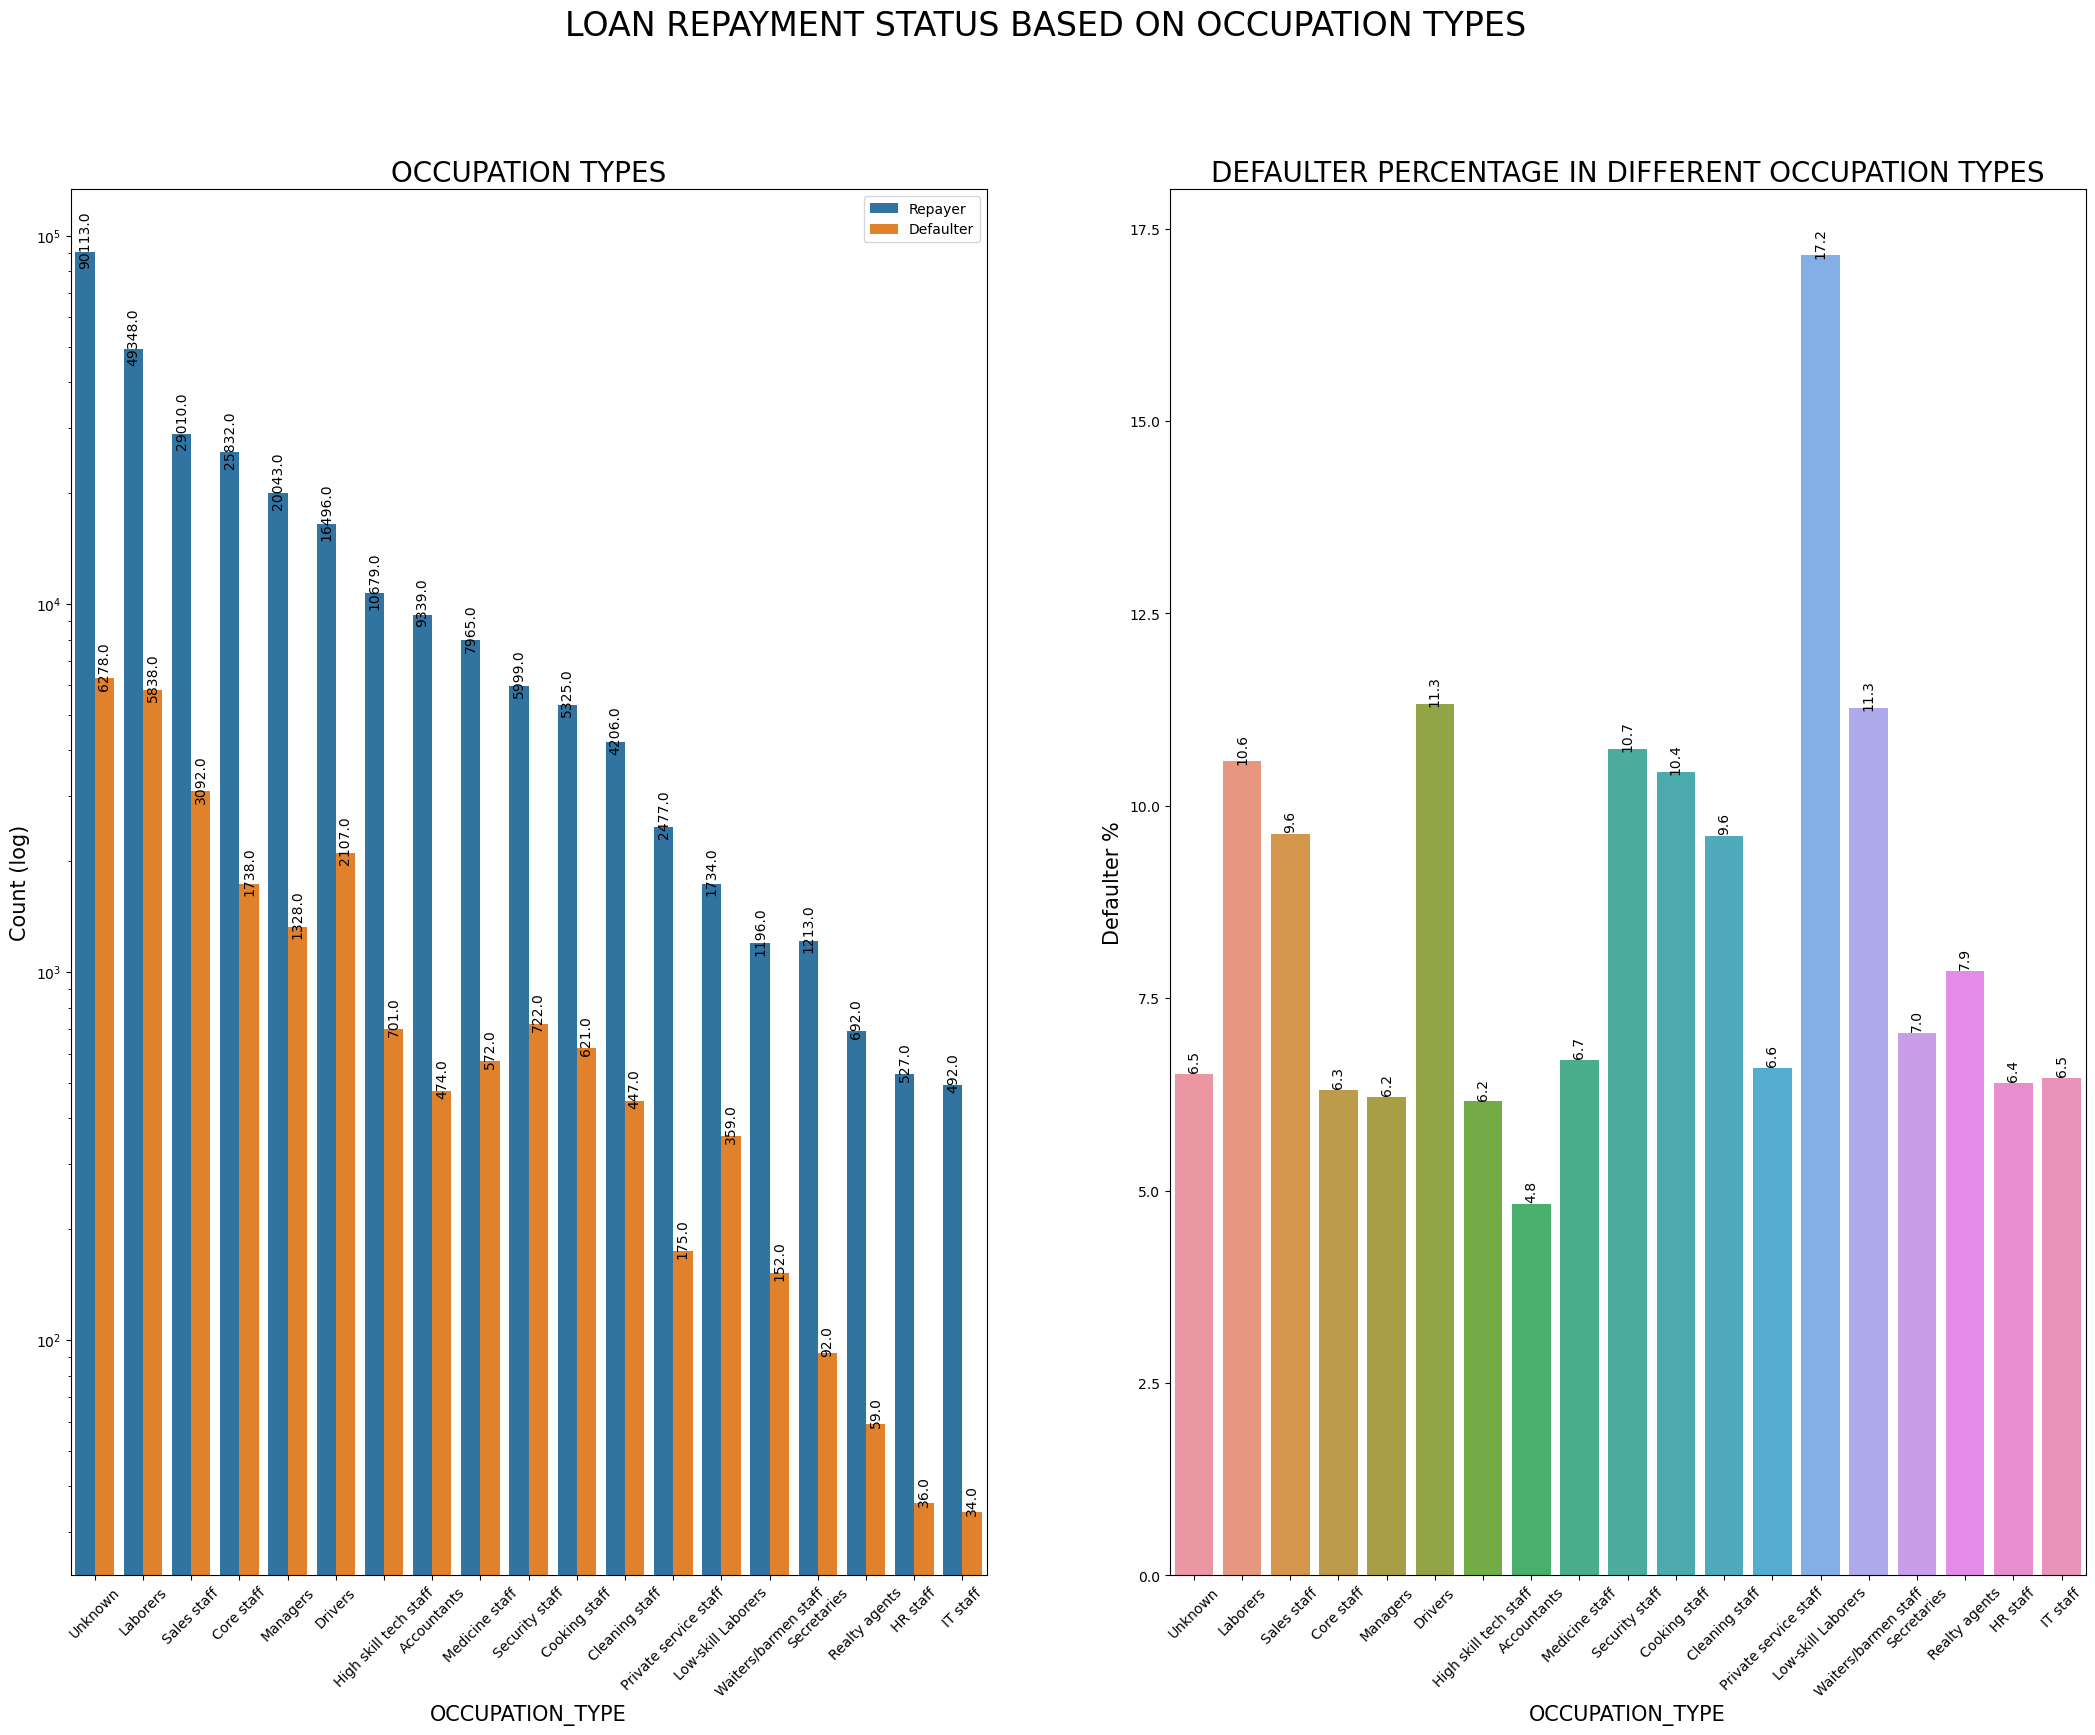

In [190]:
#Here I am going to analyz loan repayment status based on occupation types:
#After examining the relationship between housing type and loan repayment status, I wanted to dig deeper into the data to see if there were any patterns based on the applicant's occupation type.
univariate_data(dataset=app_inp0df, col="OCCUPATION_TYPE", target_col="TARGET", ylog=True, x_label_angle=45, bar_label_angle=90, 
                plot_title='LOAN REPAYMENT STATUS BASED ON OCCUPATION TYPES', 
                subplot1_title='OCCUPATION TYPES', 
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT OCCUPATION TYPES', 
                figsize=(26, 18))

#### Insights:
- Most of the loans are taken by Laborers, followed by Sales staff.(Excluding the unknown)

  
- IT staff and HR Staff are less likely to apply for Loan.

- Highest percent of defauters are Low-skill Laborers, default rate being staggering 17.2%, followed by both Drivers and Waiters/barmen staff with 11.3%, Accountants being less likely to default with 4.8% default rate.

- Low-skill Laborers being the riskiest group to give loans to.

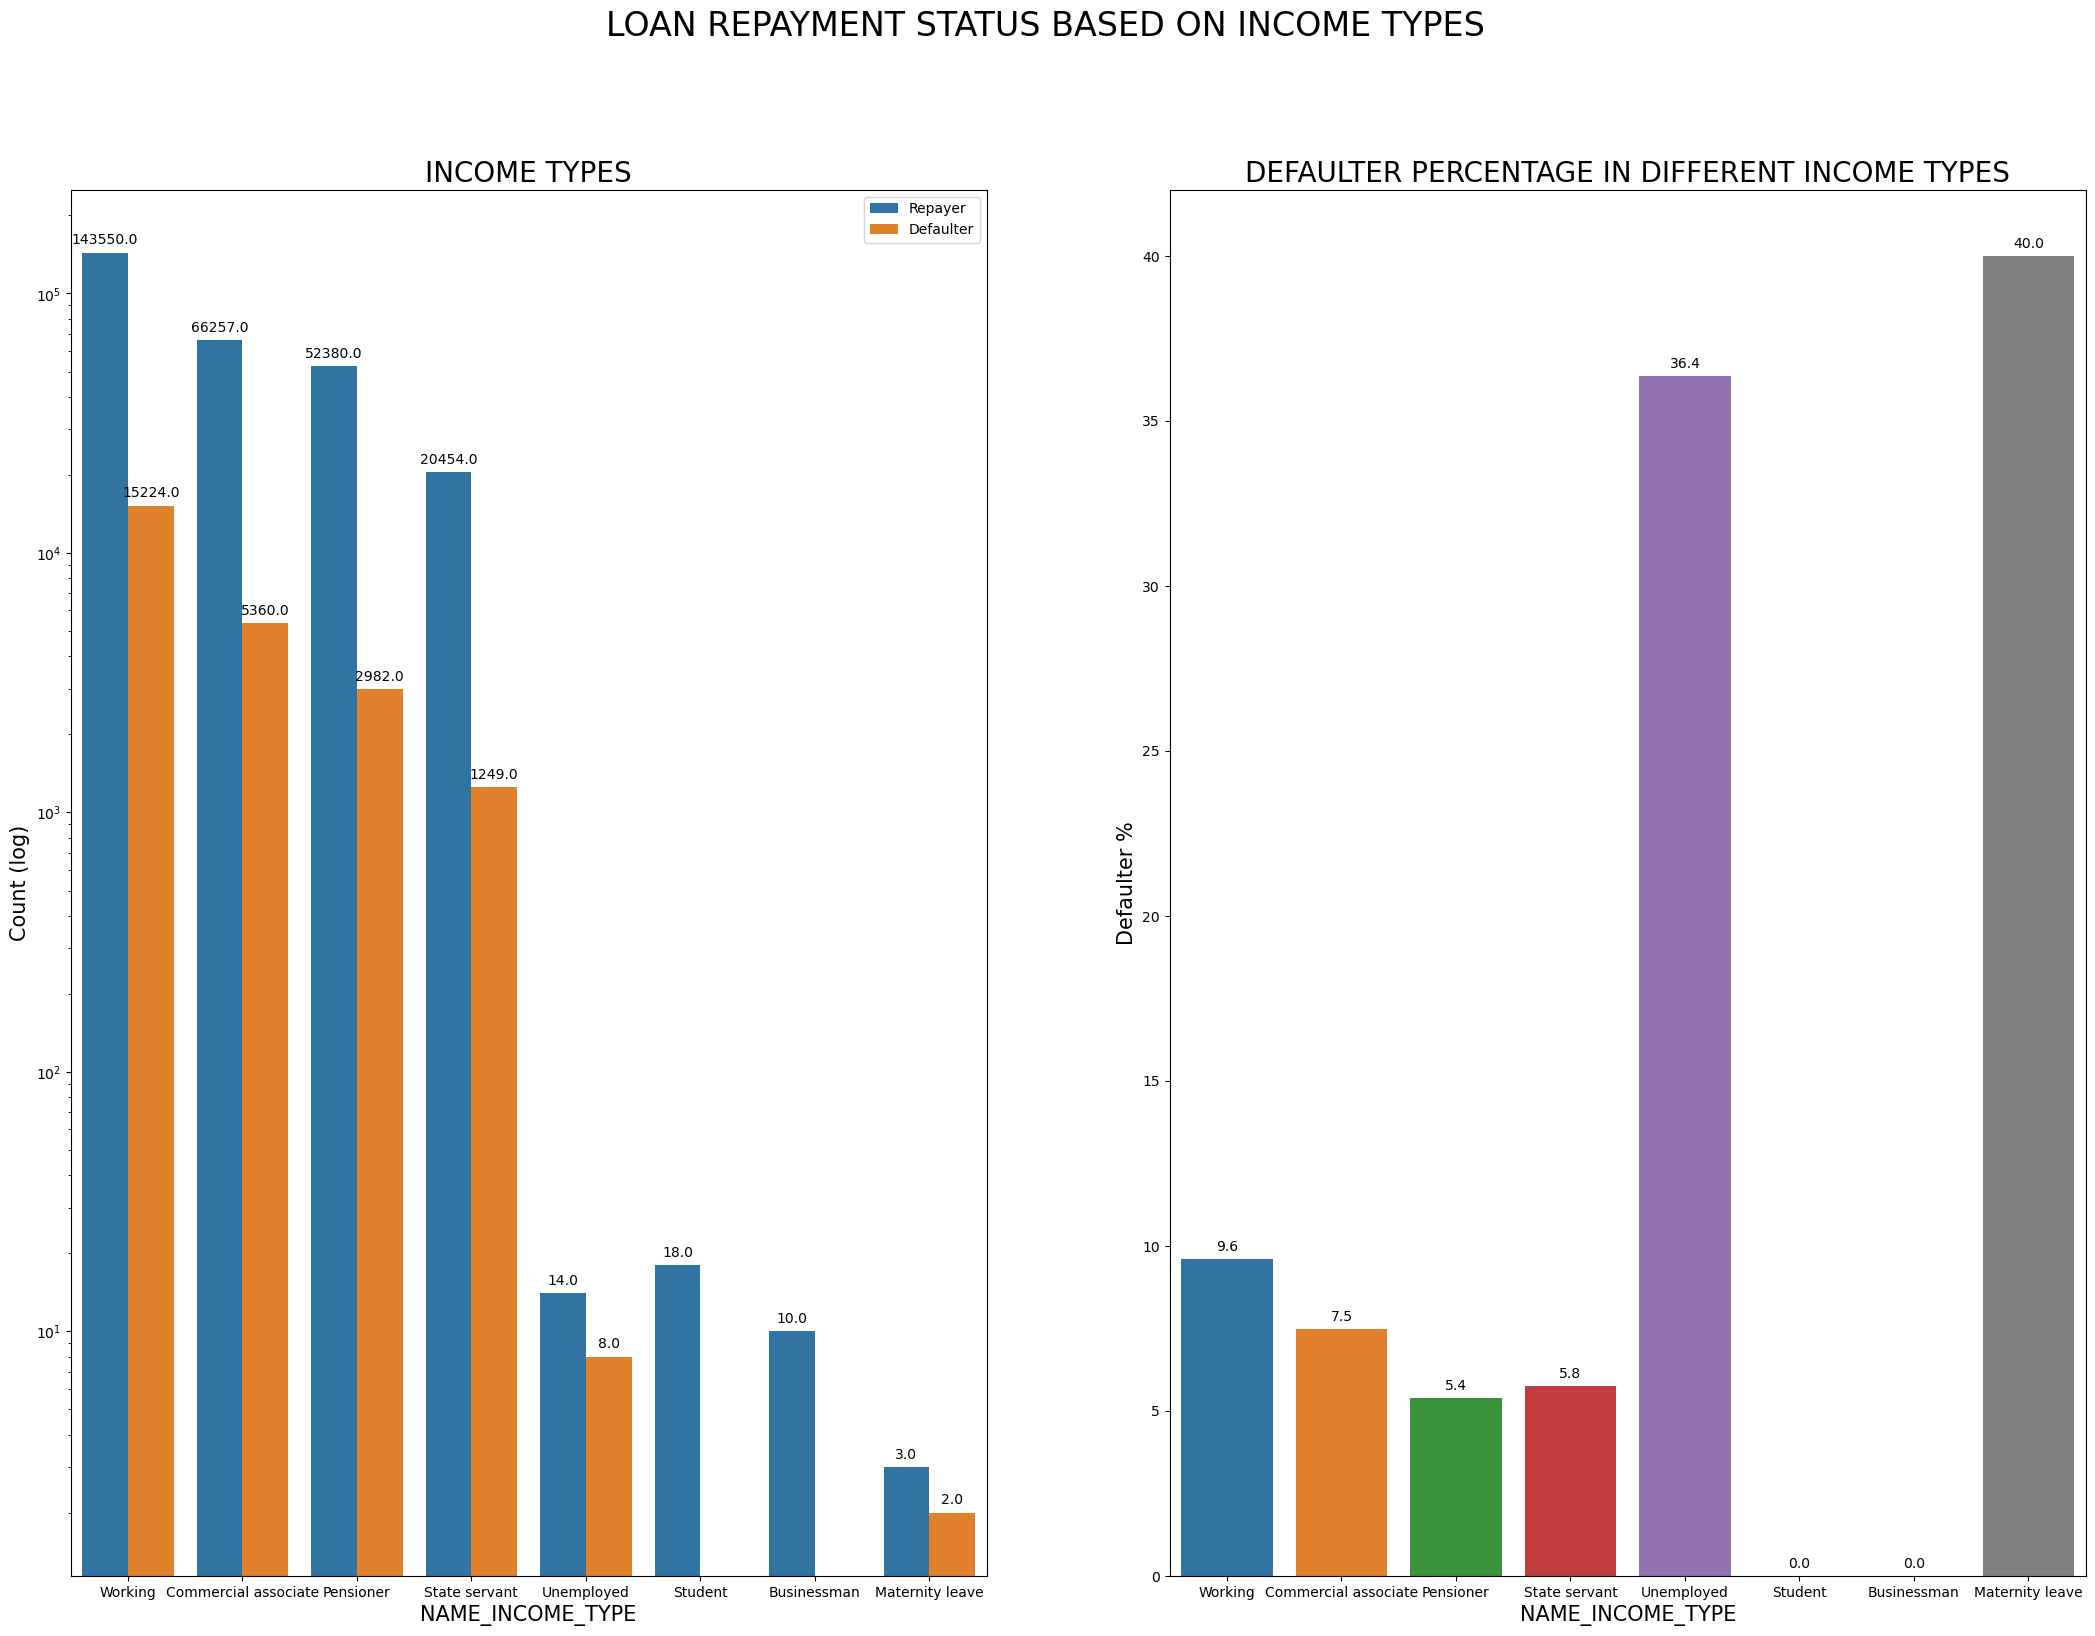

In [192]:
#Here I am going to analyz loan repayment status based on income types:
#I decided to take a closer look at income type as well. 
#This could provide additional insights into how an individual's financial situation impacts their ability to manage their loan obligations.
univariate_data(dataset= app_inp0df, 
                col = "NAME_INCOME_TYPE",
                target_col = "TARGET",
                ylog=True,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON INCOME TYPES',
                subplot1_title= 'INCOME TYPES',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT INCOME TYPES')


#### Insights:
- Majority of applicants for loans have income type of Working origin, followed by Commercial associate, Pensioner and State servant. With Maternity leave being last on the list.
- The applicants who are on Maternity leave have the highest default rate, default rate being staggering 40%, followed by Unemployed with 36.4%. Being the two riskiest groups to give loans. The rest under average  10%.
- Student and Businessmen even though are lesslikely to take loans, have no record of being a defaulters. Two of the safest categories for providing loans.

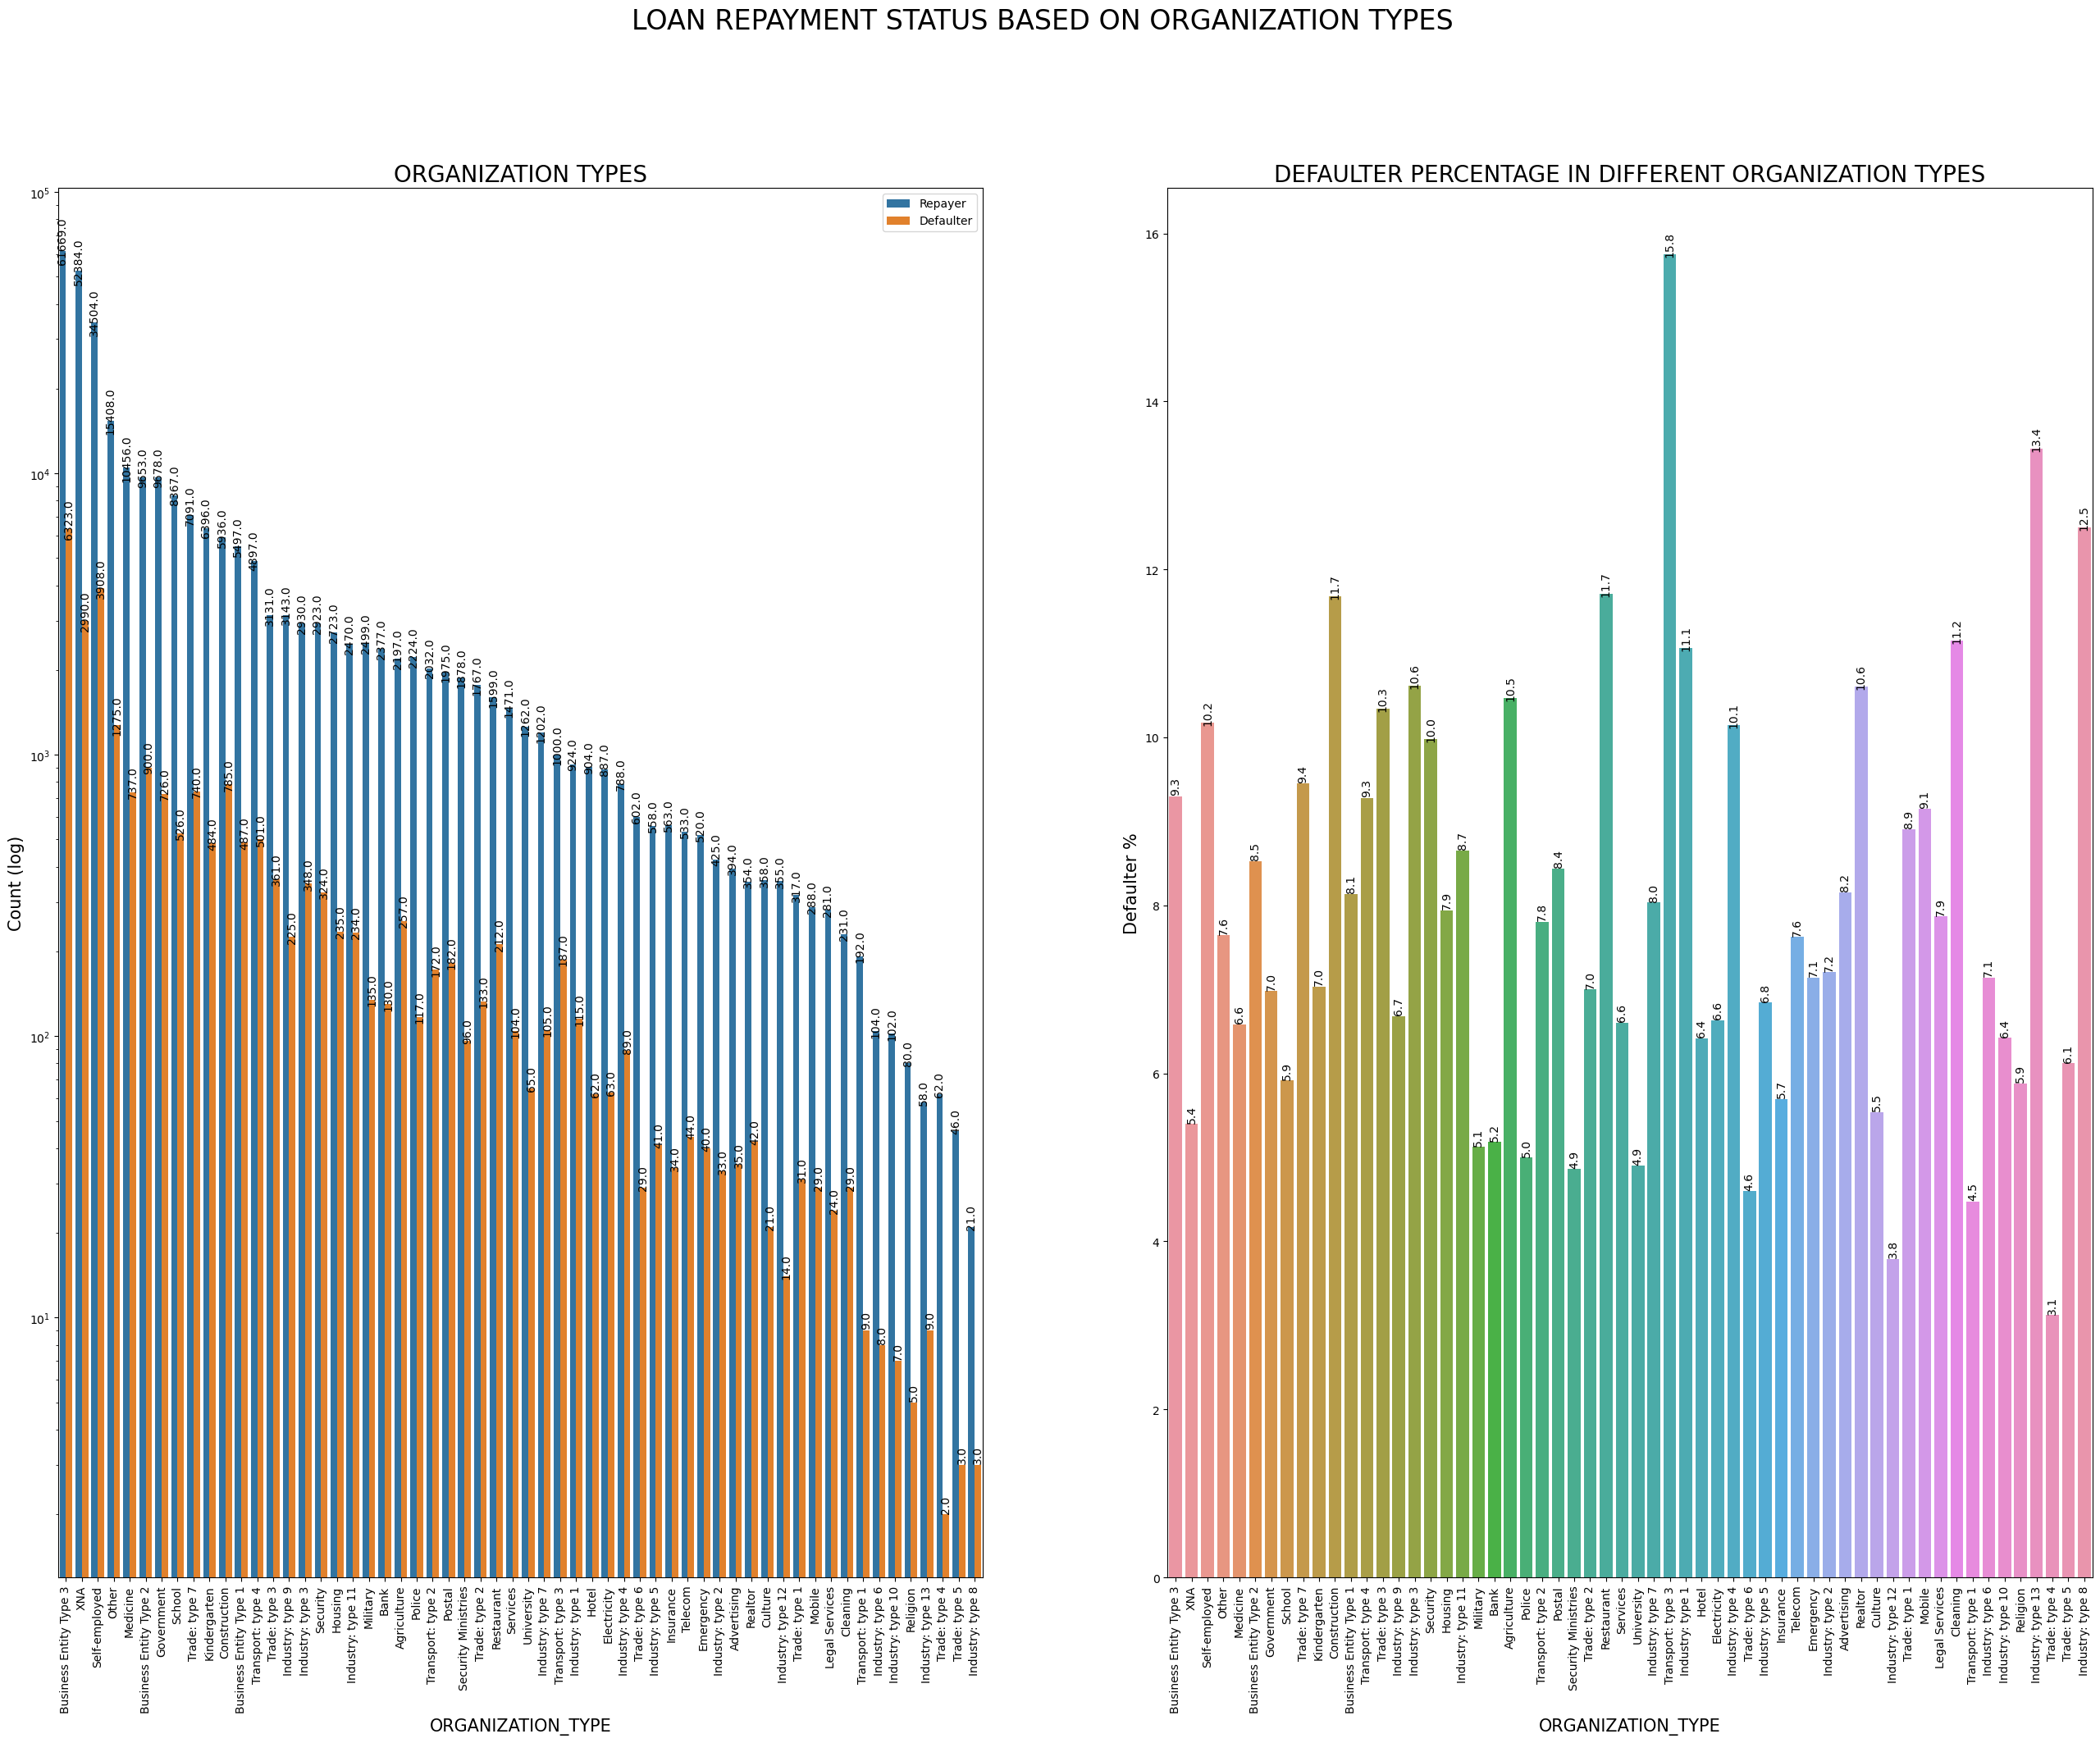

In [194]:
#I will be checking Loan repayment status based on Organization type:
#After analyzing the relationship between housing type and loan repayment status,
#it made sense to take a closer look at the impact of organization type as well. 
#This could uncover additional patterns and factors that influence an individual's ability to manage their loan obligations.
univariate_data(dataset= app_inp0df, col = "ORGANIZATION_TYPE",
                target_col = "TARGET",
                bar_label_angle=90,
                ylog=True,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON ORGANIZATION TYPES',
                subplot1_title= 'ORGANIZATION TYPES',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT ORGANIZATION TYPES',
                figsize=(32,22),x_label_angle = 90)


#### Insights:
- Most of the application for loan are from Business Entity Type 3.
- For a high number of applications, Organization type information is not available.
- Organizations with highest percent of defaulters are Transport: type 3 (15.8%), Industry: type 13 (13.4%), Industry: type 8 (12.5%) and Restaurant 11.7%.
- Self employed people have high defaulting rate with 10.2%. Provide loan with higher interest rate to mitigate the risk of defaulting can be one of the solution for this.
- It can be seen that Trade Type 4 and 5, Industry type 8 organization type has less numbers of defaulters. So it is safer for providing loans.

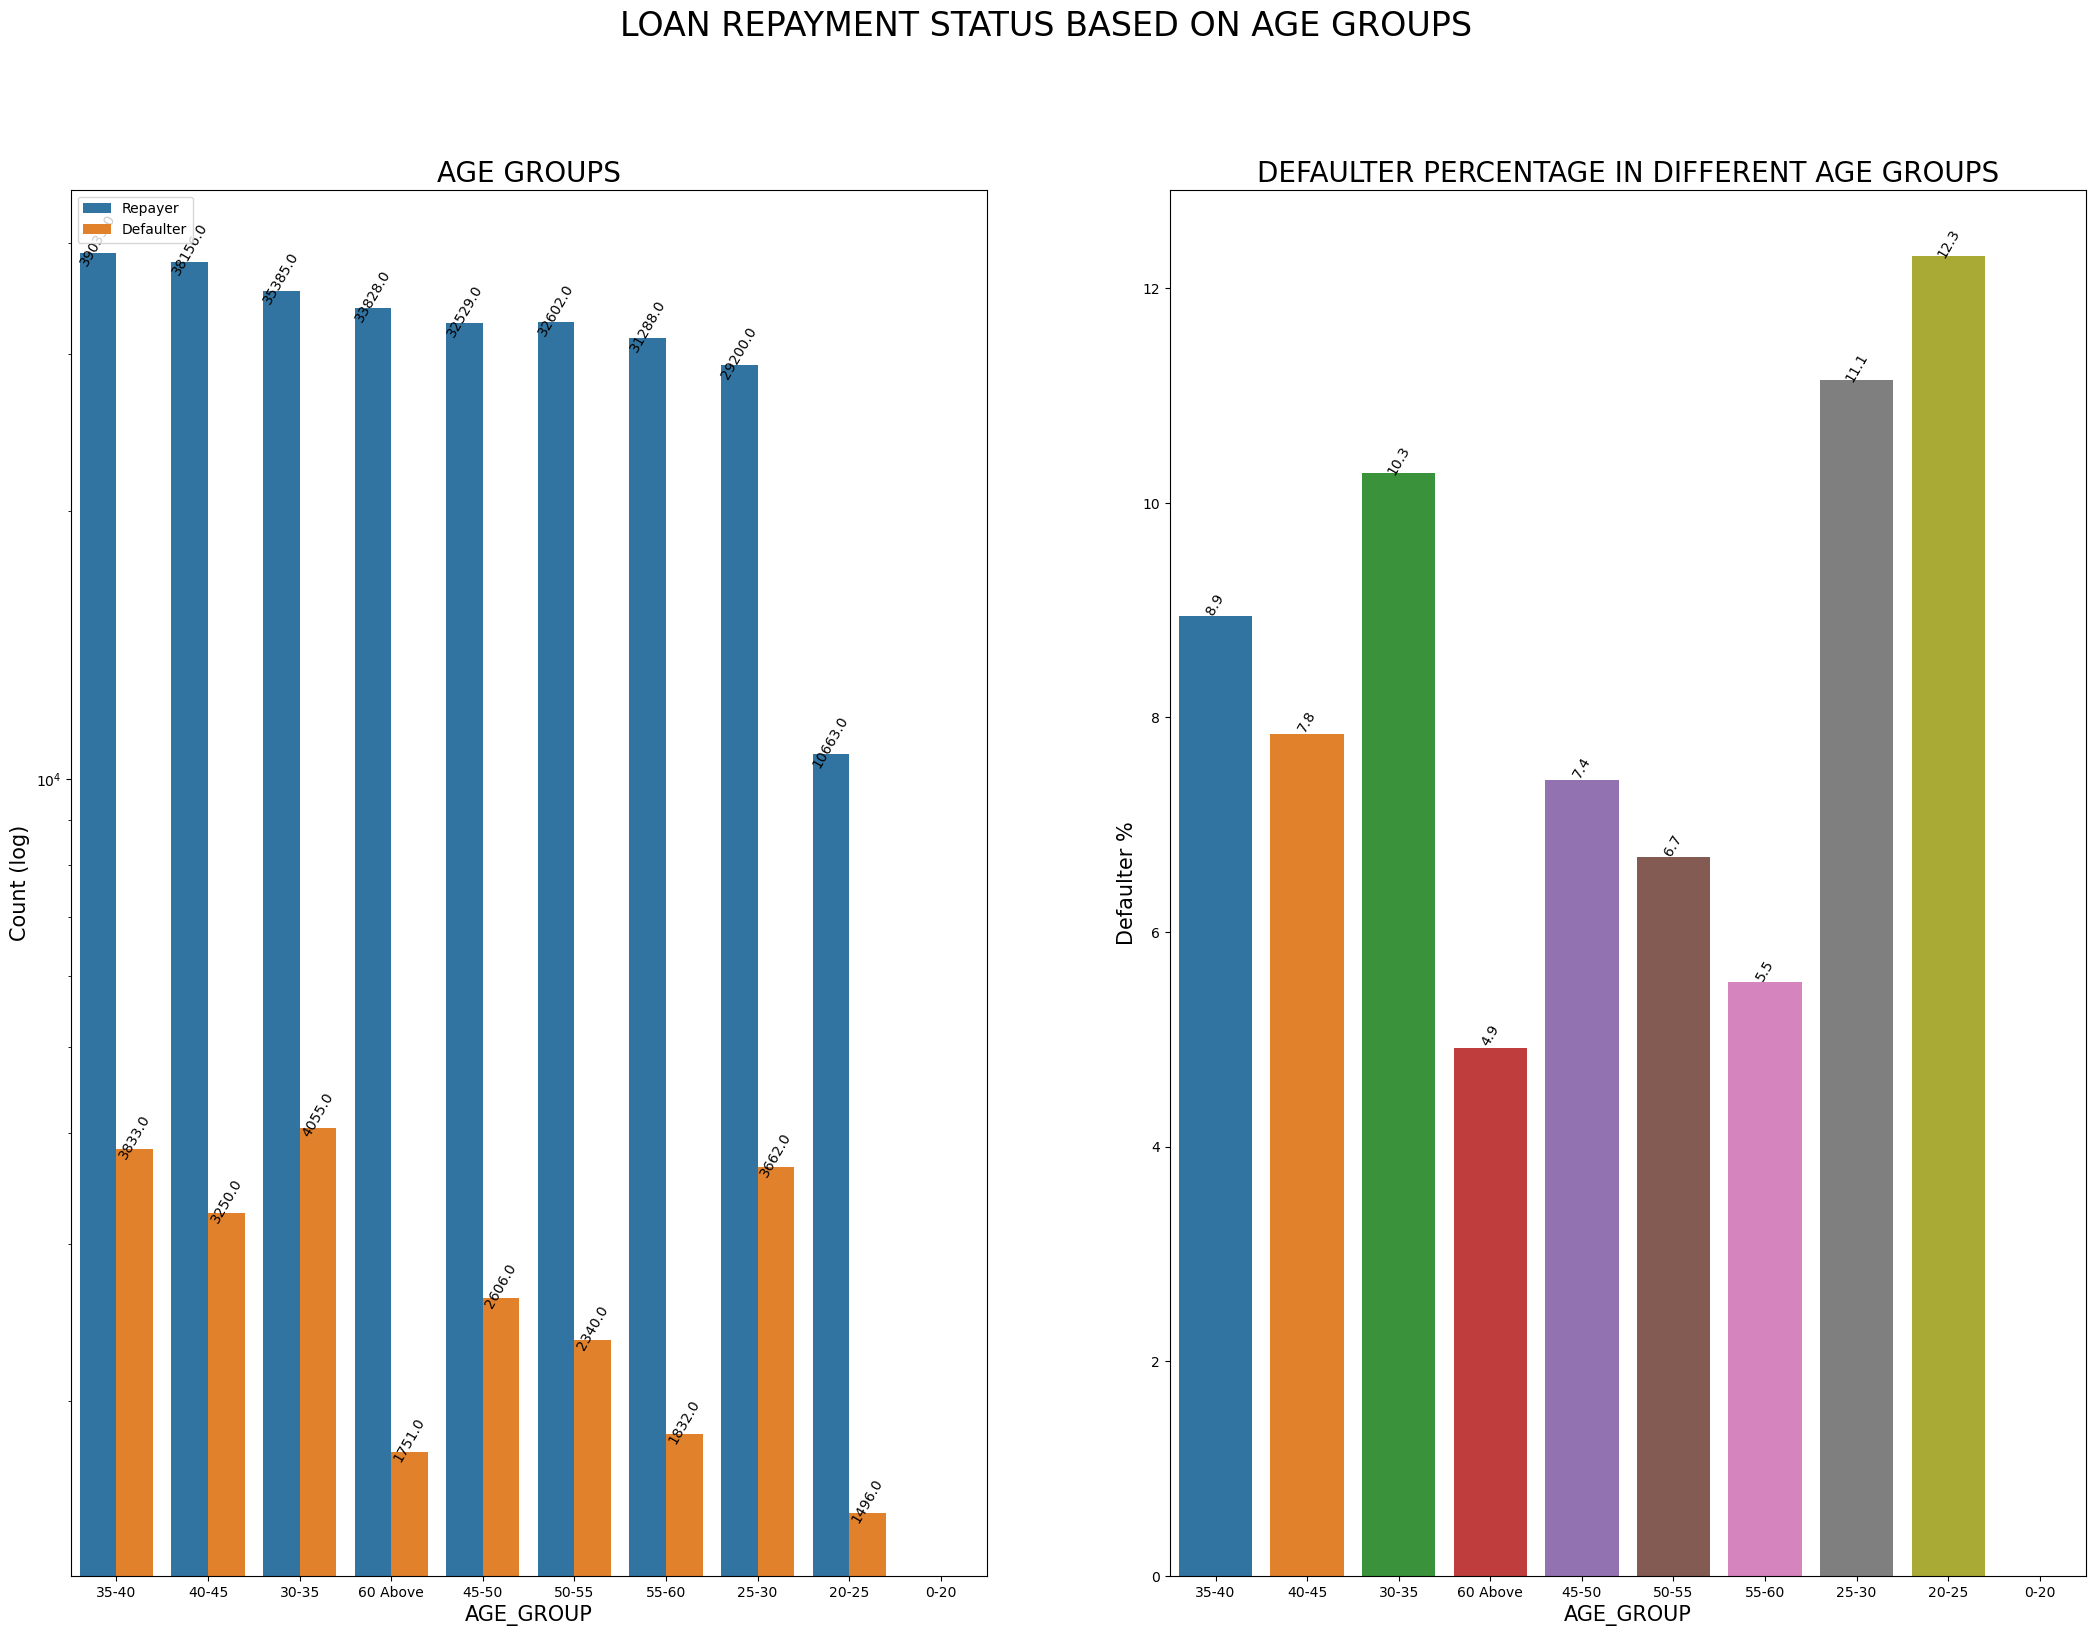

In [196]:
# Analyzing loan repayment status based on age groups
#The data shows that analyzing loan repayment status by age group can yield some interesting insights.
univariate_data(dataset= app_inp0df, 
                col = "AGE_GROUP",
                target_col = "TARGET",
                bar_label_angle=60,
                ylog=True,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON AGE GROUPS',
                subplot1_title= 'AGE GROUPS',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT AGE GROUPS')


#### Insights:
- Majority of the clients are in the age-group of 35-40, followed by the age-group of 40-45, and the minority being the age-group 20-25.(excluding age  group 0-20)

- With the least numbers of clients from age group 20-25, their default rate 12.3% being highest among other age-groups.Followed by the age-group of 25-30 with 11.1%. 20-25 age-group Being the riskiest one to give loans.

- The chances of being a defaulter is relatively low in the age-group of 60 Above with 4.9% default rate. Closely followed by the age-group of 55-60 with 5.5%.

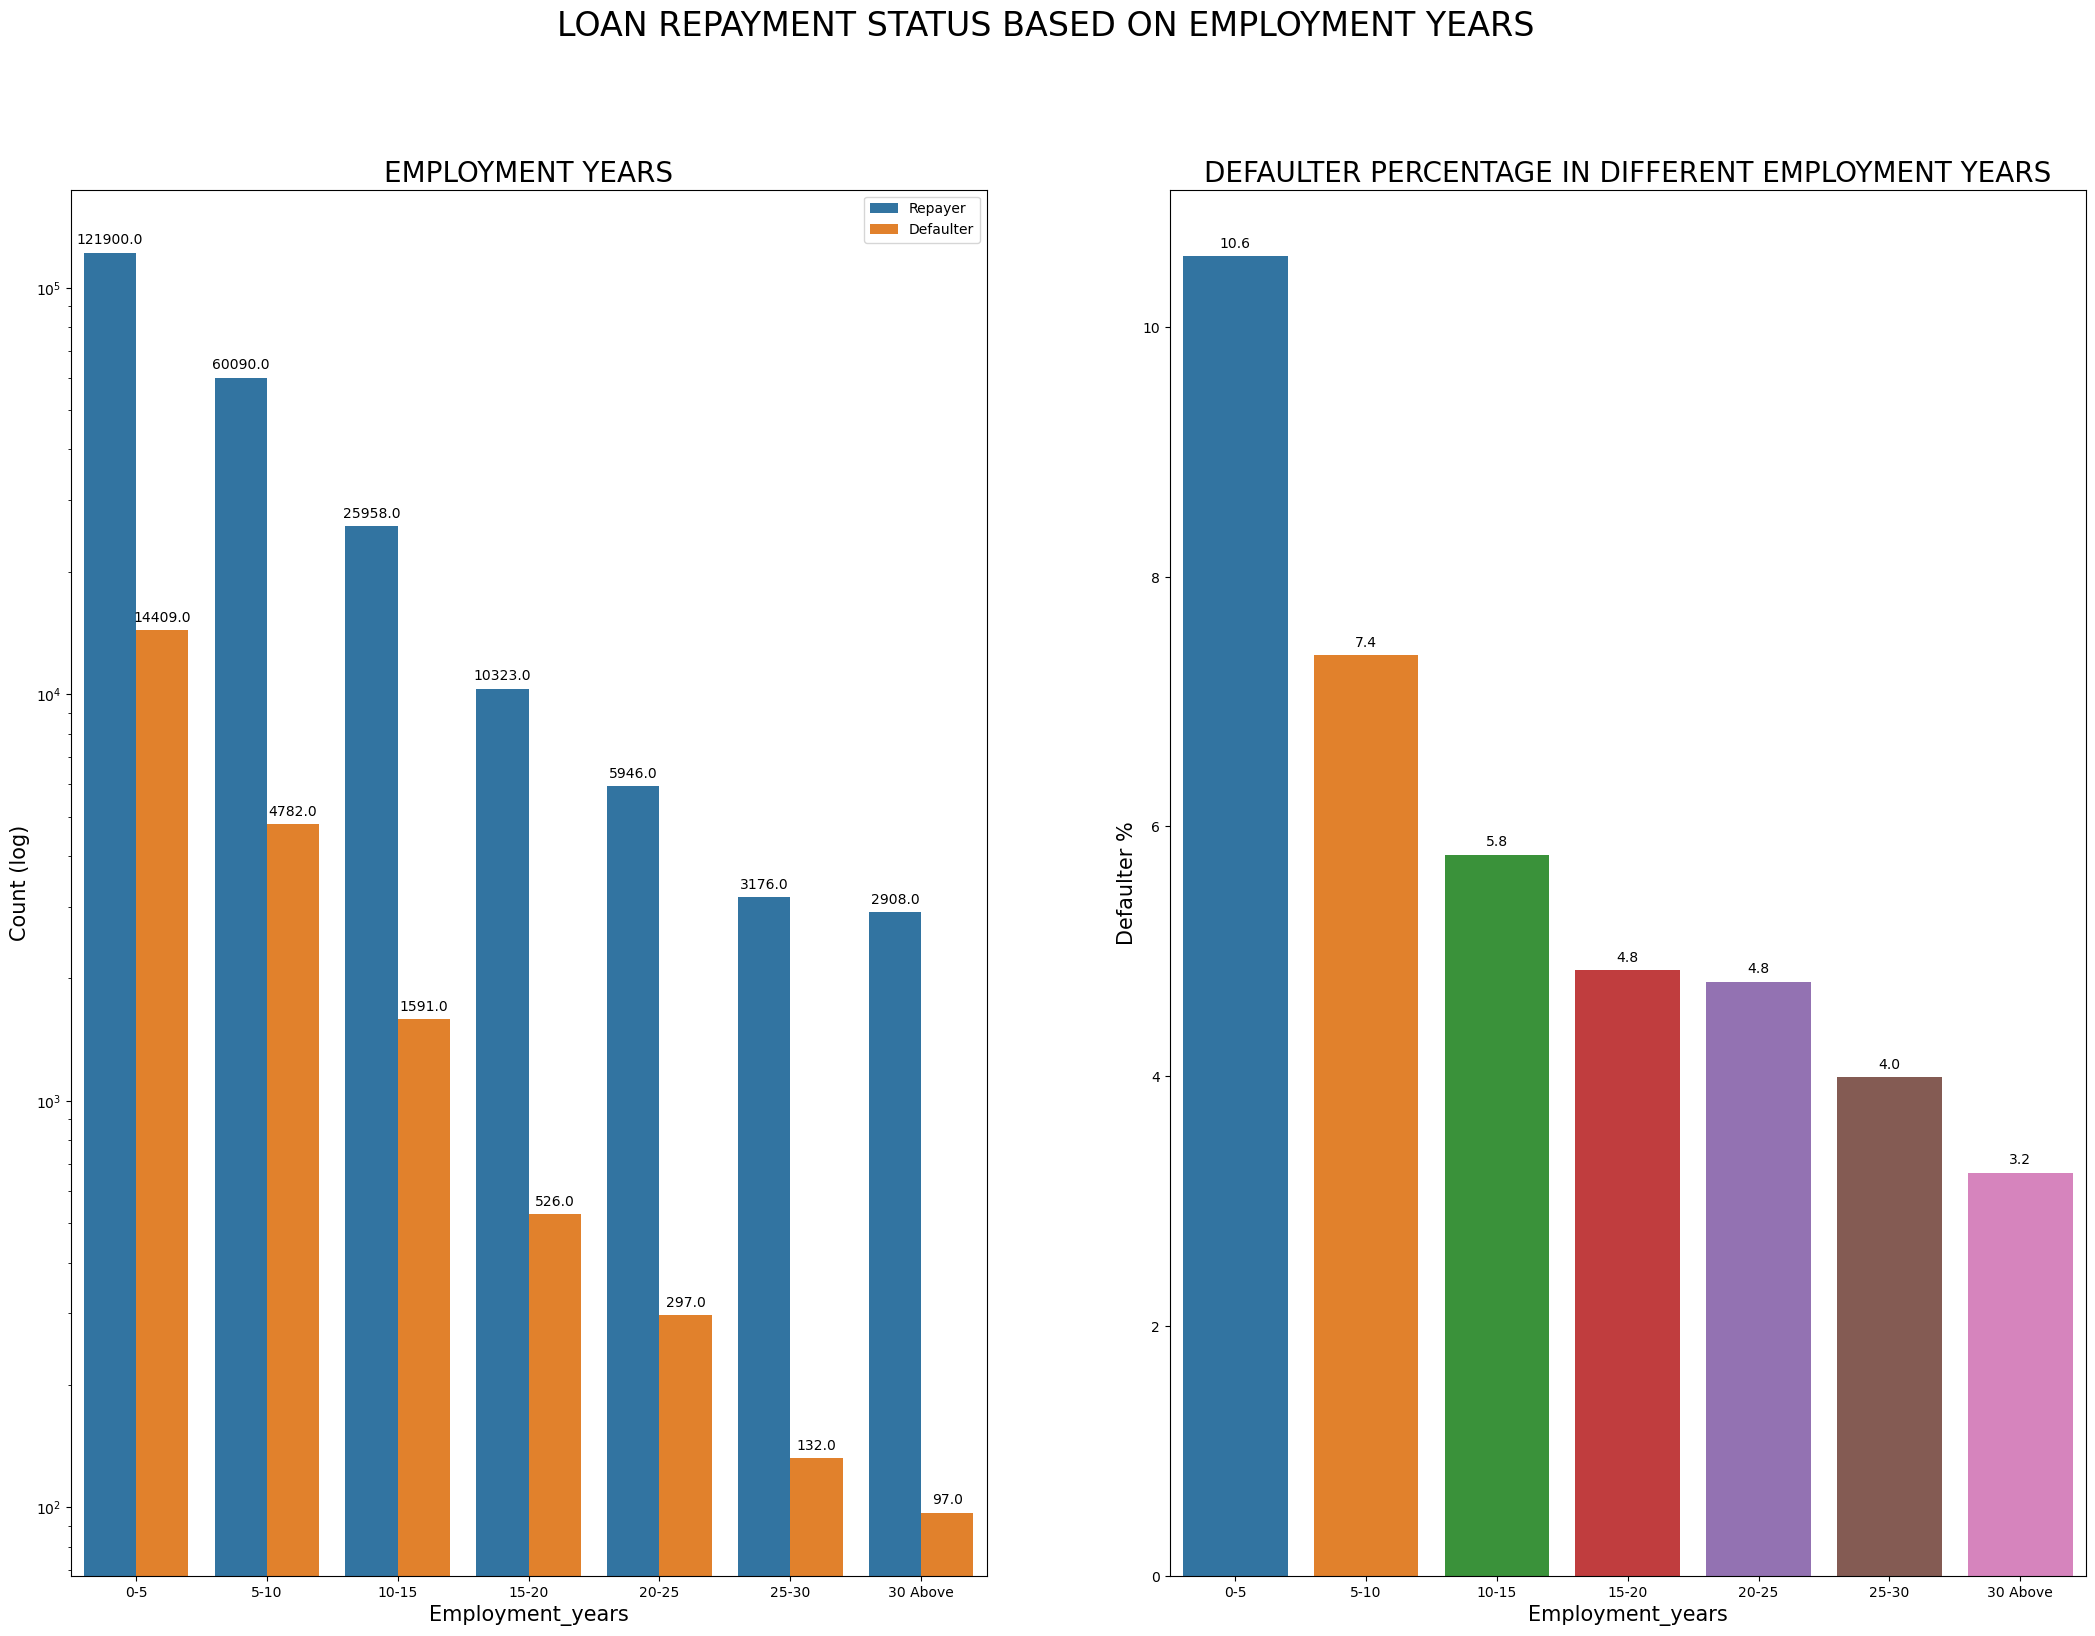

In [198]:
# Now I am analyzing loan repayment status based on Employment_Year :
#The Employment_Year data in relation to loan repayment status.
#This can provide some interesting insights into how an individual's stage in their career may impact their ability to manage their financial obligations.
univariate_data(dataset= app_inp0df, 
                col = "Employment_years",
                target_col = "TARGET",
                ylog=True,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON EMPLOYMENT YEARS',
                subplot1_title= 'EMPLOYMENT YEARS',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT EMPLOYMENT YEARS')


#### Insights:
- Highest numbers of applicants coming from a group with 0-5 years of experience. Followed by the group with 5-10 years of experinece, lowest applicants coming from 30 above experience group.

- The group with the highest applicants experience of 0-5 years, is also has highest default rate of 10.6%. We can decrease the default rate by tightening the eligibility criteria for applicants with 0-5 years of experience, requiring additional documentation or higher credit scores.

- 30 above experince with lowest default rate of 3.2%, also has the lowest number of applicants coming from. Relatively safest to give loans out to this group.

- With increase of years of experince, we can see the default rate going down slowly.

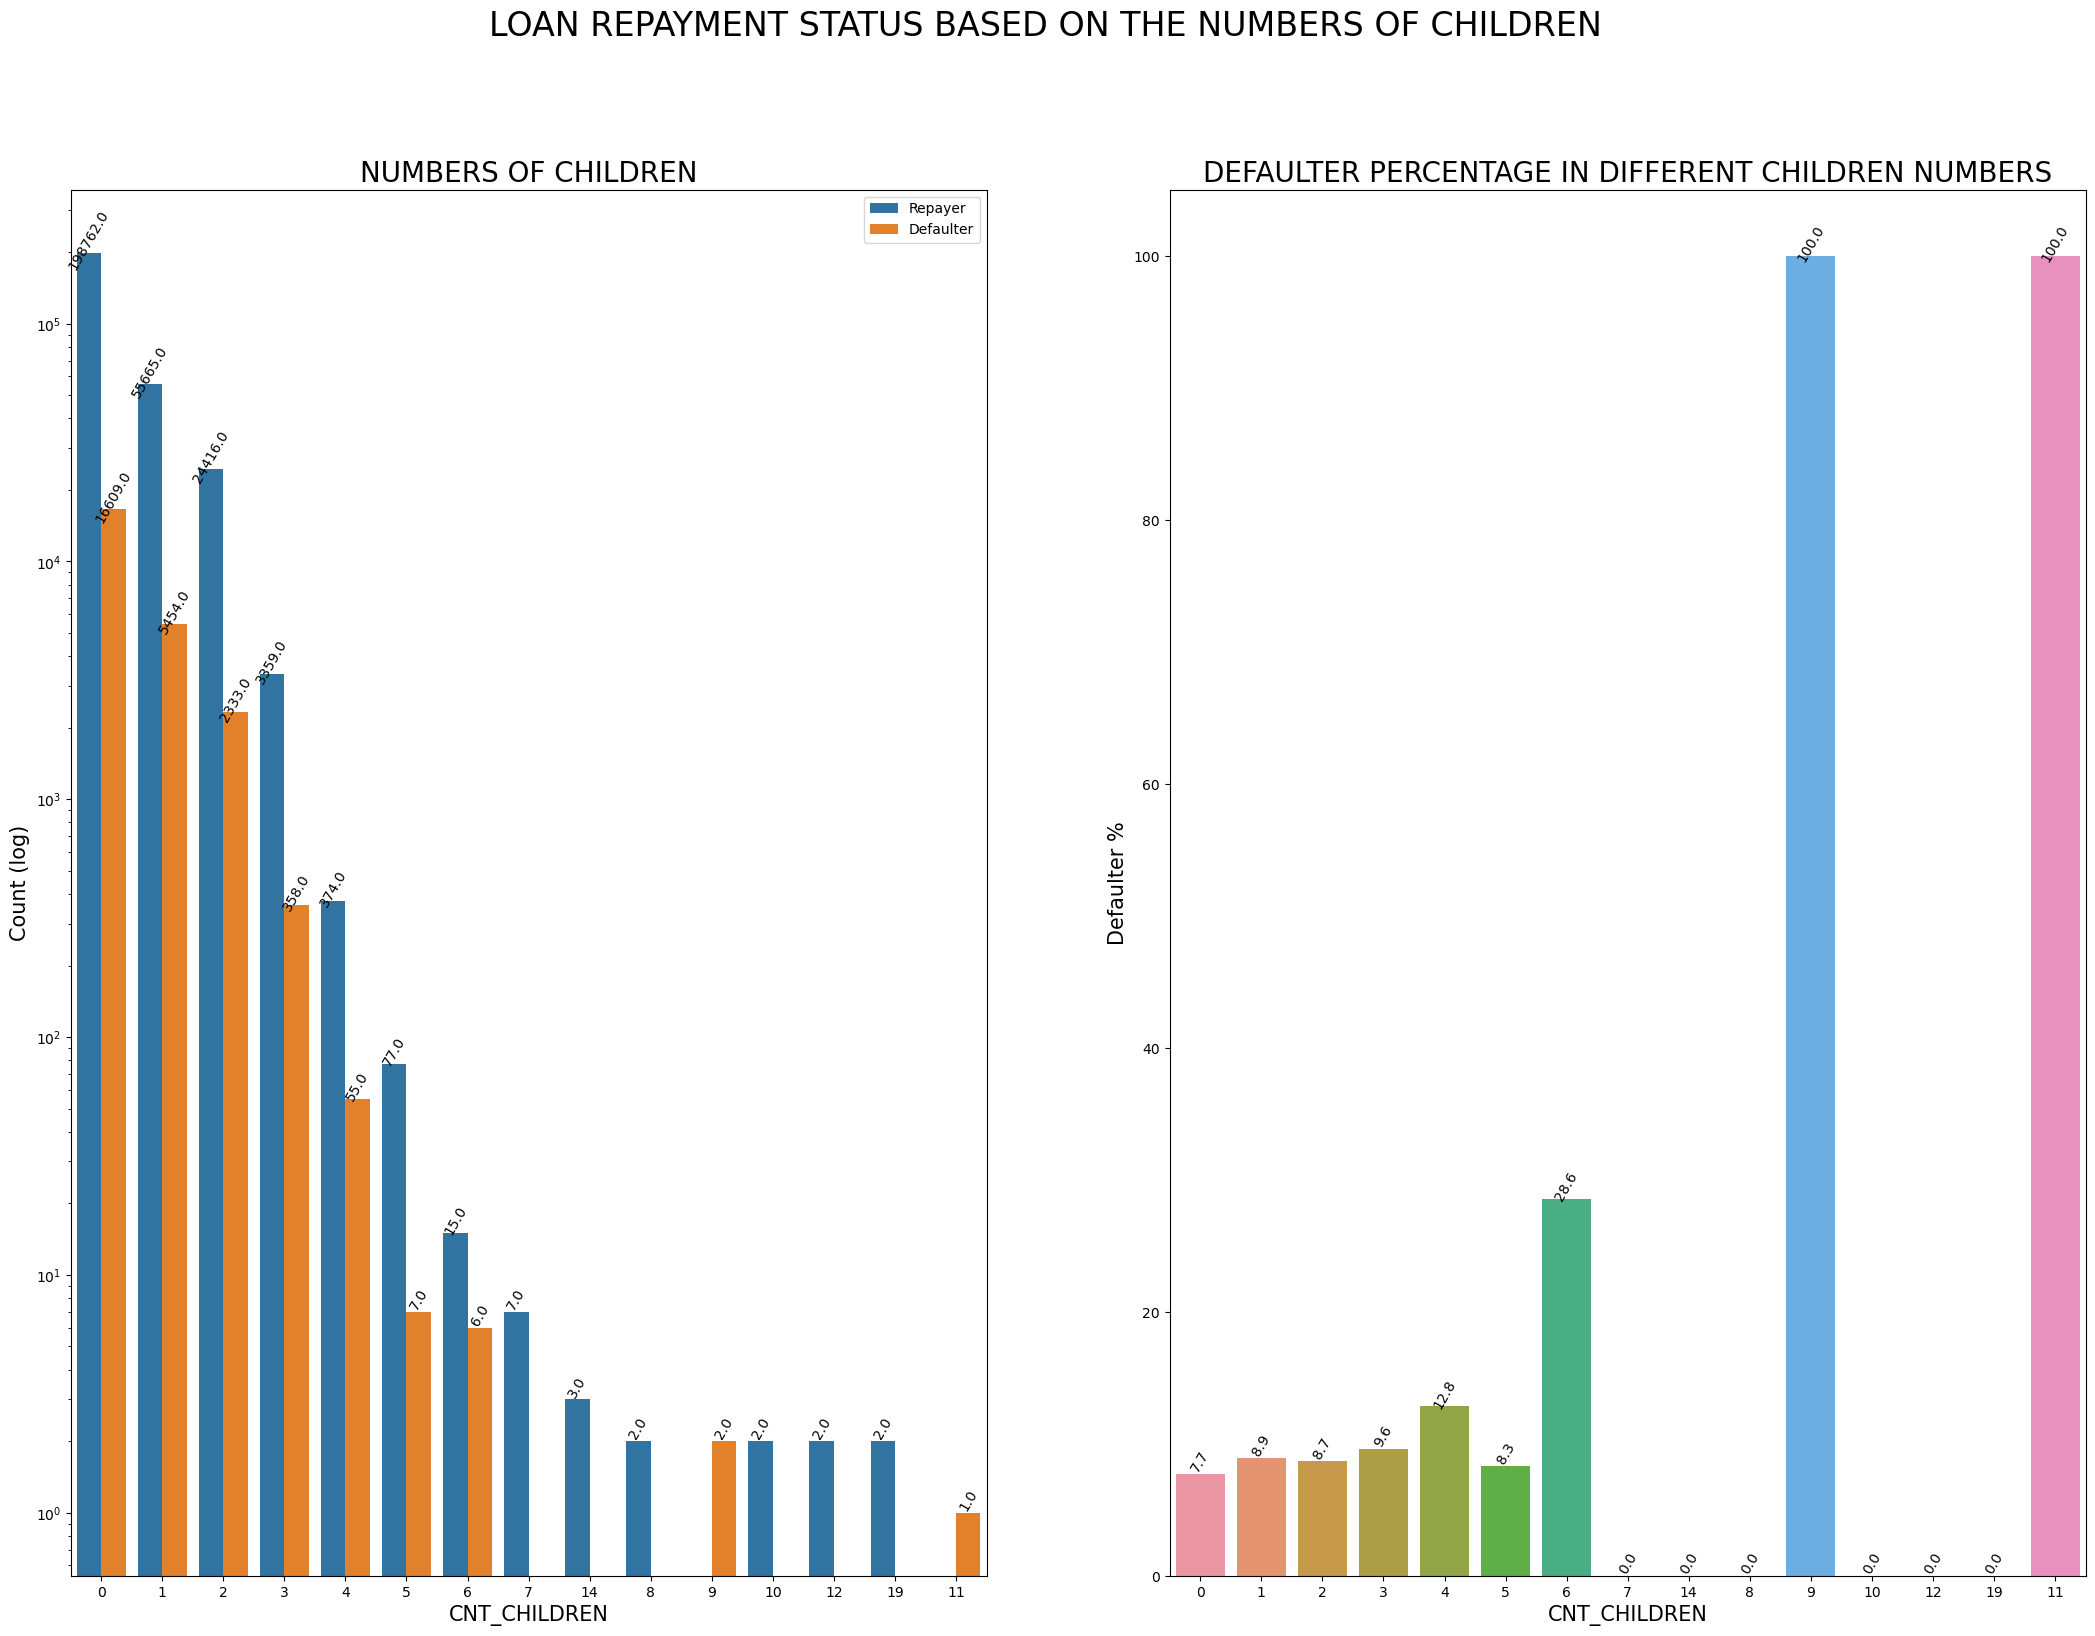

In [200]:
#Here I am going to Analyz loan repayment status based on the Number of children:
#I want to take a closer look at how the number of children an individual has may impact their loan repayment status. 
#This could be an important factor to consider, as the financial obligations and responsibilities of raising a family may create unique challenges when it comes to managing student debt and other loans.
univariate_data(dataset= app_inp0df, 
                col = "CNT_CHILDREN",
                target_col = "TARGET",
                ylog=True,
                bar_label_angle=60,
                plot_title= 'LOAN REPAYMENT STATUS BASED ON THE NUMBERS OF CHILDREN',
                subplot1_title= 'NUMBERS OF CHILDREN',
                subplot2_title='DEFAULTER PERCENTAGE IN DIFFERENT CHILDREN NUMBERS')


#### Insights:
- Most of the clients who had taken loans have no children.

- With lowest numbers of clients coming from people who has 11 children.

- People with 6 children have relatively high default rate of 28.6%. Where people who have 9 or 11 children have 100% default rate as per as the data is showing being the riskiest groups to give loans to. 

#### Numerical Univariate Analysis:

In [203]:
#listing all the column of app_inp0df
app_inp0df.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUR

In [204]:
# Here I am bisecting the app_inp0df dataframe based on Target value 0 and 1 for correlation and other analysis:
cols_for_cor = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Re_df = app_inp0df.loc[app_inp0df['TARGET']==0, cols_for_cor]

# Defaulters dataframe
De_df = app_inp0df.loc[app_inp0df['TARGET']==1, cols_for_cor]
     


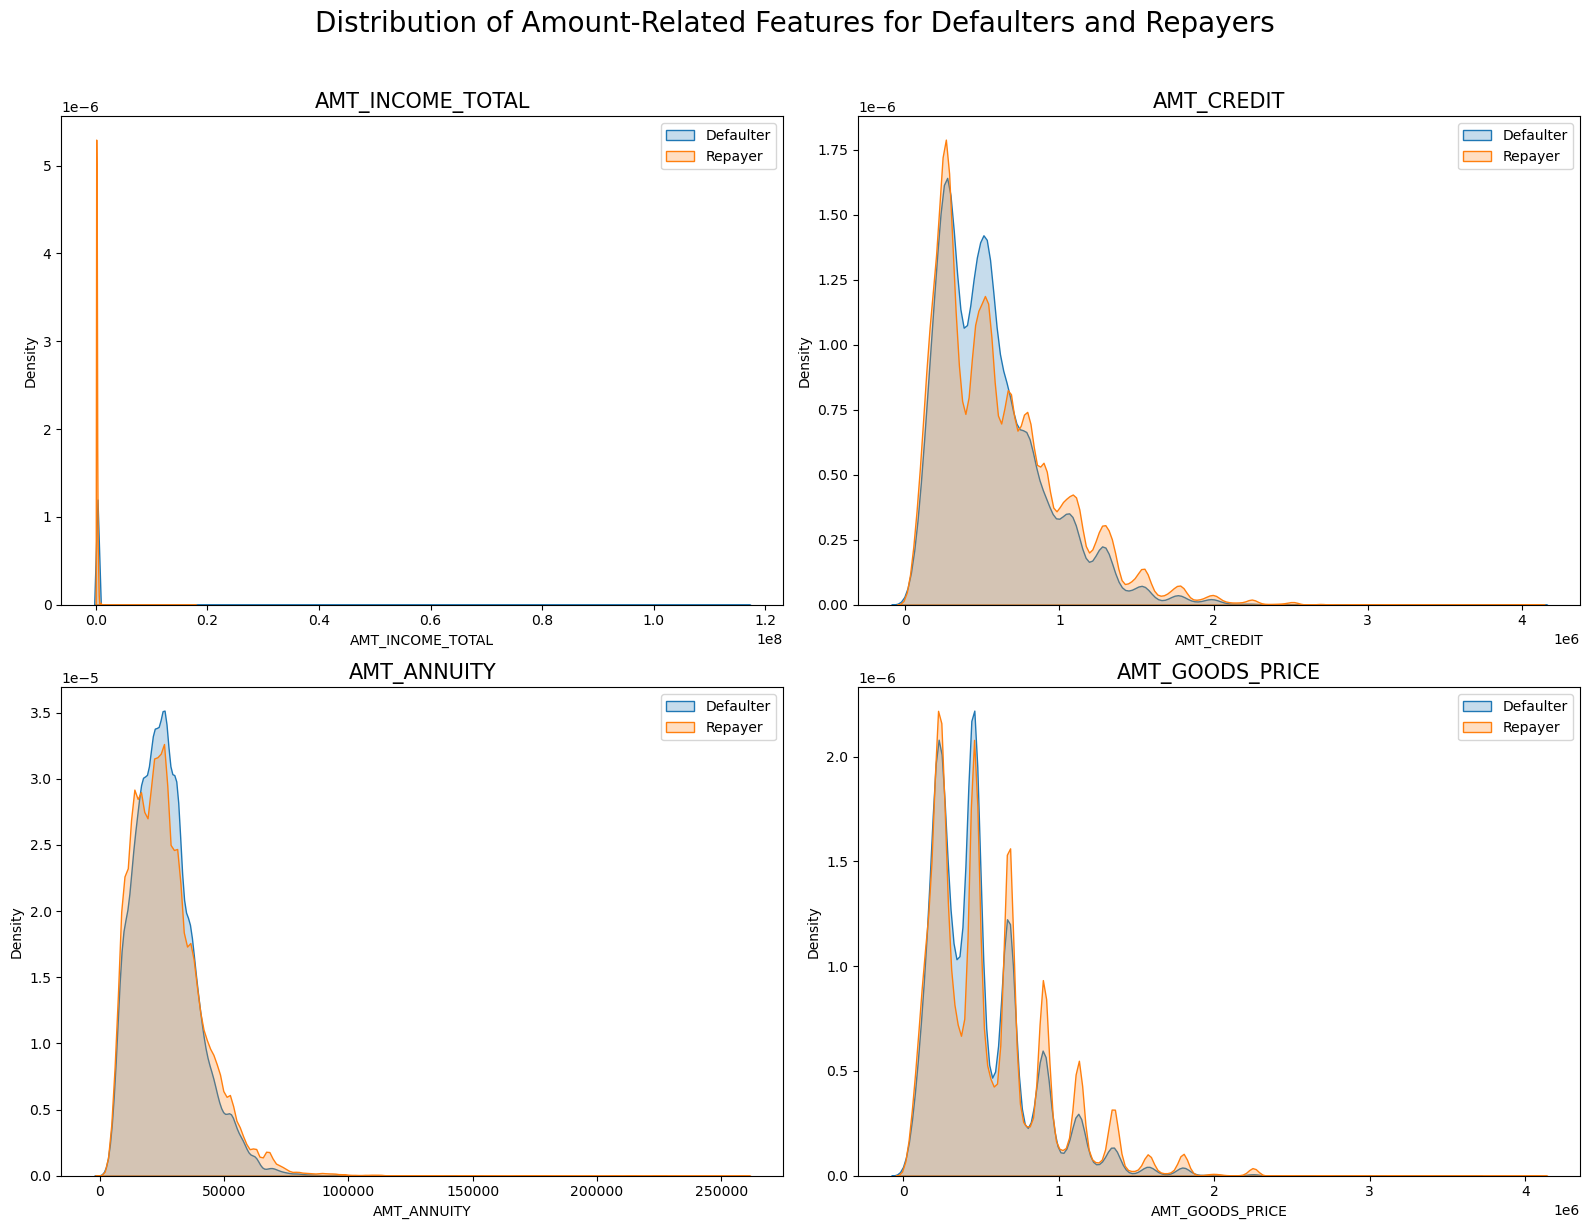

In [205]:
# Here I am plotting the numerical columns related to amount as distribution plot to see density
# Selecting the numerical columns related to amount
amount = app_inp0df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

# Creating a figure with a specific size
fig = plt.figure(figsize=(16, 12))

# Looping through each numerical column related to amount
for i, col in enumerate(amount):
    # Creating a subplot for each column
    plt.subplot(2, 2, i + 1)
    
    # Plotting the distribution plot for defaulters
    sns.kdeplot(De_df[col], label="Defaulter", shade=True)
    
    # Plotting the distribution plot for repayers
    sns.kdeplot(Re_df[col], label="Repayer", shade=True)
    
    # Setting the title for each subplot
    plt.title(col, fontdict={'fontsize': 15, 'fontweight': 5})
    
    # Adding legend to each subplot
    plt.legend()

# Adding a title to the entire figure
fig.suptitle('Distribution of Amount-Related Features for Defaulters and Repayers', fontsize=20, y=1.02)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()

#### Insights:
-  Both defaulters and repayers show a very high density near the lower end of the income scale. The distributions are almost identical and concentrated very close to zero.

-  Both distributions are right-skewed, with the highest density at the lower credit amounts and tapering off as the credit amount increases. There are subtle differences between defaulters and repayers, with repayers having a slightly higher density at lower credit amounts and defaulters having a slightly higher density in some of the mid-range credit amounts.

-  The distributions for AMT_ANNUITY are again right-skewed. Defaulters tend to have slightly higher densities at certain annuity amounts compared to repayers, especially in the range of 30,000 to 50,000.

-  The distributions for AMT_GOODS_PRICE are multi-modal, indicating several common price points. Defaulters and repayers have very similar distributions, though there are minor differences in density peaks at certain price points.

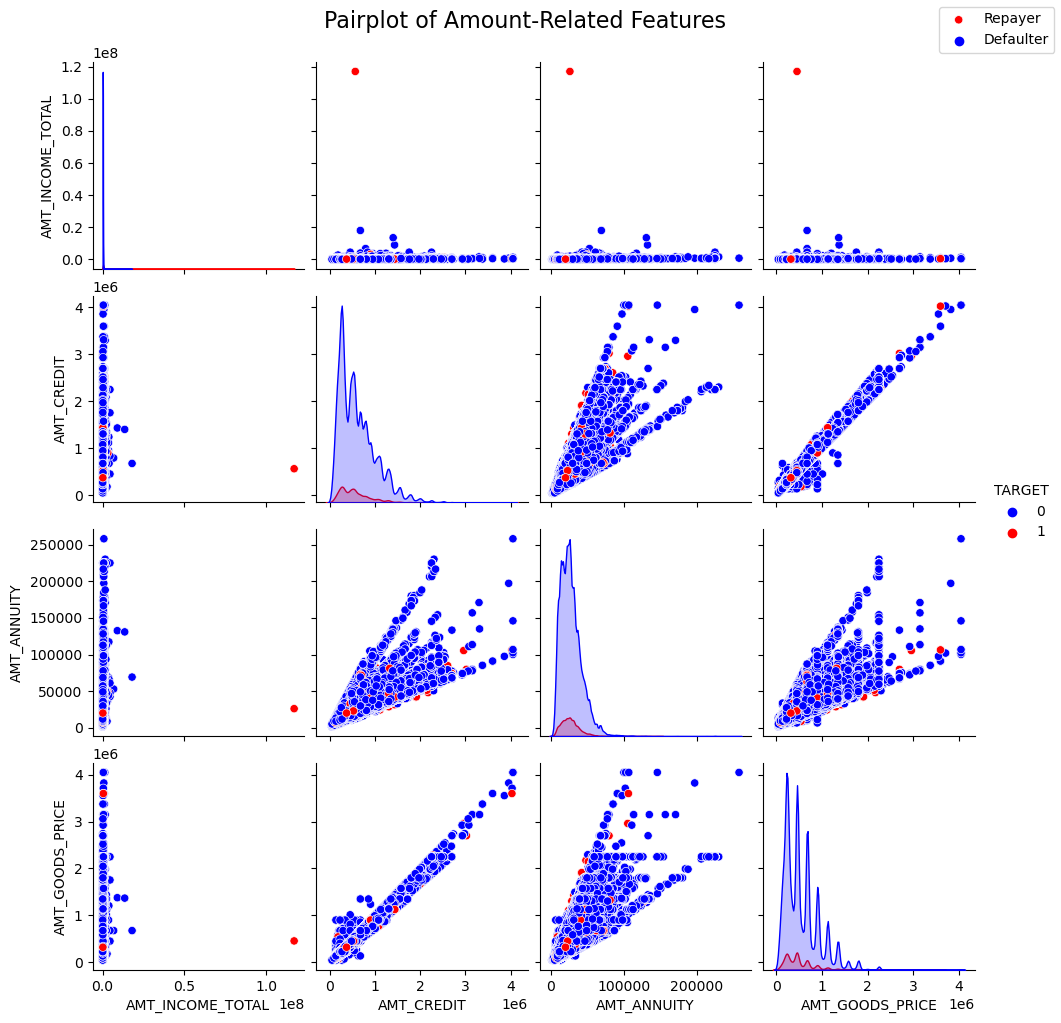

In [207]:
# Here I am  plotting pairplot between amount variable to draw reference against loan repayment status
# Select the relevant columns from the DataFrame and filter out rows with null values in 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'
amount = app_inp0df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

# Creating a pairplot to visualize the relationships between the numerical columns and compare them based on loan repayment status
ax = sns.pairplot(amount, hue="TARGET", palette=["b", "r"])

# Adding a title to the entire figure
ax.fig.suptitle('Pairplot of Amount-Related Features', fontsize=16, y=1.02)

# Modifying legend labels
ax.fig.legend(labels=['Repayer', 'Defaulter'])

# Displaying the plot
plt.show()


#### Insights:
- Here the graph shows if Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters.

- there are very less defaulters for AMT_CREDIT >20 Lakhs .

- Most data points for both defaulters and repayers are concentrated at lower income levels.


- Here I can see there are a few outliers with extremely high incomes, primarily among the repayers.

- There is a positive correlation between credit amount and other financial features: annuity, goods price.

- Columns Like AMT_CREDIT, AMT_ANNUITY shows a positive correlation with other features.

- Both defaulters and repayers show a similar spread, but defaulters seem to have slightly higher annuity values at the higher end of the spectrum.

- There is a strong positive correlation with AMT_CREDIT.

- The scatter plots suggest that there are linear relationships between some of these financial features:AMT_CREDIT vs. AMT_GOODS_PRICE.

#### Categorical Bivariate or Multivariate Analysis:

In [210]:
#I am using groupby here:
app_inp0df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count           mean            std       min  \
NAME_INCOME_TYPE                                                         
Businessman               10.0  652500.000000  627226.035812  180000.0   
Commercial associate   71617.0  202955.327289  147974.151536   26550.0   
Maternity leave            5.0  140400.000000  126856.907577   49500.0   
Pensioner              55362.0  136401.292273   76650.331247   25650.0   
State servant          21703.0  179737.969506  100880.579748   27000.0   
Student                   18.0  170500.000000  106644.682171   81000.0   
Unemployed                22.0  110536.363636   88055.079059   26550.0   
Working               158774.0  163169.889223  307577.685942   25650.0   

                           25%       50%       75%          max  
NAME_INCOME_TYPE                                                 
Businessman           225000.0  495000.0  843750.0    2250000.0  
Commercial associate  135000.0  180000.0  225000.0   18000090.0  
Maternity leave        67500.0   90000.0  135000.0     360000.0  
Pensioner              90000.0  117000.0  166500.0    2250000.0  
State servant         112500.0  157500.0  225000.0    3150000.0  
Student               112500.0  157500.0  178875.0     562500.0  
Unemployed             54000.0   78750.0  135000.0     337500.0  
Working               112500.0  135000.0  202500.0  117000000.0

#### Bivariate Analysis:

bivariate categorical analysis

In [213]:
# The function I am creating for plotting repetitive bar plots in bivariate categorical analysis:
def bivariate_categorical(x, y, df, hue, figsize=(10, 6), labels=None, title=None):
    
    # Set the figure size for the plot
    plt.figure(figsize=figsize)
    
    # Create a bar plot using seaborn
    barplot = sns.barplot(x=x, y=y, data=df, hue=hue)
    
    # Set the x-axis label with specified fontsize
    plt.xlabel(x, fontsize=15)
    
    # Set the y-axis label with specified fontsize
    plt.ylabel(y, fontsize=15)
    
    # Set the title of the plot with specified fontsize, if provided
    if title:
        plt.title(title, fontsize=20)
    else:
        plt.title(f"{y} vs {x} by {hue}", fontsize=20)  # Default title includes all relevant columns
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Customize the legend with provided labels if they exist
    if labels:
        # Retrieve the handles and labels of the current legend
        handles, _ = barplot.get_legend_handles_labels()
        # Update the legend with custom labels
        barplot.legend(handles=handles, labels=labels, title=hue)
    else:
        # If no custom labels are provided, use the default legend
        barplot.legend(title=hue)
    
    # Display the plot
    plt.show()

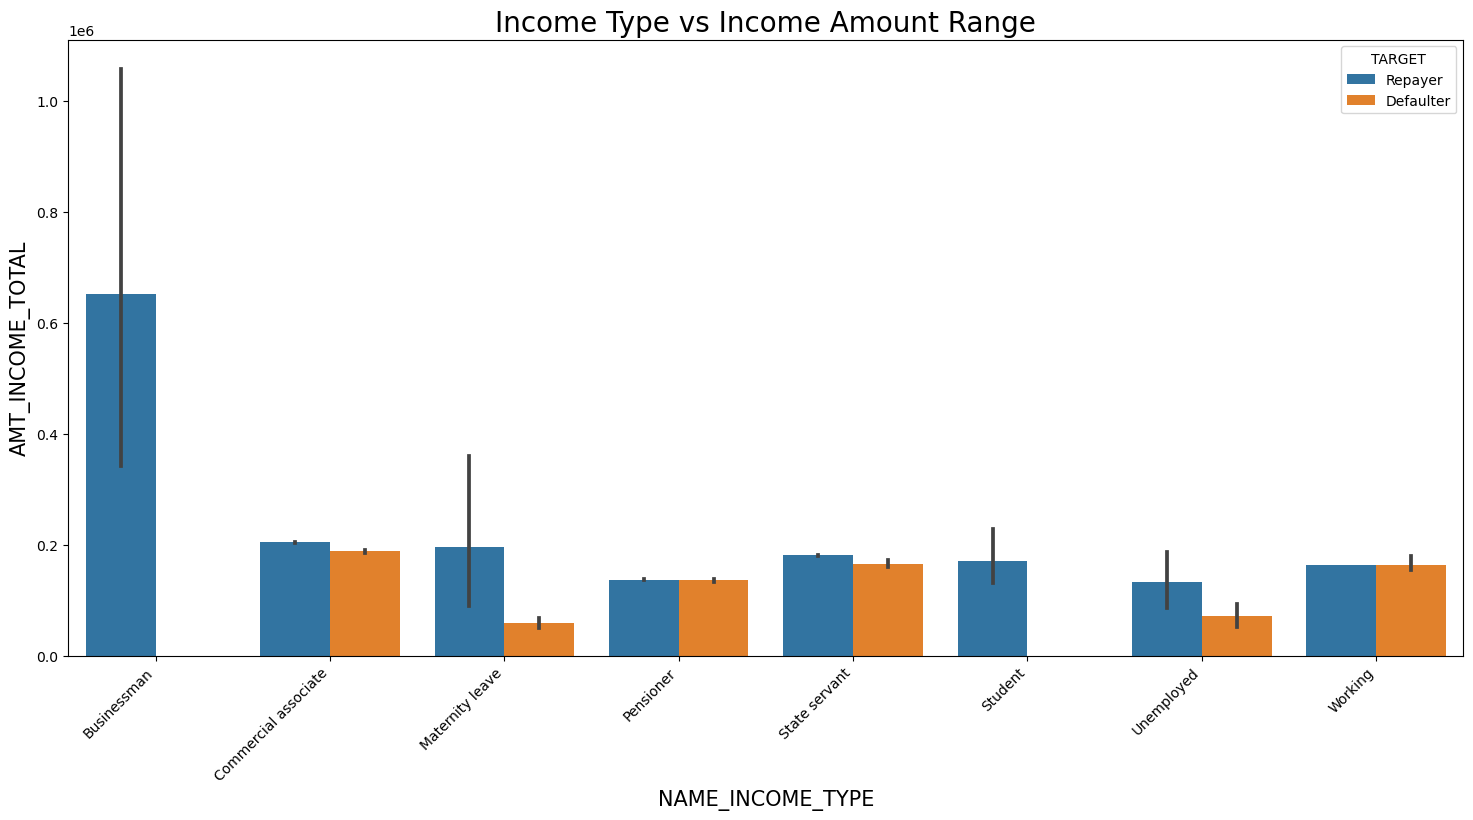

In [214]:
#I am going to analyz Income type vs Income Amount Range on a Seaborn Barplot:
bivariate_categorical("NAME_INCOME_TYPE", "AMT_INCOME_TOTAL", app_inp0df, "TARGET", (18, 8), ['Repayer', 'Defaulter'], title="Income Type vs Income Amount Range")

#### Insights:
- data shows that Businessman income is the highest. Despite having a high income, the error bars indicate a significant variation, which might suggest that the default rate among businessmen could be due to inconsistent income levels or other factors not captured by income alone.

- Commercial Associate this group has a lower average income compared to Businessmen but higher than many other categories. The default rate is lower than that of Businessmen, suggesting a more stable income profile or better financial management.

- Unemployed individuals have one of the lowest average incomes. As expected, the default rate is high, reflecting the financial instability associated with unemployment.

- On side note individuals on maternity leave have a significantly lower average income. But, the default rate is high, possibly due to reduced income during the leave period, leading to financial strain.

- On other hand, State servants have a moderate average income with a low default rate. This suggests that state servants, likely due to job security and stable income, have a lower risk of defaulting on loans.

Bivariate Numerical Analysis:

In [217]:
# The function I am creating for plotting repetitive relational plots in bivariate numerical analysis:
def bivariate_numerical(x, y, df, hue, kind, labels, title=None):

    # Create a relational plot using seaborn
    relplot = sns.relplot(x=x, y=y, data=df, hue=hue, kind=kind, height=15, aspect=1)
    
    # Rotate x-axis labels for better readability
    relplot.set_xticklabels(rotation=45, ha='right')
    
    # Customize the legend manually
    plt.legend(title=hue, labels=labels, loc='best')
    
    # Set the title of the plot with specified fontsize, if provided
    if title:
        plt.title(title, fontsize=20)
    else:
        plt.title(f"{y} vs {x} by {hue}", fontsize=20)  # Default title includes all relevant columns
    
    # Display the plot
    plt.show()

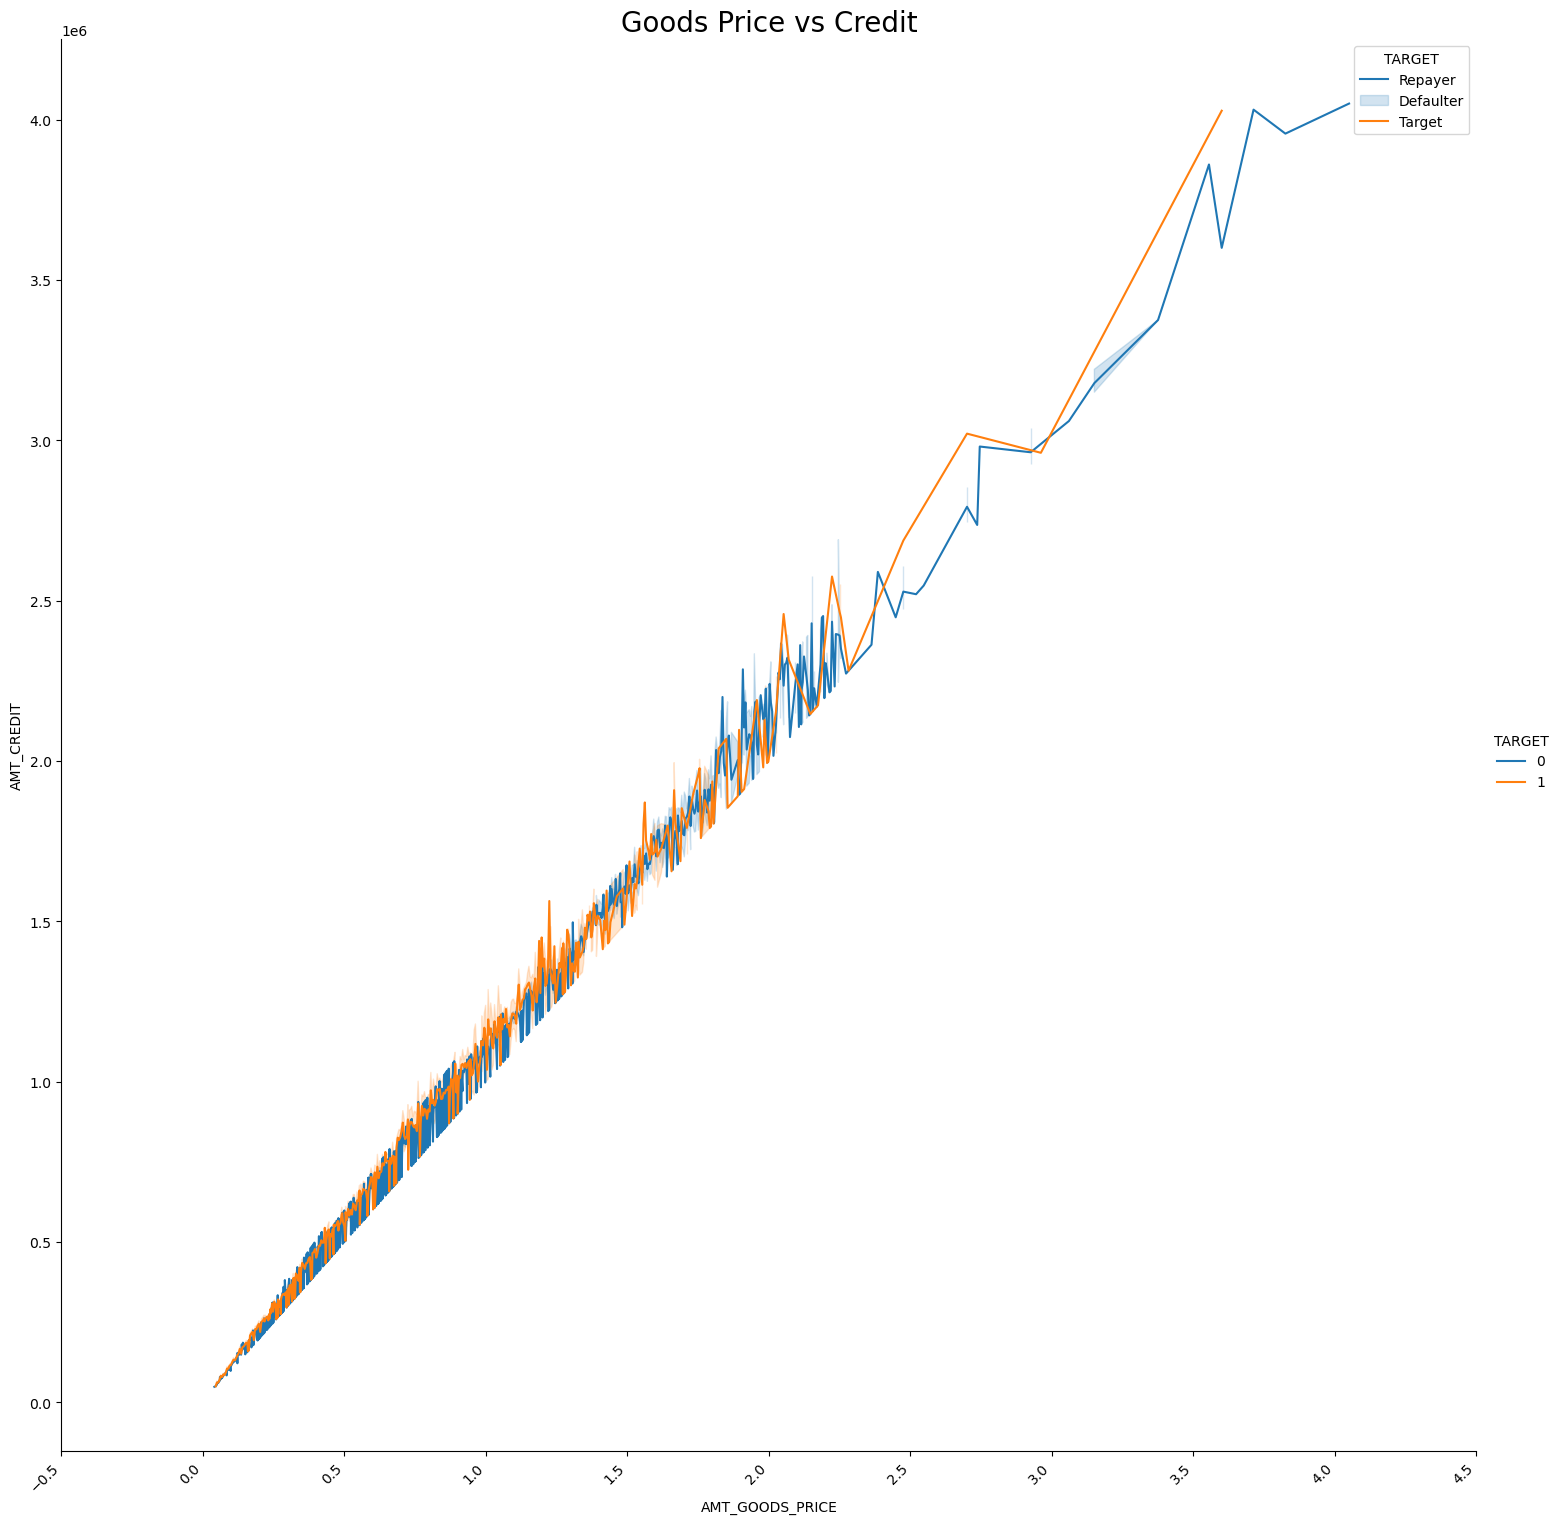

In [218]:
# Here I am checking the relationship between 'AMT_GOODS_PRICE' and 'AMT_CREDIT' and comparing with loan repayment status:
bivariate_numerical('AMT_GOODS_PRICE', 'AMT_CREDIT', app_inp0df, "TARGET", "line", ['Repayer', 'Defaulter','Target'], title="Goods Price vs Credit")



#### Insights:
- When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters numbers.

- The plot shows a linear relationship between AMT_GOODS_PRICE and AMT_CREDIT. As the price of goods increases, the amount of credit also increases proportionally. This is consistent for both repayers and defaulters.

#### Numeric Variables Analysis:

#### Correlation between numeric variable:

In [222]:
# Getting  top 10 correlation for the Repayers dataframe
numeric_cols = Re_df.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix using only numeric columns
corr_repayer = Re_df[numeric_cols].corr()

# Unstack, reset index and filter top 10 correlations
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape), k=1).astype(bool)).unstack().reset_index()
corr_df_repayer.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df_repayer.dropna(subset=["Correlation"], inplace=True)
corr_df_repayer["Correlation"] = corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)

# Display the top 10 correlations
top_10_correlations = corr_df_repayer.head(10)
print(top_10_correlations)

                  VAR1              VAR2  Correlation
61     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
62     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
41         AMT_ANNUITY        AMT_CREDIT     0.771309
125      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
40         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
60     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
20          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
145  DAYS_REGISTRATION        DAYS_BIRTH     0.333151
166    DAYS_ID_PUBLISH     DAYS_EMPLOYED     0.276663
165    DAYS_ID_PUBLISH        DAYS_BIRTH     0.271314


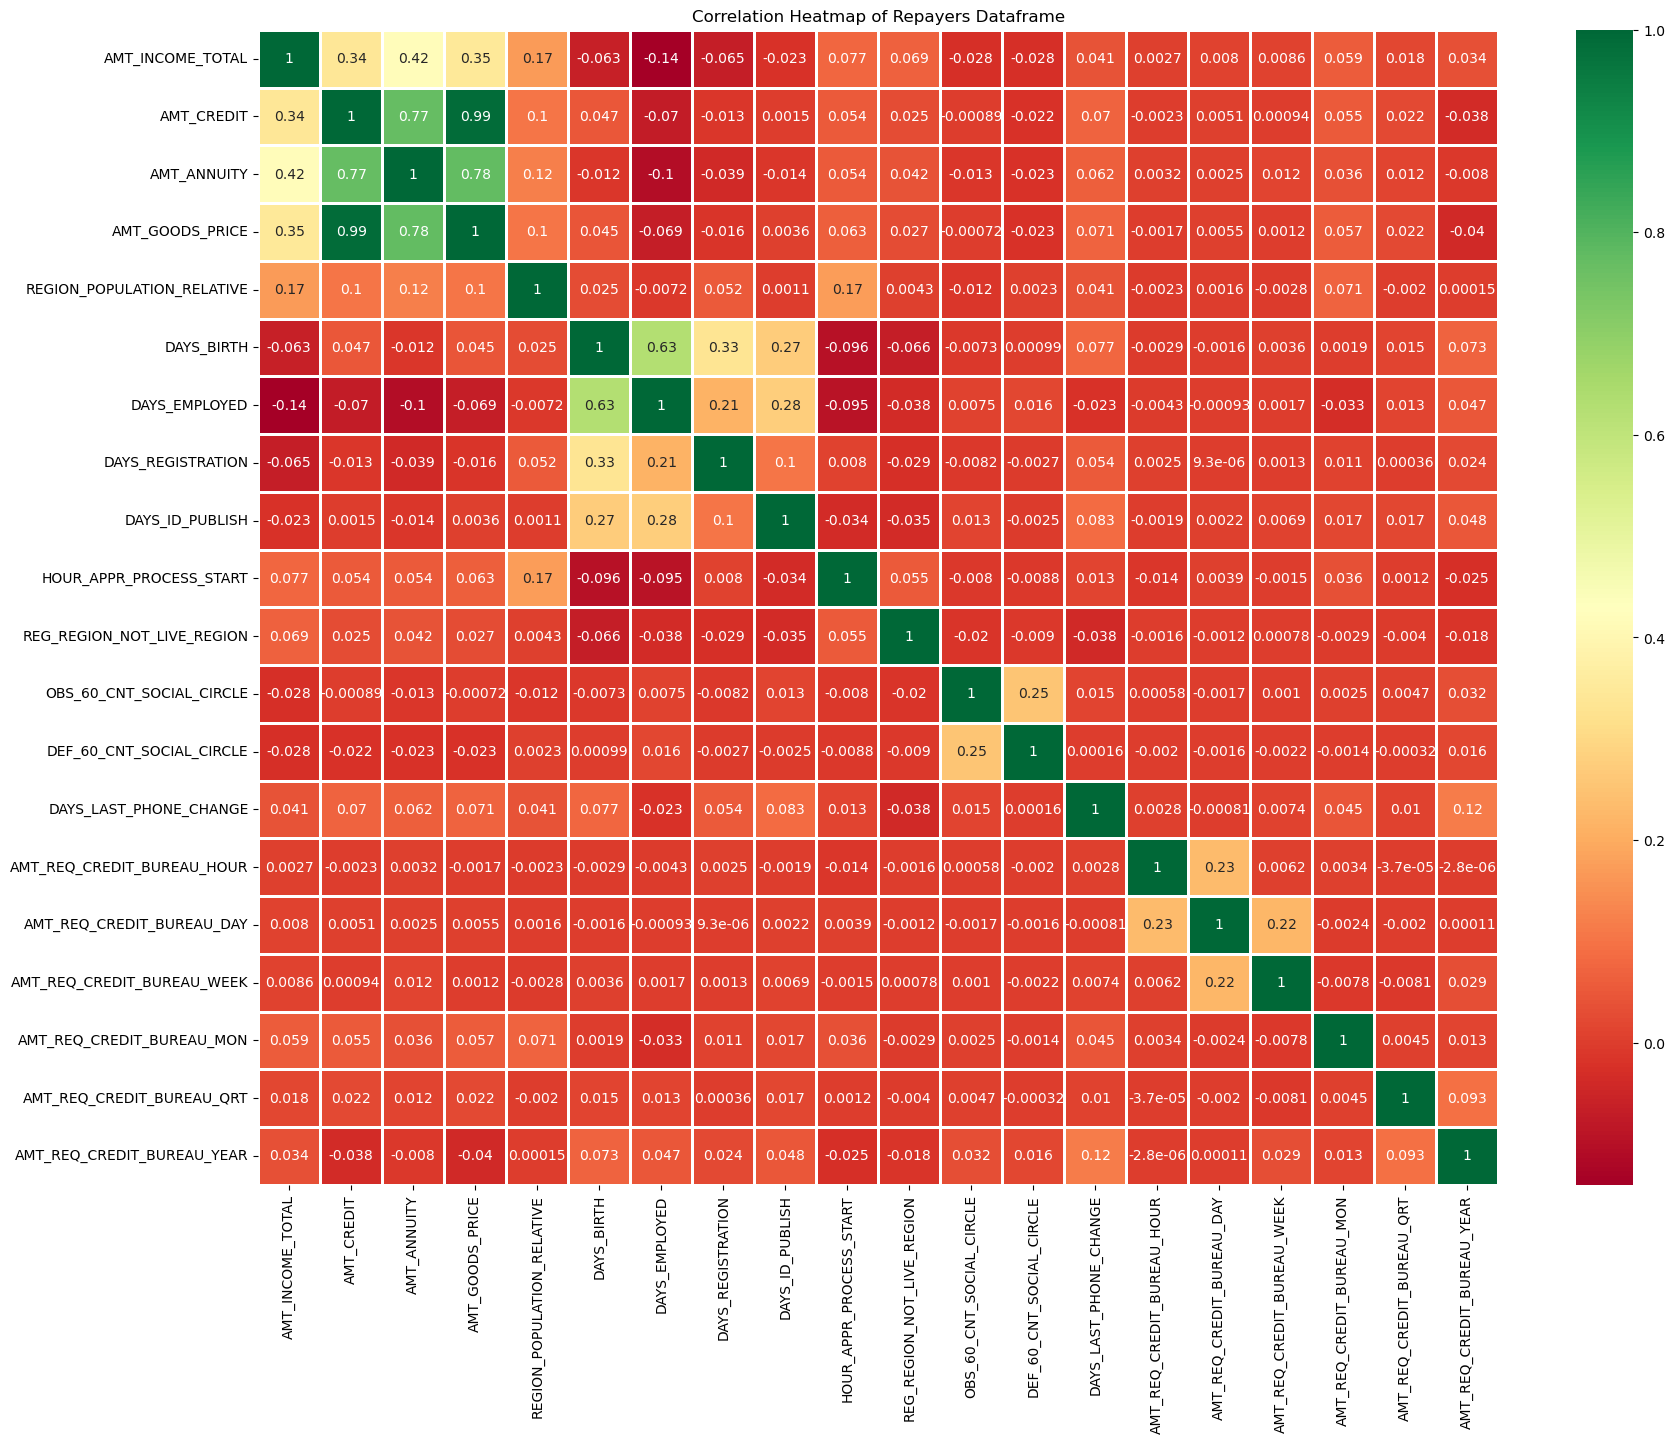

In [223]:
#plotting heatmap to see correlation amoung Repayers:
#To dive deeper into this area, I've created a heatmap visualization to uncover any correlations that may exist among different Repayers profiles.

# Create a figure with specified size
plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr_repayer, cmap="RdYlGn", annot=True, linewidths=1)
plt.title('Correlation Heatmap of Repayers Dataframe')
plt.show()

#### Insights:
- AMT_CREDIT and AMT_ANNUITY: Correlation of 0.77, indicating that higher credit amounts are associated with higher annuities.

- AMT_CREDIT and AMT_GOODS_PRICE: Correlation of 0.99, showing that the amount of credit is almost directly related to the price of the goods.

- AMT_ANNUITY and AMT_GOODS_PRICE: Correlation of 0.78, suggesting that higher annuities are associated with higher goods prices.

- AMT_INCOME_TOTAL and AMT_ANNUITY: Correlation of 0.42, indicating that higher incomes tend to be associated with higher annuities.

- AMT_INCOME_TOTAL and AMT_CREDIT: Correlation of 0.34, suggesting that higher incomes are somewhat related to higher credit amounts.

- DAYS_BIRTH and DAYS_EMPLOYED: Correlation of 0.33, indicating that older applicants tend to have been employed for longer periods.

- DAYS_EMPLOYED and DAYS_REGISTRATION: Correlation of 0.32, suggesting a relationship between length of employment and registration period.

- DAYS_EMPLOYED and AMT_CREDIT: Slightly negative correlation of -0.14, indicating that longer employment periods might be slightly associated with lower credit amounts.

- DAYS_BIRTH and AMT_INCOME_TOTAL: Correlation of -0.063, suggesting that older individuals tend to have lower incomes.

- Most other features show weak or no significant correlations with each other, with correlation coefficients close to zero.

In [225]:
#  Here I am getting getting  top 10 correlation for the Defaulters dataframe
# Step 1: Select numeric columns
numeric_cols = De_df.select_dtypes(include=[np.number]).columns
numeric_df = De_df[numeric_cols]

# Step 2: Calculate the correlation matrix
corr_Defaulter = numeric_df.corr()

# Step 3: Mask the upper triangle of the correlation matrix
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape), k=1).astype(bool))

# Step 4: Unstack the matrix and reset the index
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()

# Step 5: Rename the columns
corr_df_Defaulter.columns = ['VAR1', 'VAR2', 'Correlation']

# Step 6: Drop rows with NaN values in the Correlation column
corr_df_Defaulter.dropna(subset=["Correlation"], inplace=True)

# Step 7: Take the absolute value of the Correlation column
corr_df_Defaulter["Correlation"] = corr_df_Defaulter["Correlation"].abs()

# Step 8: Sort the dataframe by Correlation in descending order
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)

# Step 9: Display the top 10 correlations
top_10_correlations = corr_df_Defaulter.head(10)
print(top_10_correlations)

                          VAR1                        VAR2  Correlation
61             AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
62             AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
41                 AMT_ANNUITY                  AMT_CREDIT     0.752195
125              DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
145          DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
251   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.264159
165            DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863
314  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.247511
166            DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.229090
146          DAYS_REGISTRATION               DAYS_EMPLOYED     0.192455


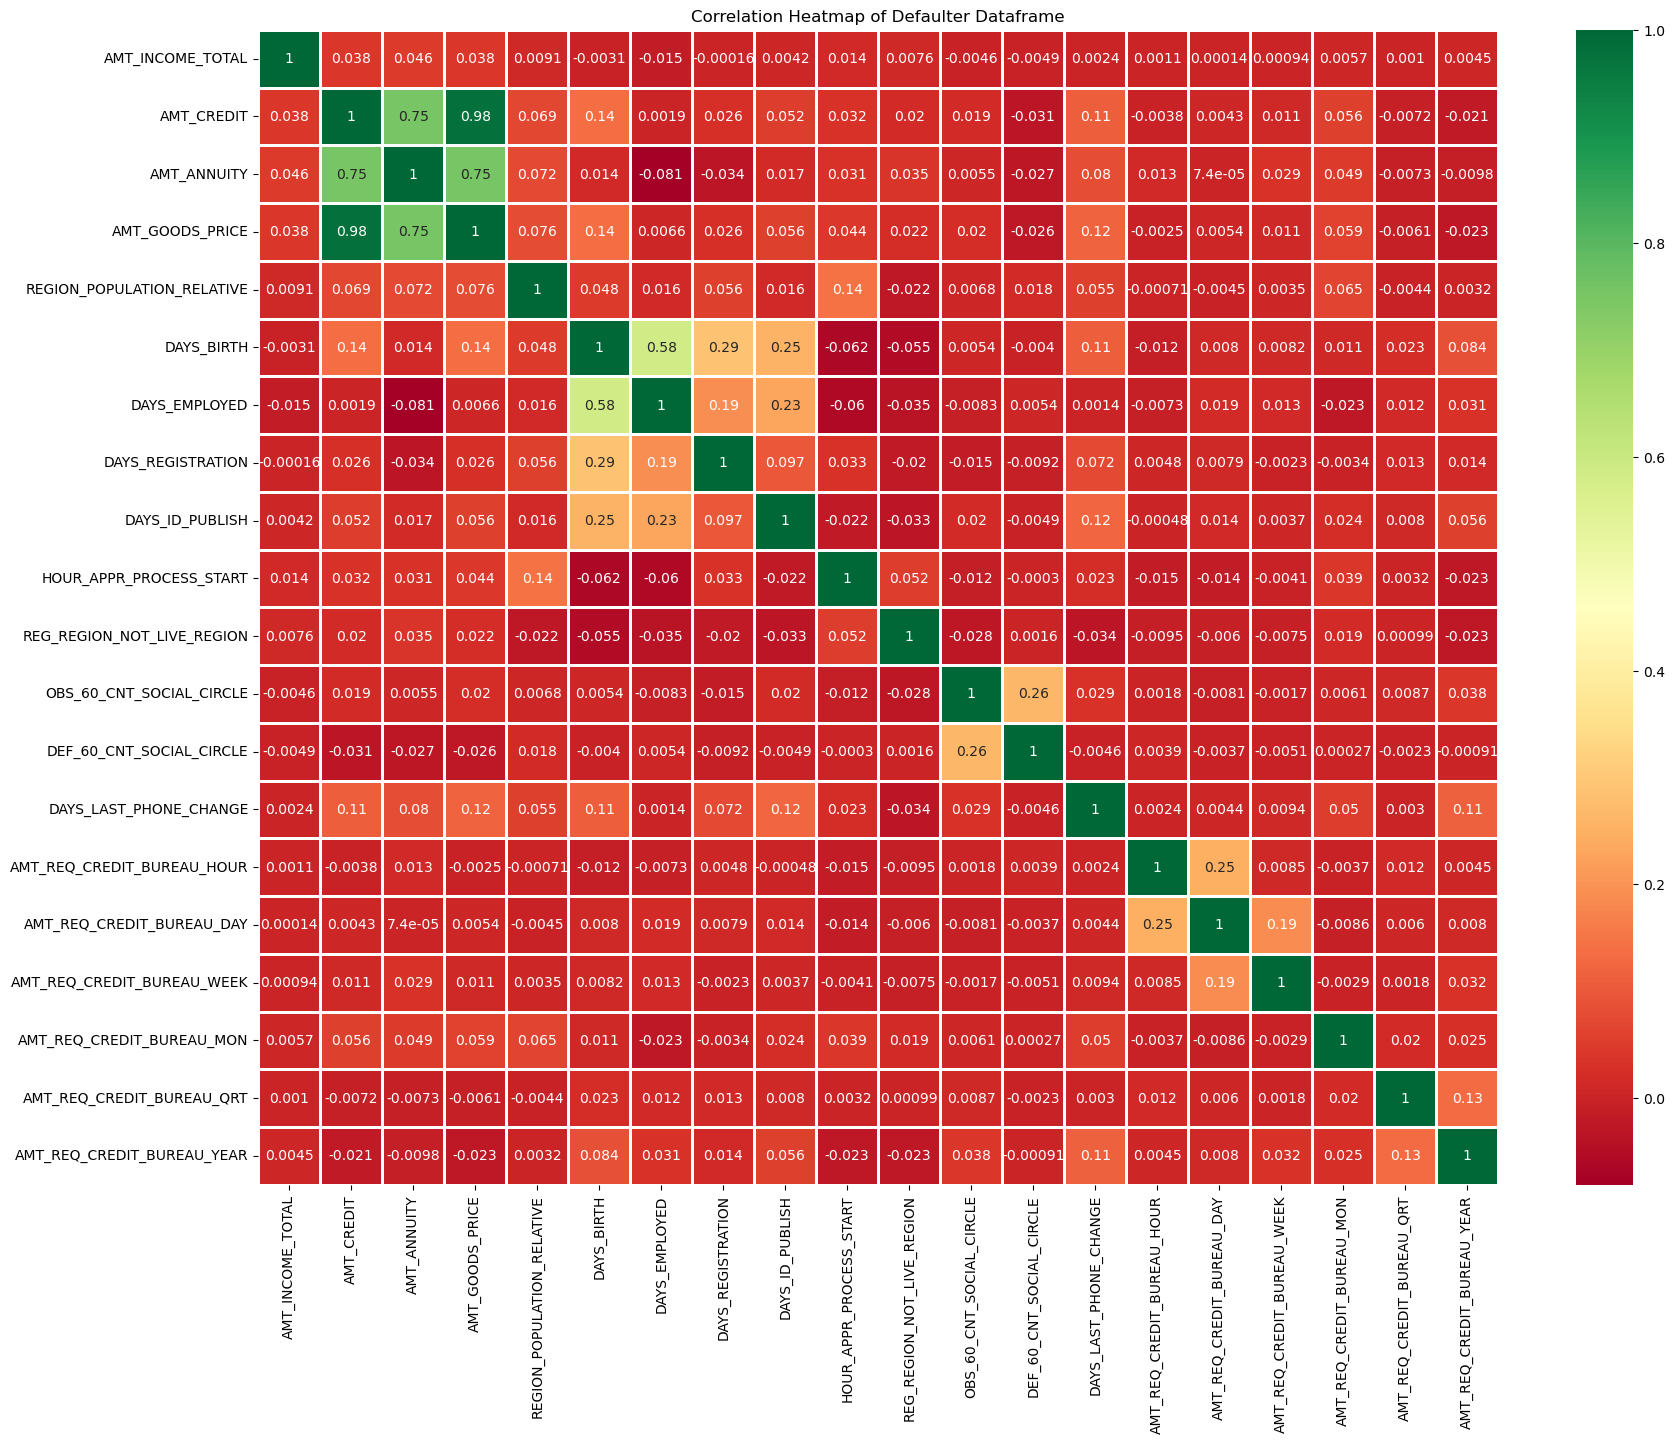

In [226]:
#plotting heatmap to see correlation amoung Defaulters:
#To dive deeper into this area, I've created a heatmap visualization to uncover any correlations that may exist among different Defaulters profiles.

# Create a figure with specified size
plt.figure(figsize=(20, 15))
ax = sns.heatmap(numeric_df.corr(), cmap="RdYlGn", annot=True, linewidths=1)
plt.title('Correlation Heatmap of Defaulter Dataframe')
plt.show()

#### Insights:
- AMT_CREDIT and AMT_ANNUITY are also highly correlated (0.77). That indicates that higher credits often come with higher annuities.


- AMT_CREDIT and AMT_GOODS_PRICE have a high correlation of 0.98. That suggests that the amount of credit is closely tied to the price of goods.


- AMT_GOODS_PRICE and AMT_ANNUITY have a strong correlation of 0.78, reflecting that the price of goods correlates well with the annuity amount.


- DAYS_REGISTRATION and DAYS_ID_PUBLISH show a high correlation of 0.97. It could imply that the registration and ID publication dates are closely related, possibly because they happen around the same time.


- AMT_INCOME_TOTAL shows a moderate correlation with AMT_ANNUITY (0.42) and AMT_GOODS_PRICE (0.35), indicating income levels somewhat influence these financial figures.


- DAYS_BIRTH and DAYS_EMPLOYED have a correlation of 0.58, suggesting the age of a person is somewhat related to their employment duration.


- OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE show a moderate correlation (0.25). That indicates that the observed social circle count correlates with the count of defaults in the social circle.


- AMT_REQ_CREDIT_BUREAU_YEAR and AMT_REQ_CREDIT_BUREAU_QRT are moderately correlated (0.13). That is expected as quarterly credit requests contribute to annual figures.


- DAYS_LAST_PHONE_CHANGE shows some correlation with DEF_60_CNT_SOCIAL_CIRCLE (0.11), which could suggest a behavioral pattern related to social interactions and phone changes.

#### Now I am going to merge the app_inp0df and prev_app_inp1df dataframes for more analysis:

In [229]:
# I am merging both the dataframe on SK_ID_CURR with Inner Joins:
loan_inp3 = pd.merge(app_inp0df, prev_app_inp1df, how='inner', on='SK_ID_CURR')
loan_inp3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0               Y            0          202500.0      406597.5        24700.5   
1               N            0          270000.0     1293502.5        35698.5   
2               N            0          270000.0     1293502.5        35698.5   
3               N            0          270000.0     1293502.5        35698.5   
4               Y            0           67500.0      135000.0         6750.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0           351000.0     Unaccompanied          Working   
1          1129500.0            Family    State servant   
2          1129500.0            Family    State servant   
3          1129500.0            Family    State servant   
4           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2              291      Core staff                     MONDAY   
3              291      Core staff                     MONDAY   
4             2531        Laborers                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2

In [230]:
# I am checking the details of the merged dataframe:

loan_inp3.shape

(1413701, 76)

In [231]:
# After that I am checking the columns and column types of the dataframe:
loan_inp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 76 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  category
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x            1410175 non-null  category
 12  NAME_INCOME_TYPE            

In [232]:
# The function I will be creating for plotting repetitive count plots in univariate categorical analysis on the merged dataframe inp3:
def univariate_categorical_merged(col, df, hue, palette, ylog, figsize, xlabel="X-axis", ylabel="Count", legend_labels=None, title=None):
    # Set the figure size for the plot
    plt.figure(figsize=figsize)
    
    # Create a count plot using seaborn
    ax = sns.countplot(
        x=col, 
        data=df, 
        hue=hue, 
        palette=palette, 
        order=df[col].value_counts().index  # Order the bars by their frequency
    )
    
    # Check if y-axis should be in log scale
    if ylog:
        plt.yscale('log')
        plt.ylabel(f"{ylabel} (log)", fontsize=15)  # Set y-axis label with log scale
    else:
        plt.ylabel(ylabel, fontsize=15)  # Set y-axis label with normal scale

    # Set the title of the plot
    if title:
        plt.title(title, fontsize=20)
    else:
        plt.title(col, fontsize=20)
    
    # Set x-axis label
    plt.xlabel(xlabel, fontsize=15)
    
    # Customize the legend
    if legend_labels:
        ax.legend(title=hue, labels=legend_labels, loc="upper right")
    else:
        ax.legend(loc="upper right")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Display the plot
    plt.show()
    
# The function we will be creating to plot point plots:


def pointplot(df, hue, x, y, legend_title="Legend", plot_title="Plot Title", add_labels=True):
    # Set the figure size for the plot
    plt.figure(figsize=(12, 6))
    
    # Create a point plot using seaborn
    ax = sns.pointplot(x=x, y=y, hue=hue, data=df)
    
    # Set the title of the plot with a dynamic label including x and y columns
    plt.title(plot_title, fontsize=15)
    
    # Set x-axis and y-axis labels
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    
    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['Repayer', 'Defaulter'] if hue == "TARGET" else labels
    ax.legend(handles=handles, labels=new_labels, title=legend_title, loc='best')
    
    # Adding data labels on the points if add_labels is True
    if add_labels:
        for line in ax.lines:
            x_pos, y_pos = line.get_xydata().T
            for (x_coord, y_coord) in zip(x_pos, y_pos):
                ax.text(x_coord, y_coord, f'{y_coord:.2f}', color='black', ha="center")

    # Display the plot
    plt.show()

In [233]:
# Here I am bisecting the "loan_inp3" dataframe for correlation and other analysis

L0 = loan_inp3[loan_inp3['TARGET']==0] # Repayers
L1 = loan_inp3[loan_inp3['TARGET']==1] # Defaulters


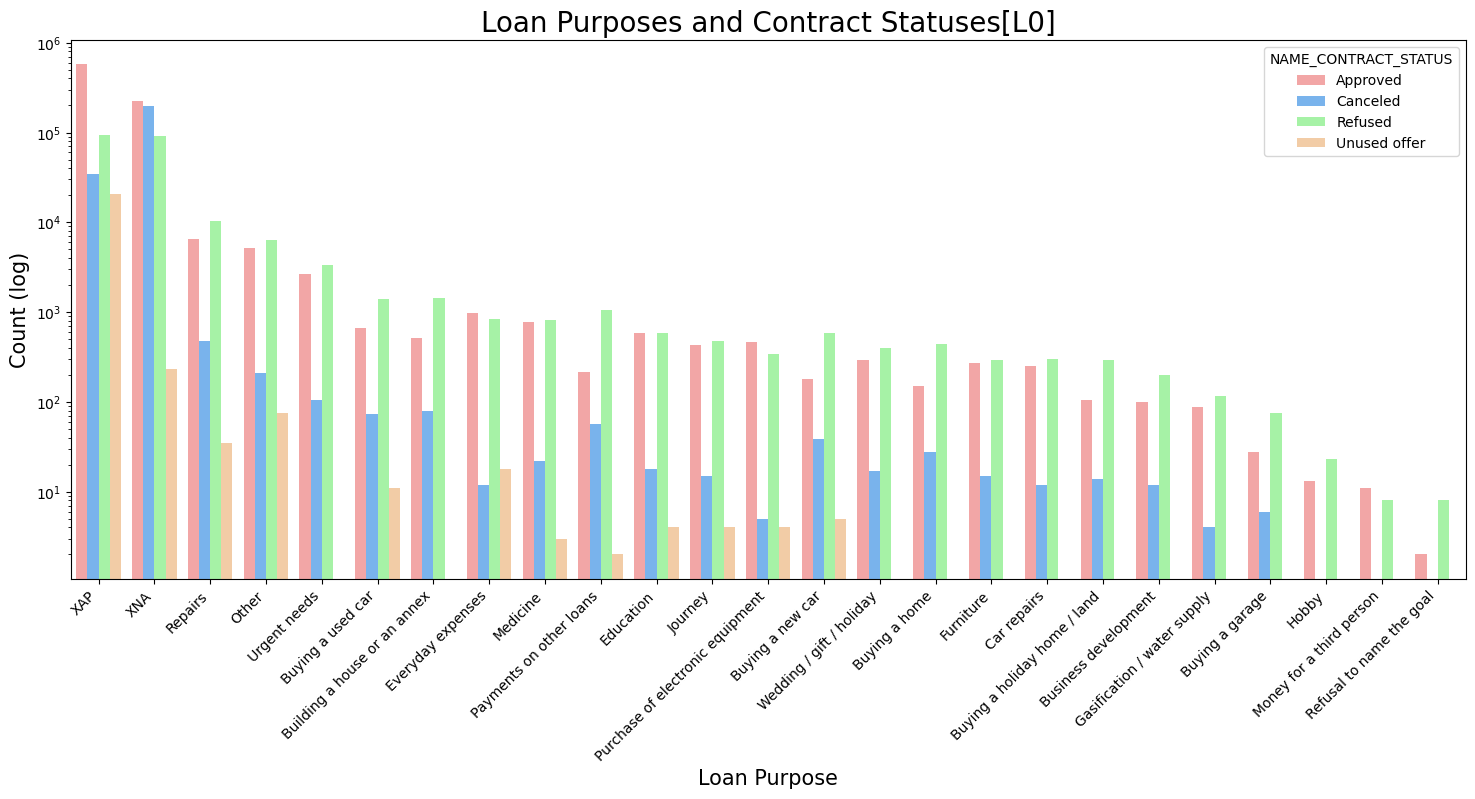

In [234]:
#plotting Contract Status vs purpose of the loan:
#This analysis provides an interesting perspective on how the purpose of a loan may relate to whether the borrower is able to repay it successfully.
# Custom colors
custom_colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]

# Calling the univariate_categorical_merged function with the new color palette
univariate_categorical_merged(
    "NAME_CASH_LOAN_PURPOSE", 
    L0, 
    "NAME_CONTRACT_STATUS", 
    custom_colors, 
    True, 
    (18, 7), 
    xlabel="Loan Purpose", 
    ylabel="Count", 
    legend_labels=['Approved', 'Canceled', 'Refused', 'Unused offer'], 
    title="Loan Purposes and Contract Statuses[L0]"
)


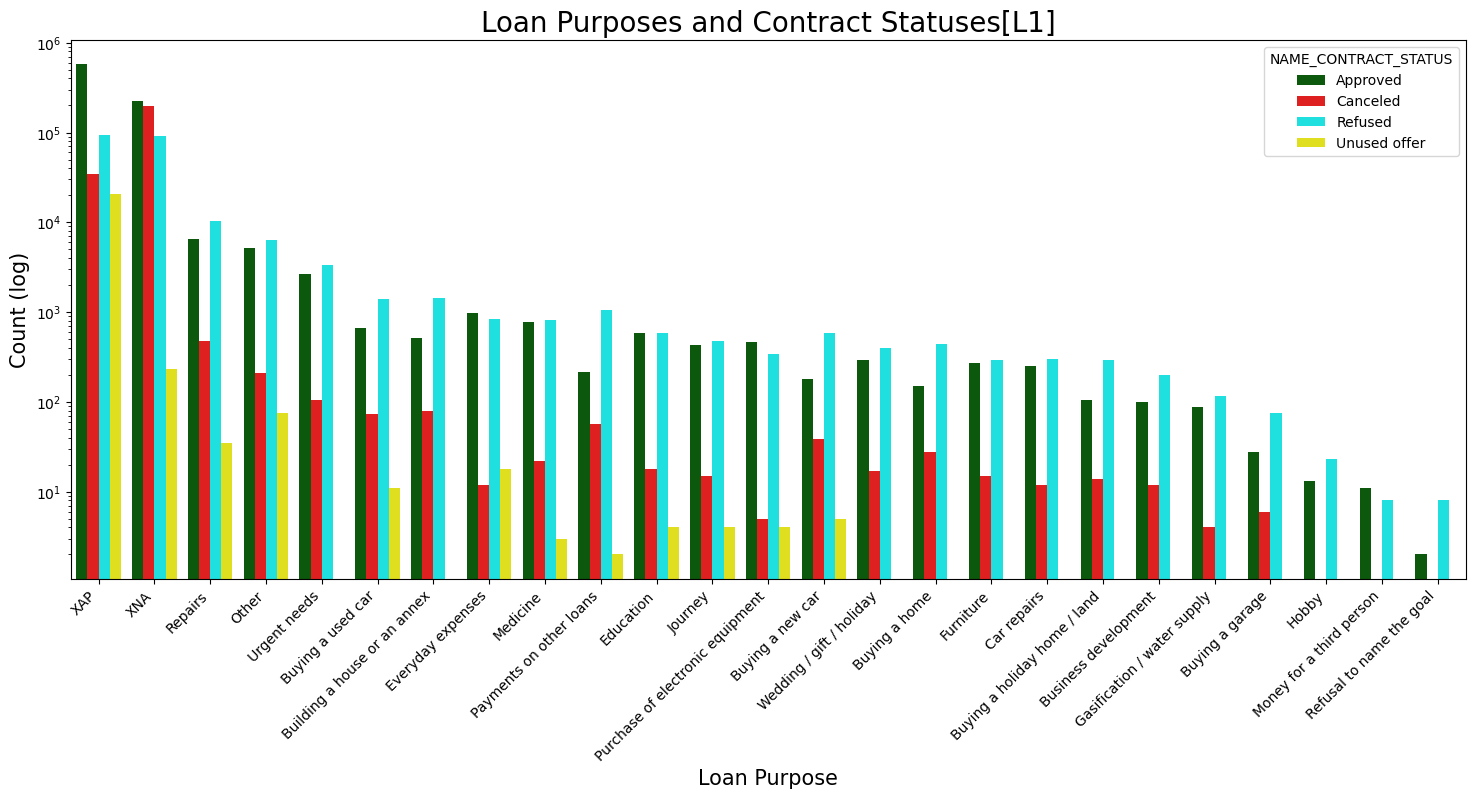

In [235]:
custom_colors1 = ['#006400', '#FF0000', '#00FFFF', '#FFFF00'] 
univariate_categorical_merged(
    "NAME_CASH_LOAN_PURPOSE", 
    L0, 
    "NAME_CONTRACT_STATUS", 
    custom_colors1,
    True, 
    (18, 7), 
    xlabel="Loan Purpose", 
    ylabel="Count", 
    legend_labels=['Approved', 'Canceled', 'Refused', 'Unused offer'], 
    title="Loan Purposes and Contract Statuses[L1]"
)

#### Insights:

- The most common purposes for loans, regardless of their contract status, are categories like 'XAP' and 'XNA'. 'Repairs' and 'Other' are also popular loan purposes.

- The majority of loan purposes have a higher count of 'Approved' statuses compared to other statuses.

- The 'Refused'  statuses are significant across almost all purposes, often being the second most common status.

- We can see 'Canceled'  and 'Unused offer'  have fewer counts in comparison, but 'Canceled' statuses are noticeable in categories like 'Everyday expenses', 'Buying a new car', and 'Education'.

- Some categories like 'Gasification / water supply', 'Buying a garage', 'Hobby', and 'Money for a third person' have lower counts overall, but the distribution of contract statuses still shows a pattern of more approvals than other statuses in this graph.

- We can see 'Refusal to name the goal' has a higher number of refused loans compared to other statuses, which is interesting as it might indicate a higher risk perception from lenders.

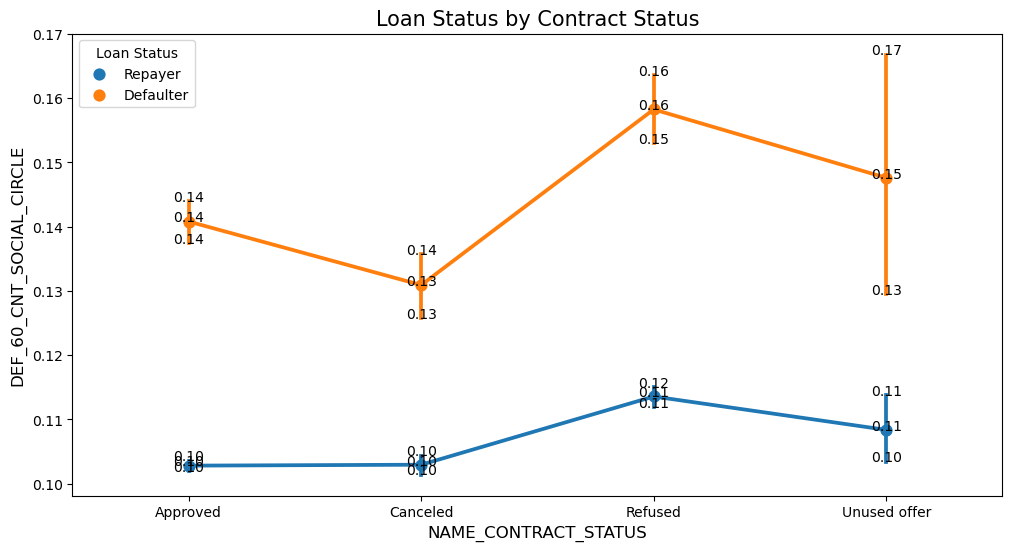

In [237]:
# Here I am plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status:
#By examining whether people who defaulted on their loans in the last 60 days are part of the client's social network, we may be able to uncover patterns that could inform credit decisions.
#This analysis could shed light on the potential influence of social relationships on financial behavior and loan repayment.
pointplot(loan_inp3, hue="TARGET", x="NAME_CONTRACT_STATUS", y="DEF_60_CNT_SOCIAL_CIRCLE", legend_title="Loan Status", plot_title="Loan Status by Contract Status")


#### Insights:
- Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score has higher default rate and so analysing client's social circle could help in disbursment of the loan.

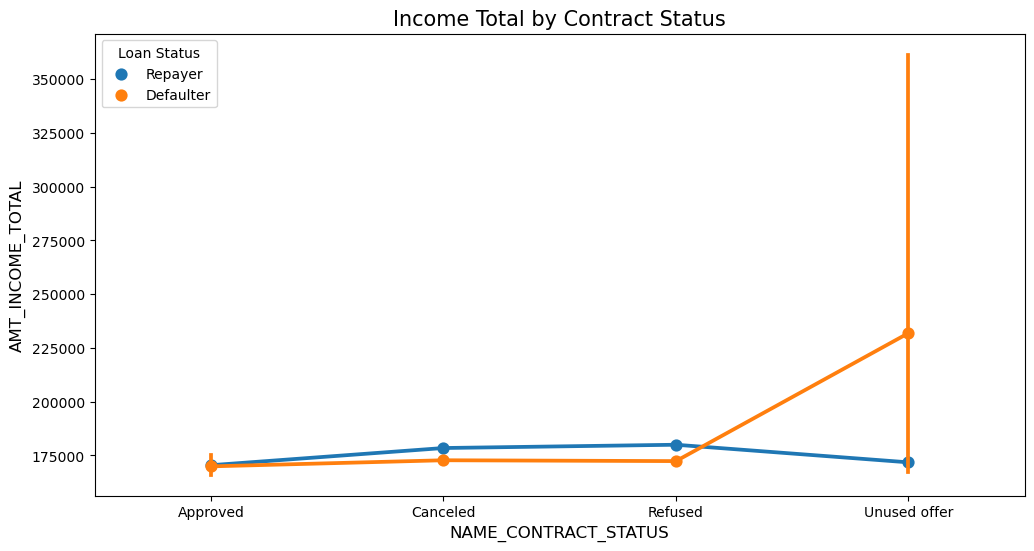

In [239]:
# here I am plotting the relationship between income total and contact status
#By plotting this information, I can start to uncover patterns that may inform the lending institution's decision-making process and risk management strategies.

pointplot(loan_inp3, hue="TARGET", x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL",
          legend_title="Loan Status", plot_title="Income Total by Contract Status", add_labels=False)

#### Insights:
- This point plot shows that the people who have not used offer earlier have defaulted even when there average income is higher than other people.

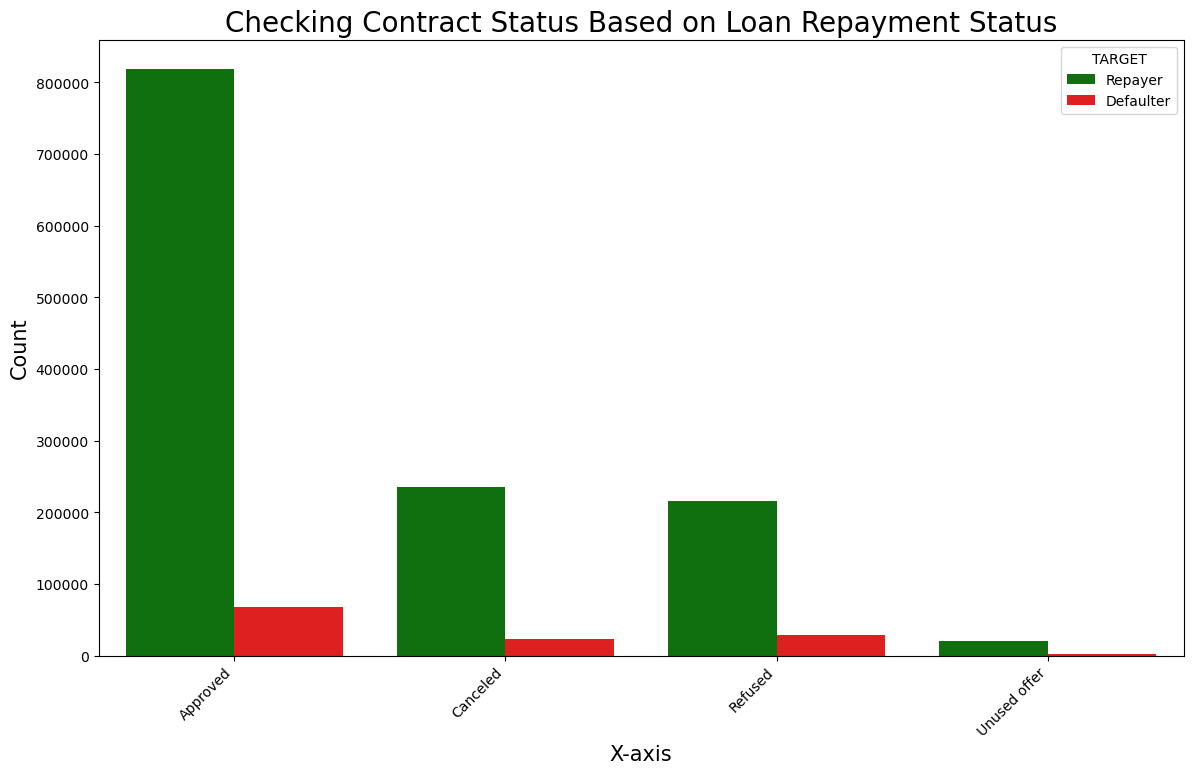

                                 Counts Percentage
NAME_CONTRACT_STATUS TARGET                       
Approved             Repayer     818856     92.41%
                     Defaulters   67243      7.59%
Canceled             Repayer     235641     90.83%
                     Defaulters   23800      9.17%
Refused              Repayer     215952      88.0%
                     Defaulters   29438      12.0%
Unused offer         Repayer      20892     91.75%
                     Defaulters    1879      8.25%


In [242]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss
# Define the plotting function with added labels
legend_labels = ['Repayer', 'Defaulter']  # Custom legend labels

univariate_categorical_merged("NAME_CONTRACT_STATUS", loan_inp3, "TARGET", ['g', 'r'], False, (14, 8), legend_labels=legend_labels, title="Checking Contract Status Based on Loan Repayment Status")
# Group by "NAME_CONTRACT_STATUS" and "TARGET" columns
r = loan_inp3.groupby("NAME_CONTRACT_STATUS")["TARGET"]

# Calculate counts and percentages
df1 = pd.concat([r.value_counts(), round(r.value_counts(normalize=True).mul(100), 2)], axis=1, keys=('Counts', 'Percentage'))

# Rename index levels
df1.index = df1.index.set_names(['NAME_CONTRACT_STATUS', 'TARGET'])

# Replace numerical values with labels
df1.index = df1.index.set_levels(['Repayer', 'Defaulters'], level=1)

# Format percentage column with percentage symbol
df1['Percentage'] = df1['Percentage'].astype(str) + "%"

print(df1)

#### Insights:

- Approved Contracts: A vast majority of the approved contracts are held by Repayers (92.41%), with only 7.59% by Defaulters. This indicates that approved contracts are predominantly associated with successful repayments.

- Canceled Contracts: Repayers hold 90.83% of canceled contracts, while Defaulters hold 9.17%. This suggests that cancellations are more common among Repayers.

- Refused Contracts: The proportion of refused contracts is higher among Defaulters (12.0%) compared to Repayers (88.0%). This may imply a higher rejection rate for those who default.

- Unused Offers: The percentage of unused offers is similar to other categories, with Repayers at 91.75% and Defaulters at 8.25%, indicating a consistent pattern of Repayers holding most contracts.

- Overall Trend: Repayers dominate across all contract statuses, but Defaulters have a slightly higher representation in refused contracts.

- Defaulter Distribution: Defaulters are more represented in refused and canceled contracts than in approved or unused offers.

- Repayer Dominance: Across all contract types, Repayers significantly outnumber Defaulters, highlighting better creditworthiness.

- Insight on Approval Process: The data suggests that the approval process is stringent enough to limit the number of Defaulters, as seen by their smaller proportion in approved contracts.

#### ****Conclusions:****

After analysing the datasets app_inp0df and prev_app_inp1df and loan_inp3, there are few attributes of a client with which the bank would be able to identify if they have chances to became defaulters or not. The analysis is thoroughly checked, and some important points are in below with the contributing factors and categorization:

#### Factors Contributing to Repayment:

- NAME_EDUCATION_TYPE: Applicants with Academic degrees exhibit lower default rates, indicating higher repayment reliability.
  
- NAME_INCOME_TYPE: Students and Businessmen show no defaults, establishing them as dependable borrowers.
  
- ORGANIZATION_TYPE: Trade Type 4, Trade Type 5, and Industry Type 8 show default rates below 3%, highlighting their reliability.
  
- DAYS_BIRTH: Applicants above 50 years old demonstrate a lower probability of defaulting.
  
- DAYS_EMPLOYED: Clients with over 40 years of experience have less than a 1% default rate.
  
- AMT_INCOME_TOTAL: Applicants earning over 700,000 show a lower likelihood of defaulting.
  
- NAME_CASH_LOAN_PURPOSE: Loans taken for hobbies or purchasing a garage are associated with higher repayment rates.
  
- CNT_CHILDREN: Applicants with zero to two children tend to repay loans more reliably.




#### Factors Contributing to Default:

- CODE_GENDER: Men tend to default more frequently compared to women.
  
- NAME_FAMILY_STATUS: Civil marriage or single status correlates with higher default rates.

- NAME_EDUCATION_TYPE: Lower Secondary and Secondary education levels are associated with higher default probabilities.
  
- NAME_INCOME_TYPE: Maternity leave and Unemployed statuses show higher default rates.
  
- OCCUPATION_TYPE: Occupations such as Low-skill Laborers, Drivers, and Security staff have elevated default rates.
  
- ORGANIZATION_TYPE: Transport: type 3, Industry: type 13, and Industry: type 8 exhibit high default rates.
  
- DAYS_BIRTH: Applicants aged 20-40 have a higher likelihood of defaulting.
  
- CNT_CHILDREN & CNT_FAM_MEMBERS: Applicants with 9 or more children default 100% of the time.
  
- AMT_GOODS_PRICE: Loans exceeding 3 million credits tend to have higher default rates.e#### Other Suggestion:f- NAME_HOUSING_TYPE: Applicants living in rented apartments or with parents constitute a high number of loan applications. Offering loans to these applicants with higher interest rates can mitigate potential losses from defaults.

#### Additional Suggestions for Mitigating Default Risk:

- Applicants living in rented apartments or with parents constitute a significant number of loan applications. Offering loans with higher interest rates to mitigate potential losses from defaults.
  
- Loans in the range of 300,000 to 600,000 credits tend to have higher default rates. Implementing higher interest rates for this credit range can offset default risks.
  
- Applicants with a total income of less than 300,000 exhibit higher default probabilities. Applying higher interest rates to loans in this income category can safeguard against defaults.
  
- Clients with 4 to 8 children show a very high default rate. Implementing higher interest rates for loans to these applicants can mitigate the increased risk associated with larger families.
  
- Loans taken for repairs show the highest default rates. Maintaining rejection or offering loans with higher interest rates for such purposes can effectively manage risk exposure.

#### Opportunities for Loan Portfolio Optimization::

- Revisiting interest rates or loan terms for clients with previous loan refusals or cancellations can capitalize on their improved repayment behavior.
  
- Clients with a history of loan refusals now demonstrate a high repayment rate (88%), indicating potential for revised risk assessments.
  
- Leveraging insights from past data can convert historically high-risk clients into reliable borrowers, enhancing business opportunities and minimizing risk

- Reassessing risk models based on these insights can further optimize loan approval processes and improve overall portfolio performance.